<a href="https://colab.research.google.com/github/itsnalu/Projeto_CCF425/blob/main/Projeto_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise e Documentação do Código do Projeto SPSafe

---
Integrantes do grupo:
- | 5389 | Ana Luísa Moreira Rodrigues
- | 5377 | Lucas da Costa Moreira          
- | 5373 | Aléxia Karoline Augusta
- | 5798 | Daniel Martins de Abreu          

Projeto desenvolvido para a análise dos dados de criminalidade de São Paulo (SPSafe).

---

# Importação de Bibliotecas e Montagem do Ambiente

No início do código, são importadas as bibliotecas essenciais para a manipulação dos dados:  

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2_contingency
import math
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

Além disso, o código utiliza o módulo `drive` do Google Colab para montar o Google Drive e acessar o arquivo CSV com os dados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv("/content/drive/MyDrive/SPSafe_2022.csv", delimiter=";")

Mounted at /content/drive


/tmp/ipython-input-4-460526859.py:3: DtypeWarning: Columns (10,11,16,17,19,20,21,22,24,25,26,27,28,29,30,31,32,35,36,38,39,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/SPSafe_2022.csv", delimiter=";")


Foi feita uma análise de quais colunas e seus tipos de dados estão presentes no arquivo importado (aumentar essa descrição)

In [ ]:
# Tipos de dados de cada coluna do dataframe
df.dtypes

,0
NUM_BO,float64
ANO_BO,int64
CODIGO_BOLETIM,object
NATUREZA_APURADA,object
DATA_OCORRENCIA,object
HORA_OCORRENCIA,object
PERIODO_OCORRENCIA,object
CIDADE,float64
LOGRADOURO,object
NUMERO_LOGRADOURO,float64


In [ ]:
pd.set_option('display.max_colwidth', None) #definir a opção para mostrar todo o conteúdo das células
pd.set_option('display.max_rows', None) #definir a opção para mostrar todas as linhas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas do DataFrame
df.head(4)

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO
0,21.0,2022,21/2022,HOMICIDIO DOLOSO,2021-12-31 00:00:00,15:40:00,A TARDE,NaN,DA VEDACAO DA DIVULGACAO DOS DADOS RELATIVOS,NaN,NaN,NaN,RESIDENCIA,NaN,NaN,DEL.POL.PLANTAO BIRIGUI,DEINTER 10 - ARACATUBA,DEL.SEC.ARACATUBA,DM - BIRIGUI,DEINTER 10,SEC ARACATUBA,VITIMA,FEMININO,55.0,1966-08-15,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,312.0,2022,312/2022,HOMICIDIO DOLOSO,2022-01-20 00:00:00,07:00:00,PELA MANHA,NaN,PRACA DA BANDEIRA,10.0,NaN,NaN,VIA PUBLICA,-23.550235,-46.639255,08º D.P. BRAS,DECAP,DEL.SEC.1º CENTRO,001 DP - SE,DECAP,1ª SEC,VITIMA,MASCULINO,34.0,1987-02-15,PARDA,DESEMPREGADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,253.0,2022,253/2022,HOMICIDIO DOLOSO,2022-01-16 00:00:00,05:48:00,DE MADRUGADA,NaN,RUA PRATES,536.0,NaN,NaN,VIA PUBLICA,-23.525989,-46.634852,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,002 DP - BOM RETIRO,DECAP,1ª SEC,VITIMA,MASCULINO,21.0,2000-06-10,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,305.0,2022,305/2022,HOMICIDIO DOLOSO,2022-01-22 00:00:00,19:50:00,NaN,NaN,RUA GUARANI,427.0,NaN,NaN,VIA PUBLICA,-23.528916,-46.633914,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,002 DP - BOM RETIRO,DECAP,1ª SEC,VITIMA,MASCULINO,48.0,1974-01-06,PARDA,AUTONOMO(A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Significado e valores de cada coluna

Antes de tratar os dados, é necessário compreender o significado de cada uma das colunas do dataset original; especialmente aquelas que representam algum tipo de categoria ou classificação. Seguem breves explicações para cada uma das colunas, em ordem:

### Dados gerais do boletim de ocorrência

* **NUM BO**: Número do boletim de ocorrência  
* **ANO BO**: Ano do boletim de ocorrência  
* **CODIGO BOLETIM**: Junção do número de boletim com o ano do boletim separados por ‘/’  
* **NATUREZA APURADA**: Tipo de crime cometido  
* **DATA OCORRENCIA**: Data em que o crime ocorreu  
* **HORA OCORRENCIA**: Hora em que o crime ocorreu  
* **PERIODO OCORRENCIA**: Período do dia em que o crime ocorreu  
* **CIDADE**: Código da cidade em que o crime ocorreu, no formato IBGE  
* **LOGRADOURO**: Via em que o crime ocorreu  
* **NUMERO LOGRADOURO**: Número que identifica em uma via o local do crime  
* **BAIRRO**: Bairro em que o crime ocorreu  
* **UF**: Sigla da unidade federativa em que o crime ocorreu  
* **TIPO LOCAL**: Tipo de local em que o crime ocorreu  
* **LATITUDE**: Latitude do ponto em que o crime ocorreu  
* **LONGITUDE**: Longitude do ponto em que o crime ocorreu  
* **DELEGACIA ELABORACAO**: Delegacia em que o boletim de ocorrência foi elaborado  
* **DEPARTAMENTO ELABORACAO**: Departamento em que o boletim de ocorrência foi elaborado  
* **SECCIONAL ELABORACAO**: Seccional em que o boletim de ocorrência foi elaborado  
* **DELEGACIA CIRCUNSCRICAO**: Delegacia de circunscrição  
* **DEPARTAMENTO CIRCUNSCRICAO**: Departamento de circunscrição  
* **SECCIONAL CIRCUNSCRICAO**: Seccional de circunscrição  

### Dados sobre a pessoa envolvida na ocorrência  

* **TIPO PESSOA**: Indica se a pessoa é a vítima ou autora do crime  
* **SEXO PESSOA**: Gênero  
* **IDADE PESSOA**: Idade  
* **DATA NASCIMENTO PESSOA**: Data de nascimento  
* **COR PELE**: Cor de pele  
* **PROFISSAO**: Profissão  

### Dados sobre o veículo envolvido na ocorrência

* **PLACA VEICULO**: Placa do veículo  
* **UF VEICULO**: Unidade federativa do emplacamento  
* **CIDADE VEICULO**: Cidade do emplacamento  
* **COR VEICULO**: Cor do veículo  
* **MARCA VEICULO**: Marca do veículo  
* **MODELO VEICULO**: Modelo do veículo  
* **ANO FABRICACAO**: Ano de fabricação do veículo  
* **ANO MODELO**: Ano do modelo do veículo  
* **TIPO VEICULO**: Tipo de veículo envolvido  

### Dados sobre o telefone celular envolvido na ocorrência

* **MARCA CELULAR**: Marca do celular  
* **QUANT CELULAR**: Quantidade de celulares  

### Outras informações sobre o boletim de ocorrência  

* **BO INICIADO**: Data e hora em que o BO foi iniciado  
* **BO EMITIDO**: Data e hora em que o BO foi concluído  
* **DATA HORA ELABORACAO**: Data e hora de elaboração do BO  
* **DATA COMUNICACAO**: Data em que o BO foi comunicado à delegacia  
* **BO AUTORIA**: Responsável pela realização do BO  
* **FLAGRANTE**: Indica se se trata de uma situação de flagrante  
* **EXAME**: Responsável pelo exame de corpo  
* **SOLUCAO**: Tipo de solução dada ao crime  
* **ESPECIE**: Espécie de patrimônio envolvido no crime  
* **STATUS**: Status do crime  
* **FLAG VITIMA FATAL**: Indica se houve fatalidades  
* **DESDOBRAMENTO**: Desdobramento do caso

#  Ajustes e Conversões de Dados


Esta seção trata das transformações necessárias para garantir que os dados estejam no formato adequado para análise.

## Tratamento de Valores Nulos e Conversão de Tipos



### Tratamento do NUM_BO

Foi feita o preenchimento de registros onde o campo **NUM_BO** é nulo com base no **CODIGO_BOLETIM**, pois eram valores que estavam preenchidos e o grupo notou que o seu padrão era: "número do BO/ ano do BO", apenas foi necessário remover algumas letras em frente ao número.

In [ ]:
# Mostra os dados com o número de BO nulo
df[df['NUM_BO'].isna()]

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO
250,NaN,2022,AM2107/2022,HOMICIDIO DOLOSO,2022-02-28 00:00:00,02:20:00,DE MADRUGADA,NaN,RUA CARDEAL ARCOVERDE,950.0,NaN,NaN,TEMPLO E AFINS,NaN,NaN,CORREGEDORIA - PLANTAO,CORREGEDORIA POLICIA CIVIL,DIVISAO CORREGEDORIA DA POLICIA CIVIL,014 DP - PINHEIROS,DECAP,3ª SEC,VITIMA,MASCULINO,20.0,1987-01-23,BRANCA,DESOCUPADO(A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,NaN,2022,BF3900/2022,HOMICIDIO DOLOSO,2022-04-25 00:00:00,02:30:00,DE MADRUGADA,NaN,RODOVIA SP 425,373.0,NaN,NaN,RODOVIA/ESTRADA,NaN,NaN,DEL.POL.PARAPUA,DEINTER 4 - BAURU,DEL.SEC.TUPA,DM - PARAPUA,DEINTER 4,SEC TUPA,VITIMA,MASCULINO,51.0,1971-05-11,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2752,NaN,2022,LH5061/2022,HOMICIDIO DOLOSO,2022-12-28 00:00:00,NaN,EM HORA INCERTA,NaN,DA VEDACAO DA DIVULGACAO DOS DADOS RELATIVOS,NaN,NaN,NaN,RESIDENCIA,NaN,NaN,CORREGEDORIA - PLANTAO,CORREGEDORIA POLICIA CIVIL,DIVISAO CORREGEDORIA DA POLICIA CIVIL,034 DP - VILA SONIA,DECAP,3ª SEC,VITIMA,FEMININO,44.0,1978-05-10,BRANCA,NUTRICIONISTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extrai apenas o número antes da barra
df['NUM_BO'] = df['NUM_BO'].fillna(
    df['CODIGO_BOLETIM'].str.extract(r'\D*(\d+)/\d{4}')[0].astype(float)
)

In [ ]:
# Converte a coluna NUM_BO para inteiro
df['NUM_BO'] = df['NUM_BO'].astype('int')


### Conversão de datas

O código utiliza `pd.to_datetime` para converter as colunas de data, devido as funções do próprio python que vão lidar melhor com esse tipo.

In [ ]:
# Converte para datetime e transforma os valores nulos em NaT (Not a Time)
df['DATA_OCORRENCIA'] = pd.to_datetime(df['DATA_OCORRENCIA'], errors='coerce')
df['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(df['DATA_NASCIMENTO_PESSOA'], errors='coerce')
df['DATA_HORA_ELABORACAO'] = pd.to_datetime(df['DATA_HORA_ELABORACAO'], errors='coerce')
df['DATA_COMUNICACAO'] = pd.to_datetime(df['DATA_COMUNICACAO'], errors='coerce')

### Tratamento de Códigos de Cidade e Integração com Dados do IBGE

### Conversão de cidade e remoção de dados

O grupo percebeu que durante a leitura dos dados, a coluna `CIDADE` não continha o nome das cidades como mencionado no artigo e sim os códigos do [IBGE](https://www.ibge.gov.br/explica/codigos-dos-municipios.php) referentes as essas cidades. Dessa maneira, decidimos analisar se todos eles eram no estado de São Paulo.

A primeira divergência com poucas linhas atrbuídas foi uma cidade do Paraná, e por ter poucos dados atrelados a ela foi teve todas as suas linhas removidas.

In [ ]:
# Remove cidade com o código do IBGE "4123824.0" que não se refere a São Paulo e possui poucos dados
df.drop(df[df['CIDADE'] == 4123824.0].index, inplace=True)

A segunda divergência foi um valor que não dizia respeito a nenhuma cidade, portanto os dados com a coluna `CIDADE` com o valor "-1.0" também foram removidos do dataset.

In [ ]:
# Remove cidade com o código do IBGE "-1.0" que não se refere a São Paulo
df.drop(df[df['CIDADE'] == -1.0].index, inplace=True)

Notamos que existem 21.807 dados com o código do IBGE de uma cidade chamada "Santo André" na Paraíba. No entanto, também existe uma cidade chamada "Santo André" em São Paulo. Dessa forma, os 17 logradouros com o maior número de dados foram pesquisados manualmente com a intenção de verificar se pertencem a esse município em São Paulo e todos corresponderam.

| LOGRADOUROS PESQUISADOS                     | Quantidade |
|---------------------------------------------|------------|
| AVENIDA DOS ESTADOS                         | 570        |
| RUA ITAMBE                                  | 305        |
| AVENIDA INDUSTRIAL                          | 269        |
| RUA ORATORIO                                | 228        |
| AVENIDA DOM PEDRO I                         | 192        |
| AVENIDA DOM PEDRO II                        | 157        |
| AVENIDA CAPITAO MARIO TOLEDO DE CAMARGO     | 144        |
| ESTRADA DO PEDROSO                          | 141        |
| AVENIDA ITAMARATI                           | 132        |
| RUA CARIJOS                                 | 130        |
| RUA GENERAL GLICERIO                        | 124        |
| ESTRADA CATA PRETA                          | 117        |
| AVENIDA PEREIRA BARRETO                     | 114        |
| AVENIDA QUEIROS FILHO                       | 107        |
| AVENIDA QUEIROS DOS SANTOS                  | 103        |
| AVENIDA VALENTIM MAGALHAES                  | 100        |
| RUA CORONEL OLIVEIRA LIMA                   | 98         |

 Logo, a coluna referente a cidade de Paraíba (2513851) será alterada para o código do IBGE referente a cidade de São Paulo (3547809).

In [ ]:
# Alterando a coluna 'CIDADE' de 2513851.0 para 3547809.0
df.loc[df["CIDADE"] == 2513851.0, "CIDADE"] = '3547809.0'


/tmp/ipython-input-13-3062611628.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3547809.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["CIDADE"] == 2513851.0, "CIDADE"] = '3547809.0'


### Conversão do código da cidade para cidade no IBGE


Foi feita a integração com um dataset externo com dados do IBGE permite que os códigos sejam convertidos em nomes, facilitando a interpretação das colunas `CIDADE` e `CIDADE_VEICULO`.  Durante essa conversão, nota-se que a coluna `CIDADE_VEICULO` possui dados que não se limitam ao município de São Paulo, mas pertencem também a outros estados.

Importamos a biblioteca cKDTree para podermos fazer uma busca mais rapida

In [ ]:
#Converter de float para string
df['CIDADE'] = df['CIDADE'].astype('string')
df['CIDADE_VEICULO'] = df['CIDADE_VEICULO'].astype('string')

#Altera os valores nulos em CIDADE por "DESCONHECIDO"
df['CIDADE'] = df['CIDADE'].fillna('DESCONHECIDO')
df['CIDADE_VEICULO'] = df['CIDADE_VEICULO'].fillna('DESCONHECIDO')

Podemos tentar adicionar cidades por meio da latitude e longitude já que temos varias cidade com valores desconhecido

In [ ]:
# Vamos identificar as linhas onde CIDADE é nula ou 'DESCONHECIDO' e onde existem valores válidos em LATITUDE e LONGITUDE
cidades_nulas = df['CIDADE'].isna() | (df['CIDADE'] == 'DESCONHECIDO')
lat_long_validos = df['LATITUDE'].notna() & df['LONGITUDE'].notna()
cidades_lat_long = cidades_nulas & lat_long_validos

In [ ]:
#Carregar o dataframe do IBGE com os dados dos municípios
url = "https://raw.githubusercontent.com/kelvins/municipios-brasileiros/refs/heads/main/csv/municipios.csv"
df_ibge = pd.read_csv(url, delimiter=",", low_memory=False)

In [ ]:
# Coordenadas do IBGE
ibge_coords = df_ibge[['latitude', 'longitude']].values
tree = cKDTree(ibge_coords)

Podemos verificar que temos essa quantidade de CIDADES que estão como desconhecido

In [ ]:
cidades_desconhecidas = (df['CIDADE'] == 'DESCONHECIDO').sum()
print(f'Cidades desconhecidas atualmente: {cidades_desconhecidas}')

Cidades desconhecidas atualmente: 695437


In [ ]:
# Coordenadas das linhas com cidade desconhecida
coords_para_busca = df.loc[cidades_lat_long, ['LATITUDE', 'LONGITUDE']].values


In [ ]:
# Busca da cidade mais próxima com KDTree
distancias, indices_mais_proximos = tree.query(coords_para_busca)

In [ ]:
# Códigos IBGE correspondentes às coordenadas encontradas
codigos_ibge_encontrados = df_ibge.iloc[indices_mais_proximos]['codigo_ibge'].astype(str).values

In [ ]:
# Preencher a coluna CIDADE com os códigos encontrados
df.loc[cidades_lat_long, 'CIDADE'] = codigos_ibge_encontrados

In [ ]:
# Mostrar quantas ainda continuam como 'DESCONHECIDO'
cidades_desconhecidas = (df['CIDADE'] == 'DESCONHECIDO').sum()
print(f'Cidades desconhecidas após preenchimento por coordenada: {cidades_desconhecidas}')

Cidades desconhecidas após preenchimento por coordenada: 111365


Tambem faremos o oposto uma vez que pode ser util para frente

In [ ]:
# Identifica as linhas onde LATITUDE ou LONGITUDE são nulas, mas onde há um código IBGE válido na coluna CIDADE
lat_long_nulos = df['LATITUDE'].isna() | df['LONGITUDE'].isna()
cidade_validas = df['CIDADE'].notna() & (df['CIDADE'] != 'DESCONHECIDO')
lat_long_cidade = lat_long_nulos & cidade_validas

In [ ]:
# Função auxiliar: dado o código IBGE, retorna a latitude e longitude da base do IBGE
def posicaoIBGE(codigo_ibge, df_ref):
    # Como o código IBGE pode estar como string, convertemos para float para garantir a comparação correta
    row_ref = df_ref[df_ref['codigo_ibge'] == float(codigo_ibge)]
    if not row_ref.empty:
        return row_ref.iloc[0]['latitude'], row_ref.iloc[0]['longitude']
    else:
        return np.nan, np.nan

In [ ]:
# Aplicar a função para preencher as coordenadas faltantes
df.loc[lat_long_cidade, ['LATITUDE', 'LONGITUDE']] = df.loc[lat_long_cidade].apply(
    lambda row: pd.Series(posicaoIBGE(row['CIDADE'], df_ibge)), axis=1
)

In [ ]:
#Converter a coluna 'CIDADE' para numérico; valores não conversíveis virão como NaN
df['CIDADE_numeric'] = pd.to_numeric(df['CIDADE'], errors='coerce')
df['CIDADE_VEICULO_numeric'] = pd.to_numeric(df['CIDADE_VEICULO'], errors='coerce')

In [ ]:
# Realiza o merge com o dataframe do IBGE para obter o nome da cidade
df = pd.merge(
    df,
    df_ibge[['codigo_ibge', 'nome']],
    left_on='CIDADE_numeric',
    right_on='codigo_ibge',
    how='left'
)

# Cria a nova coluna NOME_CIDADE com os nomes mapeados e, se não houver correspondência, atribui 'DESCONHECIDO'
df['NOME_CIDADE'] = df['nome'].fillna('DESCONHECIDO')


In [ ]:
df.drop(columns=['CIDADE_numeric', 'codigo_ibge', 'nome'], inplace=True)

In [ ]:
df = pd.merge(
    df,
    df_ibge[['codigo_ibge', 'nome']],
    left_on='CIDADE_VEICULO_numeric',
    right_on='codigo_ibge',
    how='left'
)
df['CIDADE_VEICULO'] = df['nome'].fillna('DESCONHECIDO')

In [ ]:
df.drop(columns=['CIDADE_VEICULO_numeric', 'codigo_ibge', 'nome'], inplace=True)

### Tratamento de DELEGACIA_ELABORACAO e DELEGACIA_CIRCUNSCRICAO

Gostaríamos de verificar se existe alguma correlação entre os campos DELEGACIA_ELABORACAO e DELEGACIA_CIRCUNSCRICAO, a fim de avaliar a possibilidade de utilizar apenas um deles em nossas análises.

Verificamos a quantidade que temos em ambas e podemos observar que esta quantidade é igual

In [ ]:
freq_elaboracao = df['DELEGACIA_ELABORACAO'].value_counts()
freq_circunscricao = df['DELEGACIA_CIRCUNSCRICAO'].value_counts()
print(freq_elaboracao.sum())
print(freq_circunscricao.sum())


720411
720411


In [ ]:
# Verifica se todas as linhas têm a mesma delegacia nas duas colunas
sao_iguais = (df['DELEGACIA_ELABORACAO'] == df['DELEGACIA_CIRCUNSCRICAO']).all()

print("Delegacias são idênticas:", sao_iguais)

Delegacias são idênticas: False


In [ ]:
divergencias = df[df['DELEGACIA_ELABORACAO'] != df['DELEGACIA_CIRCUNSCRICAO']]
divergencias[['DELEGACIA_ELABORACAO', 'DELEGACIA_CIRCUNSCRICAO']].drop_duplicates().head(10)


,DELEGACIA_ELABORACAO,DELEGACIA_CIRCUNSCRICAO
0,DEL.POL.PLANTAO BIRIGUI,DM - BIRIGUI
1,08º D.P. BRAS,001 DP - SE
2,02º D.P. BOM RETIRO,002 DP - BOM RETIRO
4,02º D.P. BOM RETIRO,003 DP - CAMPOS ELISIOS
6,08º D.P. BRAS,008 DP - BRAS
8,08º D.P. BRAS,012 DP - PARI
10,91º D.P. CEASA,023 DP - PERDIZES
11,89º D.P. JARDIM TABOAO,037 DP - CAMPO LIMPO
15,33º D.P. PIRITUBA,046 DP - PERUS
17,14º D.P. PINHEIROS,051 DP - BUTANTA


Podemos escolher uma como prioridade, mas não podemos relacionar uma com a outra com base nos dados que temos, uma vez que existem muitos dados com diferenças não trataveis. Tem DELEGACIA_ELABORAÇÃO não se relaciona diretamente com a
 DELEGACIA_CIRCUNSCRIÇÃO tem muitos dados em que elas são completamente diferentes


### Conversão Flagrante

In [ ]:
# Converte a coluna para string e preenche os valores nulos com "DESCONHECIDO"
df['FLAGRANTE'] = df['FLAGRANTE'].astype('string').fillna('DESCONHECIDO')

### Conversão FLAG_VITIMA_FATAL

In [ ]:
# Converte a coluna para string e preenche os valores nulos com "DESCONHECIDO"
df['FLAG_VITIMA_FATAL'] = df['FLAG_VITIMA_FATAL'].astype('string').fillna('DESCONHECIDO')

### Conversão de várias colunas para String

As colunas também tiveram preenchimento dos dados nulos (naN- not a Number) para a string "DESCONHECIDO", para melhor clareza. Segue abaixo lista de colunas convertidas para o tipo string:

* CODIGO_BOLETIM
* NATUREZA_APURADA
* PERIODO_OCORRENCIA
* LOGRADOURO
* BAIRRO
* UF
* TIPO_LOCAL
* DELEGACIA_ELABORACAO
* DEPARTAMENTO_ELABORACAO
* SECCIONAL_ELABORACAO
* DELEGACIA_CIRCUNSCRICAO
* DEPARTAMENTO_CIRCUNSCRICAO
* SECCIONAL_CIRCUNSCRICAO
* TIPO_PESSOA
* SEXO_PESSOA
* COR_PELE
* PROFISSAO
* PLACA_VEICULO
* UF_VEICULO
* MARCA_VEICULO
* MODELO_VEICULO
* TIPO_VEICULO
* MARCA_CELULAR
* BO_AUTORIA
* EXAME
* SOLUCAO
* ESPECIE
* STATUS
* DESDOBRAMENTO

In [ ]:
colunas = ['CODIGO_BOLETIM', 'NATUREZA_APURADA', 'PERIODO_OCORRENCIA',
           'LOGRADOURO','BAIRRO','UF','TIPO_LOCAL','DELEGACIA_ELABORACAO',
           'DEPARTAMENTO_ELABORACAO','SECCIONAL_ELABORACAO','DELEGACIA_CIRCUNSCRICAO',
           'DEPARTAMENTO_CIRCUNSCRICAO','SECCIONAL_CIRCUNSCRICAO','TIPO_PESSOA',
           'SEXO_PESSOA','COR_PELE','PROFISSAO','PLACA_VEICULO',
           'UF_VEICULO','COR_VEICULO','MARCA_VEICULO','MODELO_VEICULO','TIPO_VEICULO',
           'MARCA_CELULAR','BO_AUTORIA','EXAME','SOLUCAO','ESPECIE',
           'STATUS','DESDOBRAMENTO']  # Lista das colunas a converter

df[colunas] = df[colunas].astype('string').fillna('DESCONHECIDO')

### Conversão BO_INICIADO e BO_EMITIDO

A conversão para datetime permite fazer cálculos e análises com maior facilidade, além de ser possível calcular a diferença entre duas datas diretamente. Além disso podemos facilmente extrair o ano, mês ou dia de uma data.

In [ ]:
df['BO_INICIADO'] = pd.to_datetime(df['BO_INICIADO'], errors='coerce')

In [ ]:
df['BO_EMITIDO'] = pd.to_datetime(df['BO_EMITIDO'], errors='coerce')

### Conversão PERIODO_OCORRENCIA

Realiza o tratamento da coluna `PERIODO_OCORRENCIA` para garantir que todos os valores estejam padronizados e em formato `string`:


In [ ]:
df['PERIODO_OCORRENCIA'] = df['PERIODO_OCORRENCIA'].fillna('DESCONHECIDO').replace('EM HORA INCERTA', 'DESCONHECIDO').astype('string')

### Tratamento de veículos diferentes com o mesmo número de boletim

Percebe-se que existem muitos números de boletins com valores repetidos, dessa maneira utilizamos a coluna PLACA_VEICULO que é um dado único de cada carro para verificar se há números de boletins duplicados devido a se referir a um mesmo crime onde houve mais de um veículo envolvido.

In [ ]:
# Remove linhas com placa nula
df_validas = df[df['PLACA_VEICULO'].notna()]

# Agrupa por NUM_BO e conta quantas placas únicas existem
placas_por_bo = df_validas.groupby('NUM_BO')['PLACA_VEICULO'].nunique()

# Seleciona apenas os NUM_BO com mais de uma placa diferente
bo_multiplos_veiculos = placas_por_bo[placas_por_bo > 1].index

# Filtra o DataFrame original para mostrar esses boletins
resultado = df_validas[df_validas['NUM_BO'].isin(bo_multiplos_veiculos)]

resultado[['NUM_BO', 'PLACA_VEICULO']].head(20)

,NUM_BO,PLACA_VEICULO
0,21,DESCONHECIDO
1,312,DESCONHECIDO
2,253,DESCONHECIDO
3,305,DESCONHECIDO
4,6,DESCONHECIDO
5,7,DESCONHECIDO
6,125,DESCONHECIDO
7,203,DESCONHECIDO
8,77,DESCONHECIDO
9,289,DESCONHECIDO


- Quantos boletins únicos têm mais de um veículo?

In [ ]:
print(resultado['NUM_BO'].nunique())

13964


- Quantos veículos únicos (placas distintas)?

In [ ]:
print(resultado['PLACA_VEICULO'].nunique())

79037


Como resultado é possível notar que boletins de ocorrência diferentes estão envolvendo o mesmo veículo, e também que os mesmos boletins de ocorrência estão envolvendo veículos diferentes. O que significa pode significar?

## Tratamento de Duplicatas

Observamos que muitos registros possuem o mesmo NUM_BO, mas não correspondem ao mesmo crime – provavelmente por conta de erros de digitação. Para identificar registros únicos, não podemos confiar apenas no campo NUM_BO. Assim, optamos por utilizar a combinação das seguintes colunas para diferenciar cada linha única:

- NUM_BO
- DATA_HORA_ELABORACAO
- DEPARTAMENTO_ELABORACAO
- DATA_NASCIMENTO_PESSOA
- NATUREZA_APURADA

A ideia é agrupar os dados por essas colunas e contar quantas vezes cada combinação ocorre. Identificamos que algumas combinações aparecem mais de uma vez, sendo registros idênticos, o que nos permite removê-los. Para os demais registros, incluímos um identificador específico para garantir que cada BO seja único

In [ ]:
# Lista de valores desconhecidos
valores_nulos_personalizados = ['DESCONHECIDO']

# Função para contar nulos reais + "falsos nulos" do tipo string
def contar_nulos(col):
    return col.isna().sum() + col.isin(valores_nulos_personalizados).sum()

# Aplicar para todas as colunas
nulos = df.apply(contar_nulos).reset_index()
nulos.columns = ['coluna', 'valores_nulos']
nulos['porcentagem_nulos'] = 100 * nulos['valores_nulos'] / len(df)

# Ordenar por quantidade de nulos
nulos = nulos.sort_values(by='valores_nulos', ascending=False)

# Exibir resultado
print(nulos)


                        coluna  valores_nulos  porcentagem_nulos
48           FLAG_VITIMA_FATAL         718167          99.688511
44                       EXAME         712973          98.967534
25                    COR_PELE         701081          97.316809
26                   PROFISSAO         700131          97.184940
24      DATA_NASCIMENTO_PESSOA         692312          96.099588
23                IDADE_PESSOA         691518          95.989373
20     SECCIONAL_CIRCUNSCRICAO         691032          95.921911
19  DEPARTAMENTO_CIRCUNSCRICAO         691032          95.921911
16     DEPARTAMENTO_ELABORACAO         691032          95.921911
17        SECCIONAL_ELABORACAO         691032          95.921911
49               DESDOBRAMENTO         689324          95.684824
22                 SEXO_PESSOA         689219          95.670249
21                 TIPO_PESSOA         688944          95.632077
29              CIDADE_VEICULO         466184          64.710839
28                  UF_VE

In [ ]:
# Colunas que ajudam a definir o que seria um registro "duplicado"
colunas_chave = ['NUM_BO', 'DEPARTAMENTO_ELABORACAO', 'NATUREZA_APURADA', 'CODIGO_BOLETIM', 'DELEGACIA_CIRCUNSCRICAO', 'TIPO_LOCAL', 'ANO_BO', 'DATA_OCORRENCIA', 'DATA_HORA_ELABORACAO', 'PLACA_VEICULO', 'DATA_NASCIMENTO_PESSOA', 'PERIODO_OCORRENCIA', 'ESPECIE', 'BO_EMITIDO']

# Contar quantas vezes cada combinação aparece
contagens = df.groupby(colunas_chave).size().reset_index(name='count')

# Filtrar duplicatas (ocorrências > 1)
duplicados = contagens[contagens['count'] > 1]

# Somar quantos registros duplicados "a mais" existem
qtd_duplicadas = (duplicados['count'] - 1).sum()

print(f'Número total de registros únicos duplicados: {qtd_duplicadas}')


Número total de registros únicos duplicados: 379


Exemplo de dado repetido 9 vezes

In [ ]:
df[(df['NUM_BO'] == 6.0) &
   (df['DATA_HORA_ELABORACAO'] == '2022-03-01 17:24:57') &
   (df['DEPARTAMENTO_ELABORACAO'] == 'DESCONHECIDO') &
   (df['DATA_NASCIMENTO_PESSOA'] == '2002-06-01') &
   (df['NATUREZA_APURADA'] == 'HOMICIDIO SIMPLES (ART. 121)')]

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO,NOME_CIDADE
30201,6,2022,6/2022,HOMICIDIO SIMPLES (ART. 121),2022-03-01,00:30:00,A TARDE,3515707,RUA DOS PEDREIROS,59.0,CIDADE TIRADENTES,SP,VIA PUBLICA,-23.60437,-46.398959,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,54º D.P. CID. TIRADENTES,DESCONHECIDO,DESCONHECIDO,AUTOR/VITIMA,MASCULINO,19.0,2002-06-01,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,0.0,0.0,DESCONHECIDO,APPLE,1.0,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01,CONHECIDA,SIM,DESCONHECIDO,BO PARA FLAGRANTE,TITULO I - PESSOA (ARTS. 121 A 154),CONSUMADO,SIM,MORTE DECORRENTE DE INTERVENCAO POLICIAL (RES. SSP 05 - 07/01/2013),Ferraz de Vasconcelos
30202,6,2022,6/2022,HOMICIDIO SIMPLES (ART. 121),2022-03-01,00:30:00,A TARDE,3515707,RUA DOS PEDREIROS,59.0,CIDADE TIRADENTES,SP,VIA PUBLICA,-23.60437,-46.398959,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,54º D.P. CID. TIRADENTES,DESCONHECIDO,DESCONHECIDO,AUTOR/VITIMA,MASCULINO,19.0,2002-06-01,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,0.0,0.0,DESCONHECIDO,SAMSUNG,1.0,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01,CONHECIDA,SIM,DESCONHECIDO,BO PARA FLAGRANTE,TITULO I - PESSOA (ARTS. 121 A 154),CONSUMADO,SIM,MORTE DECORRENTE DE INTERVENCAO POLICIAL (RES. SSP 05 - 07/01/2013),Ferraz de Vasconcelos
30203,6,2022,6/2022,HOMICIDIO SIMPLES (ART. 121),2022-03-01,00:30:00,A TARDE,3515707,RUA DOS PEDREIROS,59.0,CIDADE TIRADENTES,SP,VIA PUBLICA,-23.60437,-46.398959,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,54º D.P. CID. TIRADENTES,DESCONHECIDO,DESCONHECIDO,AUTOR/VITIMA,MASCULINO,19.0,2002-06-01,DESCONHECIDO,DESCONHECIDO,DMG3872,SP,São Paulo,BRANCO,IMP,FIAT PALIO EX,2003.0,2003.0,AUTOMOVEL,APPLE,1.0,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01,CONHECIDA,SIM,DESCONHECIDO,BO PARA FLAGRANTE,TITULO I - PESSOA (ARTS. 121 A 154),CONSUMADO,SIM,MORTE DECORRENTE DE INTERVENCAO POLICIAL (RES. SSP 05 - 07/01/2013),Ferraz de Vasconcelos
30204,6,2022,6/2022,HOMICIDIO SIMPLES (ART. 121),2022-03-01,00:30:00,A TARDE,3515707,RUA DOS PEDREIROS,59.0,CIDADE TIRADENTES,SP,VIA PUBLICA,-23.60437,-46.398959,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,54º D.P. CID. TIRADENTES,DESCONHECIDO,DESCONHECIDO,AUTOR/VITIMA,MASCULINO,19.0,2002-06-01,DESCONHECIDO,DESCONHECIDO,DMG3872,SP,São Paulo,BRANCO,IMP,FIAT PALIO EX,2003.0,2003.0,AUTOMOVEL,SAMSUNG,1.0,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01,CONHECIDA,SIM,DESCONHECIDO,BO PARA FLAGRANTE,TITULO I - PESSOA (ARTS. 121 A 154),CONSUMADO,SIM,MORTE DECORRENTE DE INTERVENCAO POLICIAL (RES. SSP 05 - 07/01/2013),Ferraz de Vasconcelos
30205,6,2022,6/2022,HOMICIDIO SIMPLES (ART. 121),2022-03-01,00:30:00,A TARDE,3515707,RUA DOS PEDREIROS,59.0,CIDADE TIRADENTES,SP,VIA PUBLICA,-23.60437,-46.398959,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,54º D.P. CID. TIRADENTES,DESCONHECIDO,DESCONHECIDO,AUTOR/VITIMA,MASCULINO,19.0,2002-06-01,DESCONHECIDO,DESCONHECIDO,FWP7D64,SP,São Paulo,BRANCO,VW,GOL 1.0L MC4,2021.0,2022.0,AUTOMOVEL,APPLE,1.0,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01 17:24:57,2022-03-01,CONHECIDA,SIM,DESCONHECIDO,BO PARA FLAGRANTE,TITULO I - PESSOA (ARTS. 121 A 154),CONSUMADO,SIM,MORTE DECORRENTE DE INTERVENCAO P

Eliminação de duplicadas

In [ ]:
# Colunas que ajudam a definir o que seria um registro "duplicado"
colunas_chave = ['NUM_BO', 'DEPARTAMENTO_ELABORACAO', 'NATUREZA_APURADA', 'CODIGO_BOLETIM', 'DELEGACIA_CIRCUNSCRICAO', 'TIPO_LOCAL',
                 'ANO_BO', 'DATA_OCORRENCIA', 'DATA_HORA_ELABORACAO', 'PLACA_VEICULO', 'DATA_NASCIMENTO_PESSOA',
                 'PERIODO_OCORRENCIA', 'ESPECIE', 'BO_EMITIDO']

# Remover duplicatas, mantendo apenas a primeira ocorrência de cada combinação completa
df_sem_duplicatas = df.drop_duplicates(subset=colunas_chave, keep='first')

# Conferindo quantos dados foram realmente removidos
print(f'Antes: {df.shape[0]}')
print(f'Depois: {df_sem_duplicatas.shape[0]}')
print(f'Redução real: {df.shape[0] - df_sem_duplicatas.shape[0]}')


Antes: 720411
Depois: 630711
Redução real: 89700


Cria um idetificador unico do BO

In [ ]:
# Resetar o índice para garantir que ele seja sequencial
df = df.reset_index(drop=True)

# Criar uma nova coluna 'ID_BO' que contém um identificador único para cada registro
df['ID_BO'] = df.index + 1

# Exibir as primeiras linhas do DataFrame para conferir
df.head()

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO,NOME_CIDADE,ID_BO
0,21,2022,21/2022,HOMICIDIO DOLOSO,2021-12-31,15:40:00,A TARDE,DESCONHECIDO,DA VEDACAO DA DIVULGACAO DOS DADOS RELATIVOS,NaN,DESCONHECIDO,DESCONHECIDO,RESIDENCIA,NaN,NaN,DEL.POL.PLANTAO BIRIGUI,DEINTER 10 - ARACATUBA,DEL.SEC.ARACATUBA,DM - BIRIGUI,DEINTER 10,SEC ARACATUBA,VITIMA,FEMININO,55.0,1966-08-15,PARDA,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaN,DESCONHECIDO,DESCONHECIDO,NaN,NaT,NaT,2021-12-31 00:00:00,NaT,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,1
1,312,2022,312/2022,HOMICIDIO DOLOSO,2022-01-20,07:00:00,PELA MANHA,3550308,PRACA DA BANDEIRA,10.0,DESCONHECIDO,DESCONHECIDO,VIA PUBLICA,-23.550235,-46.639255,08º D.P. BRAS,DECAP,DEL.SEC.1º CENTRO,001 DP - SE,DECAP,1ª SEC,VITIMA,MASCULINO,34.0,1987-02-15,PARDA,DESEMPREGADO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaN,DESCONHECIDO,DESCONHECIDO,NaN,NaT,NaT,2022-01-20 09:45:00,NaT,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,São Paulo,2
2,253,2022,253/2022,HOMICIDIO DOLOSO,2022-01-16,05:48:00,DE MADRUGADA,3550308,RUA PRATES,536.0,DESCONHECIDO,DESCONHECIDO,VIA PUBLICA,-23.525989,-46.634852,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,002 DP - BOM RETIRO,DECAP,1ª SEC,VITIMA,MASCULINO,21.0,2000-06-10,PARDA,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaN,DESCONHECIDO,DESCONHECIDO,NaN,NaT,NaT,2022-01-16 00:00:00,NaT,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,São Paulo,3
3,305,2022,305/2022,HOMICIDIO DOLOSO,2022-01-22,19:50:00,DESCONHECIDO,3550308,RUA GUARANI,427.0,DESCONHECIDO,DESCONHECIDO,VIA PUBLICA,-23.528916,-46.633914,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,002 DP - BOM RETIRO,DECAP,1ª SEC,VITIMA,MASCULINO,48.0,1974-01-06,PARDA,AUTONOMO(A),DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaN,DESCONHECIDO,DESCONHECIDO,NaN,NaT,NaT,2022-01-22 00:00:00,NaT,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,São Paulo,4
4,6,2022,6/2022,HOMICIDIO DOLOSO,2022-01-01,NaN,DESCONHECIDO,3550308,PRACA DA REPUBLICA,9.0,DESCONHECIDO,DESCONHECIDO,VIA PUBLICA,-23.542956,-46.641287,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,003 DP - CAMPOS ELISIOS,DECAP,1ª SEC,VITIMA,MASCULINO,NaN,NaT,PARDA,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaN,DESCONHECIDO,DESCONHECIDO,NaN,NaT,NaT,2022-01-01 00:00:00,NaT,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,São Paulo,5


## Tratamento de Dados

### Espaço extras e em branco

Nesse trecho, foi feita a alteração de espaço extras e em branco em colunas do tipo object e string pela string "DESCONHECIDO", devido a uma melhor interpretação.

In [ ]:
#Passo 1: Selecionar colunas de TEXTO (onde pode haver espaços em branco no lugar de dados ou NaN)
colunas_texto = df.select_dtypes(include=['object', 'string']).columns

#Passo 2: Substituir por DESCONHECIDO
for coluna in colunas_texto:
    df[coluna] = df[coluna].replace(r'^\s*$', 'DESCONHECIDO', regex=True)

#Passo 3: Remover espaços extras no inicio e final de strings para ficar mais "uniforme"
for coluna in colunas_texto:
    df[coluna] = df[coluna].str.strip()

### Estimativa do Período da Ocorrência

Uma função `atribuir_periodo` é definida para estimar o período do dia com base na hora da ocorrência. Essa função é aplicada para preencher valores nulos na coluna `PERIODO_OCORRENCIA`.

In [ ]:
def atribuir_periodo(hora):
    """
    Função que recebe uma string de hora e retorna o período do dia.
    Caso a hora não seja válida, retorna 'EM HORA INCERTA'.
    """
    try:
        # Converte a string para um objeto datetime e extrai a hora
        hora_convertida = pd.to_datetime(hora, format="%H:%M:%S")
        hora_valor = hora_convertida.hour
    except Exception:
        # Se não conseguir converter, retorna NaN
        return pd.NA

    # Define os períodos com base na hora
    if 0 <= hora_valor < 6:
        return "DE MADRUGADA"
    elif 6 <= hora_valor < 12:
        return "PELA MANHA"
    elif 12 <= hora_valor < 18:
        return "A TARDE"
    elif 18 <= hora_valor <= 23:
        return "A NOITE"
    else:
        return "EM HORA INCERTA"

Aplica a função "atribuir_periodo" que passa como parâmetro a linha HORA_OCORRENCIA, o retorno é escrito na coluna PERIODO_OCORRENCIA se for um valor nulo, fazendo uma boa estimativa do possível período da ocorrência.

In [ ]:
# Preenche somente os valores nulos de PERIODO_OCORRENCIA
df['PERIODO_OCORRENCIA'] = df.apply(
    lambda row: atribuir_periodo(row['HORA_OCORRENCIA']) if pd.isna(row['PERIODO_OCORRENCIA']) else row['PERIODO_OCORRENCIA'],
    axis=1)

### Outliers

### Deletando outlier de Idade

In [ ]:
#Deletando possível outlier considerando a idade e também muitos valores nulos
df.drop(df[df['IDADE_PESSOA'] == 122.0].index, inplace=True)

### Deletando outlier de DATA_OCORRENCIA

Foi identificado no código anos que poderia ser identificados como possíveis outliers, como o ano 1700. Dessa maneira, o grupo decidiu remover dados com anos inferiores há 2000, tendo em vista que são poucos.

In [ ]:
(df['DATA_OCORRENCIA'].dt.year < 2000).sum()

np.int64(243)

### Outliers de datas

In [ ]:
# Filtrar para manter apenas datas a partir do ano 1900
df = df[df["DATA_OCORRENCIA"].dt.year >= 1900]

Verificando se outras datas estão com anos anteriores ao ano 1900.

In [ ]:
(df['DATA_COMUNICACAO'].dt.year < 1900).sum()

np.int64(0)

In [ ]:
(df['DATA_HORA_ELABORACAO'].dt.year < 1900).sum()

np.int64(0)

# Criação de novos Atributos

## Faixa etária de idades

A criação do atributo `FAIXA_ETARIA` permite categorizar os indivíduos em "MENOR", "ADULTO" e "IDOSO" com base na idade, por meio da funçao faixa_etaria.

In [ ]:
def faixa_etaria(idade):
    if idade < 18:
        return 'MENOR'
    elif idade < 60:
        return 'ADULTO'
    elif idade > 60:
        return 'IDOSO'

df['FAIXA_ETARIA'] = df['IDADE_PESSOA'].apply(faixa_etaria)
df['FAIXA_ETARIA'].value_counts()

,count
FAIXA_ETARIA,
ADULTO,15905
IDOSO,10600
MENOR,1325


In [ ]:
# Verificar se há NaN na coluna 'DATA_OCORRENCIA'
nan_data_ocorrencia = df['DATA_OCORRENCIA'].isna()

# Exibir as linhas que contêm NaN na coluna 'DATA_OCORRENCIA'
#print(df[nan_data_ocorrencia])

df = df.dropna(subset=['DATA_OCORRENCIA'])


## Dia da semana

A conversão da data de ocorrência para o dia da semana e o mapeamento para nomes para ajudar na análise temporal dos dados, considerando que há uma pergunta criada que utilizará essa informação.

In [ ]:
# Cria coluna do dia da semana:
dias_da_semana = {
    'Monday': 'SEGUNDA-FEIRA',
    'Tuesday': 'TERÇA-FEIRA',
    'Wednesday': 'QUARTA-FEIRA',
    'Thursday': 'QUINTA-FEIRA',
    'Friday': 'SEXTA-FEIRA',
    'Saturday': 'SÁBADO',
    'Sunday': 'DOMINGO'
}

df['DIA_OCORRENCIA'] = df['DATA_OCORRENCIA'].dt.day_name()
df['DIA_OCORRENCIA'] = df['DIA_OCORRENCIA'].map(dias_da_semana)
df['DIA_OCORRENCIA'].head(10)

,DIA_OCORRENCIA
0,SEXTA-FEIRA
1,QUINTA-FEIRA
2,DOMINGO
3,SÁBADO
4,SÁBADO
5,SÁBADO
6,DOMINGO
7,SEGUNDA-FEIRA
8,QUINTA-FEIRA
9,SEGUNDA-FEIRA


## Data Hora Ocorrência

Foi criada uma nova coluna chamada DATA_HORA_OCORRENCIA que combina os dados de DATA_OCORRENCIA e HORA_OCORRENCIA, pois pode facilitar a análise de dados para responder uma das perguntas criadas. Facilita extrair as componentes da data, o cálculo de diferença de datas e também possibilita filtrar dados de maneira mais eficiente (podemos por exemplo filtrar por hora).

In [ ]:
df['DATA_HORA_OCORRENCIA'] = pd.to_datetime(
    df['DATA_OCORRENCIA'].astype(str) + ' ' + df['HORA_OCORRENCIA'].astype(str),
    errors='coerce'
)

## Conversão DIA_OCORRENCIA e FAIXA_ETARIA

Como esses dois atributos (`DIA_OCORRENCIA` e `FAIXA_ETARIA`) foram criados após o tratamento, suas respectivas conversões precisam estar depois de suas declarações.

In [ ]:
colunas = ['DIA_OCORRENCIA','FAIXA_ETARIA']  # Lista das colunas a converter

df[colunas] = df[colunas].astype('string').fillna('DESCONHECIDO')

## Tipos de dados após conversões

In [ ]:
df.dtypes

,0
NUM_BO,int64
ANO_BO,int64
CODIGO_BOLETIM,string[python]
NATUREZA_APURADA,string[python]
DATA_OCORRENCIA,datetime64[ns]
HORA_OCORRENCIA,object
PERIODO_OCORRENCIA,object
CIDADE,string[python]
LOGRADOURO,string[python]
NUMERO_LOGRADOURO,float64


## Natureza apurada


### Criação das máscaras para filtragem

In [ ]:
# Crimes contra a Pessoa
CrimesPessoa = [
    "PERTURBACAO DO TRABALHO",
    "HOMICIDIO DOLOSO",
    "HOMICIDIO SIMPLES (ART. 121)",
    "HOMICIDIO QUALIFICADO (ART. 121, §2O.)",
    "HOMICIDIO CULPOSO NA DIRECAO DE VEICULO AUTOMOTOR (ART. 302)",
    "LESAO CORPORAL (ART. 129)",
    "LESAO CORPORAL (ART 129 § 9º)",
    "LESAO CORPORAL CULPOSA NA DIRECAO DE VEICULO AUTOMOTOR (ART. 303)",
    "LESAO CORPORAL CULPOSA (ART. 129. §6O.)",
    "LESAO CORPORAL SEGUIDA DE MORTE (ART. 129, §3O.)",
    "AUTO LESAO",
    "ESTUPRO (ART. 213)",
    "A.I.-ESTUPRO (ART.213)",
    "ART. 213 - ESTUPRO",
    "ART. 215A - IMPORTUNACAO SEXUAL",
    "UTILIZAR-SE DE CRIANCA OU ADOLESCENTE EM CENA DE SEXO EXPLICITO (ART. 240)",
    "VIOLENCIA DOMESTICA",
    "VIOLENCIA PSICOLOGICA CONTRA A MULHER (ART. 147-B)",
    "AMEACA (ART. 147)",
    "A.I.-AMEACA (ART. 147)",
    "PERSEGUIR (ART. 147-A)",
    "SEQÜESTRO E CARCERE PRIVADO (ART. 148)",
    "OMISSAO DE SOCORRO (ART. 304)",
    "VIOLACAO DE DOMICILIO (ART. 150)",
    "ATROPELAMENTO",
    "FUGA CONSUMADA",
    "DESAPARECIMENTO DE PESSOA",
    "ABANDONAR IDOSO OU NAO PROVER SUAS NECESSIDADES ( ART.98)",
    "APROPRIAR-SE DE BENS DO IDOSO (ART. 102)",
    "VIAS DE FATO (ART. 21)",
    "DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA (ART. 24-A)",
    "A.I.-INJURIA REAL (ART. 140, §2O.)",
    "ESTUPRO DE VULNERAVEL (ART.217-A)",
    "A.I.-HOMICIDIO SIMPLES (ART. 121)",
    "A.I.-LESAO CORPORAL (ART. 129 §12)",
    "EVASAO MEDIANTE VIOLENCIA CONTRA A PESSOA (ART. 352)",
    "TORTURA (ART. 1º)",
    "PERIGO PARA A VIDA OU SAUDE DE OUTREM (ART. 132)",
    "ART. 216A - ASSEDIO SEXUAL",
    "88-PRATICAR, INDUZIR OU INCITAR DISCRIMINACAO DE PESSOA",
    "CONSTRANGIMENTO ILEGAL",
    "A.I. LESAO CORPORAL",
    "ABANDONO DE INCAPAZ (ART. 133)",
    "PRATICAR A DISCRIMINACAO",
    "V - DIVULGAR A CONDICAO DO PORTADOR DO HIV OU DE DOENTE DE AIDS, COM INTUITO",
    "A.I.-ESTUPRO (ART.213)	",
    "ART.216B -PRODUZIR, FOTOGRAFAR, FILMAR OU REGISTRAR, POR QUALQUER MEIO, CONTEUDO",
]
maskPessoa = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesPessoa))

# Crimes contra o Patrimônio
CrimesPatrimoniais = [
    # Furtos e variantes
    "FURTO",
    "FURTO (ART. 155) - INTERIOR DE VEICULO",
    "FURTO (ART. 155) - TRANSEUNTE",
    "FURTO (ART. 155) - OUTROS",
    "FURTO (ART. 155) - ESTABELECIMENTO COMERCIAL",
    "FURTO (ART. 155) - VEICULO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - INTERIOR DE VEICULO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - RESIDENCIA",
    "FURTO (ART. 155) - RESIDENCIA",
    "FURTO QUALIFICADO (ART. 155, §4O.) - ESTABELECIMENTO COMERCIAL",
    "FURTO (ART. 155) - APLICATIVO DE MOBILIDADE URBANA",
    "FURTO (ART. 155) - CONDOMINIO RESIDENCIAL",
    "A.I.-FURTO (ART. 155) - RESIDENCIA",
    "FURTO (ART. 155) - INTERIOR ESTABELECIMENTO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - OUTROS",
    "FURTO QUALIFICADO (ART. 155, §4O.) - TRANSEUNTE",
    "FURTO (ART. 155) - INTERIOR TRANSPORTE COLETIVO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - ESTABELECIMENTO ENSINO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - CONDOMINIO RESIDENCIAL",
    "FURTO (ART. 155) - ESTABELECIMENTO-OUTROS",
    "FURTO (ART. 155) - CONDOMINIO COMERCIAL",
    "FURTO QUALIFICADO (ART. 155, §4O.) - INTERIOR ESTABELECIMENTO",
    # Roubos e variantes
    "LATROCINIO",
    "ROUBO (ART. 157)",
    "ROUBO (ART. 157) - VEICULO",
    "A.I.-FURTO (ART. 155) - TRANSEUNTE",
    "ROUBO (ART. 157) - RESIDENCIA",
    "ROUBO (ART. 157) - OUTROS",
    "ROUBO (ART. 157) - TRANSEUNTE",
    "ROUBO (ART. 157) - ESTABELECIMENTO COMERCIAL",
    "ROUBO (ART. 157) - CARGA",
    "ROUBO (ART. 157) - INTERIOR DE VEICULO",
    "ROUBO (ART. 157) - INTERIOR ESTABELECIMENTO",
    "ROUBO (ART. 157) - ESTABELECIMENTO-OUTROS",
    "ROUBO (ART. 157) - APLICATIVO DE MOBILIDADE URBANA",
    "ROUBO (ART. 157) - CONDOMINIO RESIDENCIAL",
    "ROUBO (ART. 157) - SAIDINHA DE BANCO",
    "A.I.-ROUBO (ART. 157) - TRANSEUNTE",
    "A.I.-ROUBO (ART. 157) - ESTABELECIMENTO COMERCIAL",
    "A.I.-ROUBO (ART. 157) - VEICULO",
    "A.I.-ROUBO (ART. 157) - INTERIOR ESTABELECIMENTO",
    "A.I.-ROUBO (ART. 157) - APLICATIVO DE MOBILIDADE URBANA",
    "A.I.-ROUBO (ART. 157) - CARGA",
    # Demais delitos patrimoniais
    "ESTELIONATO (ART. 171)",
    "APROPRIACAO INDEBITA (ART. 168)",
    "DANO (ART. 163)",
    "DANO QUALIFICADO (ART.163,PAR.UNICO, III)",
    "DANO QUALIFICADO (ART.163,PAR.UNICO, IV)",
    "A.I.-DANO (ART. 163)",
    "PERDA/EXTRAVIO",
    "MOEDA FALSA (ART. 289)",
    "COLISAO",
    "LOCALIZACAO/APREENSAO E ENTREGA DE VEICULO",
    "LOCALIZACAO/APREENSAO E ENTREGA DE OBJETO",
    "LOCALIZACAO/APREENSAO DE OBJETO",
    "FURTO (ART. 155) - SAIDINHA DE BANCO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - SAIDINHA DE BANCO",
    "FURTO DE COISA COMUM (ART. 156) - OUTROS",
    "FURTO DE COISA COMUM (ART. 156) - TRANSEUNTE",
    "FURTO DE COISA COMUM (ART. 156) - RESIDENCIA",
    "FURTO DE COISA COMUM (ART. 156) - VEICULO",
    "FURTO DE COISA COMUM (ART. 156) - INTERIOR DE VEICULO",
    "FURTO DE COISA COMUM (ART. 156) - ESTABELECIMENTO COMERCIAL",
    "FURTO DE COISA COMUM (ART. 156) - CAIXA ELETRONICO",
    "FURTO DE COISA COMUM (ART. 156) - ESTABELECIMENTO-OUTROS",
    "FURTO DE COISA COMUM (ART. 156) - INTERIOR TRANSPORTE COLETIVO",
    "A.I.-FURTO QUALIFICADO (ART. 155, §4O.) - OUTROS",
    "A.I.-FURTO QUALIFICADO (ART. 155, §4O.) - INTERIOR ESTABELECIMENTO",
    "FURTO (ART. 155) - VEICULO COMPARTILHADO",
    "FURTO QUALIFICADO (ART. 155, §4O.) - CONDOMINIO COMERCIAL",
    "EXTORSAO",
    "EXTORSAO (ART. 158) - PESSOA",
    "A.I.-FURTO (ART. 155) - CARGA",
    "RECEPTACAO (ART. 180) - OUTROS",
    "RECEPTACAO (ART. 180) - VEICULO",
    "RECEPTACAO QUALIFICADA (ART. 180, §1O.) - VEICULO",
    "RECEPTACAO QUALIFICADA (ART. 180, §1O.) - CARGA",
    "RECEPTACAO CULPOSA (ART. 180, §3O.) - OUTROS",
    "SUPRESSAO DE DOCUMENTO (ART. 305)",
    "RETENCAO DE DOCUMENTO (ART. 3º)",
    "ALTERACAO DE LIMITES (ART. 161)",
    "CAPOTAMENTO",
    "ABALROAMENTO",
    "REPRODUCAO OU ADULTERACAO DE SELO OU PECA FILATELICA (ART. 303)",
    "FURTO (ART. 155) - JOALHERIA",
    "FURTO (ART. 155) - CARGA",
    "FURTO (ART. 155)",
    "A.I.-FURTO (ART. 155) - OUTROS",
    "DANO EM COISA DE VALOR ARTISTICO, ARQUEOLOGICO OU HISTORICO (ART. 165)",
    "ESBULHO POSSESSORIO (ART. 161, §1O., II)",
]
maskPatrimonial = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesPatrimoniais))

# Crimes contra a Administração Pública
CrimesAdmin = [
    "CORRUPCAO ATIVA (ART. 333)",
    "ASSOCIACAO CRIMINOSA (ART. 288)",
    "FRAUDE PROCESSUAL (ART. 347)",
    "FALSIDADE IDEOLOGICA (ART. 299)",
    "FALSA IDENTIDADE (ART. 307)",
    "FALSA IDENTIDADE, USAR, COMO PROPRIO, DOCUMENTO DE IDENTIDADE ALHEIA (ART. 308)",
    "FRAUDES E ABUSOS NA FUNDACAO OU ADMINISTRACAO DE SOCIEDADE POR ACOES (ART. 177)",
    "CAPUT CORROMPER OU FACILITAR A CORRUPCAO DE MENOR DE 18 ANOS (244B)",
    "A.I.-ART 2º - PROMOVER, CONSTITUIR, FINANCIAR OU INTEGRAR ORGANIZACAO CRIMINOSA",
    "ASSOCIAREM-SE DUAS OU MAIS PESSOAS - ARTS. 33, CAPUT E § 1O, E 34 (ART.35,CAPUT)",
    "FALSIFICACAO DE DOCUMENTO PUBLICO (ART. 297)",
    'FALSA IDENTIDADE, USAR, COMO PROPRIO, DOCUMENTO DE IDENTIDADE ALHEIA (ART. 308)',
    "A.I.-DIRIGIR SEM PERMISSAO OU HABILITACAO (ART. 309)",
    "EMBRIAGUEZ AO VOLANTE (ART. 306)",
    "A.I.-ADULTERACAO DE SINAL IDENTIFICADOR DE VEICULO AUTOMOTOR (ART. 311)",
    "FAVORECIMENTO PESSOAL (ART. 348)",
    "OUTRAS FRAUDES (ART. 176)",
    "ADULTERACAO DE SINAL IDENTIFICADOR DE VEICULO AUTOMOTOR (ART. 311)",
    "PERMITIR DIRECAO DE VEICULO AUTOMOTOR A PESSOA NAO HABILITADA (ART. 310)",
    "CORRUPCAO DE MENORES (ART. 218)",
    "USURPACAO DE FUNCAO PUBLICA (ART. 328)",
    "FRAUDES E ABUSOS NA FUNDACAO OU ADMINISTRACAO DE SOCIEDADE POR ACOES (ART. 177)",
    "A.I.-USO DE DOCUMENTO FALSO (ART. 304)",
    "A.I.-FALSA IDENTIDADE (ART. 307)",
    "COACAO NO CURSO DO PROCESSO",
    "RESISTENCIA (ART. 329)"
]
maskAdmin = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesAdmin))

# Crimes Ambientais
CrimesAmbientais = [
    "MATAR ESPECIMES DA FAUNA SILVESTRE (ART. 29)",
    "TOMBAMENTO",
    "PRATICAR ATO DE ABUSO A ANIMAIS (ART. 32)"
]
maskAmbientais = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesAmbientais))

# Crimes de Imprensa e Contra a Honra
CrimesImprensaHonra = [
    "CALUNIA (ART. 138)",
    "INJURIA (ART. 140)",
    "DIFAMACAO (ART. 139)",
    "DENUNCIACAO CALUNIOSA (ART. 339)",
    "COMUNICACAO FALSA DE CRIME OU CONTRAVENCAO (ART. 340)",
    "DESACATO (ART. 331)",
    "A.I.-INJURIA (ART. 140)",
    "DIVULGACAO DE CENA DE ESTUPRO E IMAGENS DE NUDEZ, SEXO OU PORNOGRAFIA(ART.218-C)",
    "USO ILEGITIMO DE UNIFORME OU DISTINTIVO (ART. 46)"
]
maskImprensaHonra = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesImprensaHonra))

# Crimes contra a Propriedade Imaterial
CrimesPropriedadeImaterial = [
    "FALSIFICACAO DE DOCUMENTO PARTICULAR OU FALSIFICACAO DE CARTAO",
    "USO DE DOCUMENTO FALSO (ART. 353)",
    "USO DE DOCUMENTO FALSO (ART. 304)",
    "FALSIFICACAO DE SELO OU SINAL PUBLICO (ART. 296)",
    "REPRODUCAO OU ADULTERACAO DE SELO OU PECA FILATELICA (ART. 303)"
]
maskPropriedadeImaterial = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in CrimesPropriedadeImaterial))

# Itens que não se encaixam claramente nas categorias acima
Outros = [
    "MORTE SUSPEITA",
    "OUTROS NAO CRIMINAL",
    "PENDENTE DE VALIDACAO",
    "INDEFERIDO",
    "ESTRITO CUMPRIMENTO DEVER LEGAL (ART. 23, III)",
    "LEGITIMA DEFESA (ART. 23, II)",
    "INVASAO DE DISPOSITIVO INFORMATICO",
    "DELITOS DE INFORMATICA",
    "FUGA DE LOCAL DE ACIDENTE (ART. 305)",
    "CAPTURA DE PROCURADO",
    "EXERCICIO ARBITRARIO DAS PROPRIAS RAZOES (ART. 345)",
    "MAUS-TRATOS (ART. 136)",
    "ESTADO DE NECESSIDADE (ART. 23, I)",
    "INVADIR OU ADENTRAR, CLANDESTINA OU ASTUCIOSAMENTE, OU A REVELIA DA... (ART.22)",
    "EXCESSO NA COBRANCA DE DIVIDAS (ART. 71)",
    "USURA PECUNIARIA OU REAL (ART. 4º)",
    "COMUNICACAO DE OBITO",
    "QUEDA ACIDENTAL",
    "ENCONTRO DE PESSOA",
    "RETER CARTAO MAGNETICO OU OUTRO DOCUMENTO (ART. 104)",
    "CHOQUE",
    "DROGAS PARA CONSUMO PESSOAL SEM AUTORIZACAO OU EM DESACORDO (ART.28,CAPUT)",
    "POSSE IRREGULAR DE ARMA DE FOGO DE USO PERMITIDO (ART.16)",
    "DROGAS SEM AUTORIZACAO OU EM DESACORDO (ART.33, CAPUT)",
    "AUTO-ACUSACAO FALSA (ART. 341)",
    "COMUNICACAO DE OBITO",
    "POSSE OU PORTE ILEGAL DE ARMA DE FOGO DE USO RESTRITO (ART. 16)",
    "DISPARO DE ARMA DE FOGO (ART. 15)",
    "TRAFEGAR EM VELOCIDADE INCOMPATIVEL (ART. 311)",
    "A.I.-DESACATO (ART. 331)",
    "FALSIFICACAO DE SELO OU SINAL PUBLICO (ART. 296)",
    "SUICIDIO TENTADO",
    "RECEPTACAO (ART. 180)",
    "ENCONTRO DE PESSOA",
    "A.I.-DROGAS PARA CONSUMO PESSOAL SEM AUTORIZACAO OU EM DESACORDO (ART.28,CAPUT)",
    "DISPARO DE ARMA DE FOGO (ART. 28)",
    "EXCESSO NA COBRANCA DE DIVIDAS (ART. 71)",
    "COMUNICACAO DE OBITO",
    "A.I.-CONSTRANGIMENTO ILEGAL (ART. 146)",
    "INDUZIR, INSTIGAR OU AUXILIAR ALGUEM AO USO INDEVIDO DE DROGA(ART.33,§2º)",
    "ABORTO PROVOCADO POR TERCEIRO SEM O CONSENTIMENTO DA GESTANTE (ART. 125)",
    "A.I.-SEQUESTRO E CARCERE PRIVADO (ART. 148)",
    "RECUSA DADOS SOBRE PROPRIA IDENTIDADE/QUALIFIC. (ART. 68)",
    "OMISSAO DE CAUTELA (ART. 13, CAPUT)",
    "A.I.-INCENDIO (ART. 250, CAPUT)",
    "DANO QUALIFICADO (ART.163,PAR.UNICO, II)",
    "EXTORSAO MEDIANTE SEQÜESTRO (ART. 159) - CAIXA ELETRONICO",
    "EXTORSAO MEDIANTE SEQÜESTRO (ART. 159) - PESSOA",
    "A.I.-CONSTRANGIMENTO ILEGAL (ART. 146)",
    "POSSE NAO JUSTIFICADA DE INSTR. DE EMPR. NO FURTO (ART. 25)",
    "CAPOTAMENTO",
    "COMUNICACAO DE OBITO",
    "A.I.-USO DE DOCUMENTO FALSO (ART. 304)",
    "A.I.-LESAO CORPORAL CULPOSA NA DIRECAO DE VEICULO AUTOMOTOR (ART. 303)",
    "RECEPTACAO CULPOSA (ART. 180, §3O.) - VEICULO",
    "DIRIGIR SEM PERMISSAO OU HABILITACAO (ART. 309)",
    "ENTREGA DE VEICULO",
    "ESTRITO CUMPRIMENTO DE DEVER LEGAL",
    "APROPRIACAO DE COISA HAVIDA POR ERRO",
    "PORTE DE ARMA",
    "ENTREGA DE OBJETO LOCALIZADO",
    "CUMPRIMENTO DE MANDADO DE BUSCA E APREENSAO",
    "POSSE IRREGULAR DE ARMA DE FOGO DE USO PERMITIDO",
    "LOCALIZACAO/APREENSAO DE VEICULO",
    "APREENSAO DE ADOLESCENTE",
    "FALTA DE HABILITACAO PARA DIRIGIR VEICULO (ART. 32)",
    "A.I.-DESOBEDIENCIA (ART. 330)",
    "ART. 308-PARTICIPAR, NA DIRECAO DE VEICULO AUTOMOTOR, EM VIA PUBLICA, DE CORRIDA",
    "APREENSAO DE ADOLESCENTE",
    "A.I.-QUADRILHA OU BANDO (ART. 288)",
    "ART 2º - PROMOVER, CONSTITUIR, FINANCIAR OU INTEGRAR ORGANIZACAO CRIMINOSA",
    "PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO (ART. 14)",
    "DESOBEDIENCIA (ART. 330)",
    "JOGO DE AZAR (ART. 50)",
    "DANO QUALIFICADO",
    "A.I.-DIRECAO PERIGOSA DE VEICULO NA VIA PUBLICA",
    "CUMPRIMENTO DE MANDADO DE PRISAO TEMPORARIA",
    "EVASAO/FUGA DE PACIENTE DE ESTABELECIMENTO HOSPITALAR CONSUMADA",
    "DIRECAO PERIGOSA DE VEICULO NA VIA PUBLICA (ART. 34)",
    "INCENDIO (ART. 250, CAPUT)",
    "A.I.-ATO OBSCENO (ART.233)",
    "FAVORECIMENTO REAL (ART. 349)",
    "RUFIANISMO (ART.230)",
    "RUFIANISMO (ART. 230)",
    "POSSE SEXUAL MEDIANTE FRAUDE (ART. 215)",
]
maskOutros = df['NATUREZA_APURADA'].apply(lambda x: any(kw in str(x) for kw in Outros))


###Criação e classificação da coluna para a categoria do crime

In [ ]:
def classificar_crime(natureza):
    natureza = str(natureza)
    if any(kw in natureza for kw in CrimesPessoa):
        return 'Pessoa'
    elif any(kw in natureza for kw in CrimesPatrimoniais):
        return 'Patrimonial'
    elif any(kw in natureza for kw in CrimesAdmin):
        return 'Administração Pública'
    elif any(kw in natureza for kw in CrimesAmbientais):
        return 'Ambiental'
    elif any(kw in natureza for kw in CrimesImprensaHonra):
        return 'Imprensa / Honra'
    elif any(kw in natureza for kw in CrimesPropriedadeImaterial):
        return 'Propriedade Imaterial'
    elif any(kw in natureza for kw in Outros):
        return 'Outros'
    else:
        return 'Não classificado'

# Criar nova coluna com a categoria
df['CATEGORIA_CRIME'] = df['NATUREZA_APURADA'].apply(classificar_crime)


In [ ]:
df['CATEGORIA_CRIME'].value_counts()

,count
CATEGORIA_CRIME,
Patrimonial,650405
Outros,54114
Pessoa,9427
Administração Pública,5095
Imprensa / Honra,605
Propriedade Imaterial,47
Ambiental,17


In [ ]:
df[df['CATEGORIA_CRIME'] == 'Não classificado']['NATUREZA_APURADA'].unique()


<StringArray>
[]
Length: 0, dtype: string

## Tipo do local do crime

In [ ]:
df['TIPO_LOCAL'].value_counts()

,count
TIPO_LOCAL,
VIA PUBLICA,529829
RESIDENCIA,44385
OUTROS,26425
COMERCIO E SERVICOS,22808
TERMINAL/ESTACAO,20764
SAUDE,12180
RODOVIA/ESTRADA,9668
CONDOMINIO RESIDENCIAL,4587
UNIDADE RURAL,4467


# Padronização de marcas de celular e veículo

In [ ]:
def padronizar_marca_celular(marca):
    marca = str(marca).strip().upper()

    if any(palavra in marca for palavra in ['SAMSUNG', 'SANSUNG', 'SAMSUMG', 'GALAXY', 'M10', 'SAMSNG', 'SAMSSUNG', 'SANSUMG', 'SAMGUNG']):
        return 'SAMSUNG'
    elif any(palavra in marca for palavra in ['IPHONE', 'IFONE', 'APPLE', 'I PHONE 8']):
        return 'APPLE'
    elif any(palavra in marca for palavra in ['MOTOROLA', 'MOTO']):
        return 'MOTOROLA'
    elif any(palavra in marca for palavra in ['XIAOMI', 'REDMI', 'POCO', 'XIOMI', 'XAIOMI', 'XIOME', 'XAOMI']):
        return 'XIAOMI'
    elif 'ASUS' in marca or 'ZENFONE' in marca:
        return 'ASUS'
    elif 'LG' in marca:
        return 'LG'
    elif 'MULTILASER' in marca or 'LEYSER' in marca:
        return 'MULTILASER'
    elif marca in ['SMARTPHONE', 'CELULAR', 'OUTROS', '356714081167096']:
        return 'DESCONHECIDO'
    else:
        return marca

df['MARCA_CELULAR'] = df['MARCA_CELULAR'].apply(padronizar_marca_celular)

In [ ]:
# Limpeza inicial para remover números/caracteres especiais
df['MARCA_VEICULO'] = df['MARCA_VEICULO'].str.replace(r'\d+', '', regex=True).str.strip().str.upper()

mapa_marcas = {}

marcas_variacoes = {
    # Marcas válidas (reconhecidas internacionalmente ou no Brasil)
    'VOLKSWAGEN': ['VW', 'VOLKSWAGEM', 'VOLKWAGEN', 'VOLKS', 'QUANTUM GL 1800', 'VW GOL 1.0 PLUS'],
    'CHEVROLET': ['GM', 'CHEV', 'CHEVROLT', 'CHEVROLET CAMARO SS 6.2 V8', 'CHEV CRUZE LTZ NB AT', 'CHEVROLET CLASSIC LS', 'CHEVROLET AGILE LS'],
    'FIAT': ['FIAT UNO 1.6', 'IFIAT UNO MILLE EP', 'FIAT CRONOS DRIVE 1.3'],
    'CITROEN': ['CITREN', 'CITROEN PICASSO II20GLXA', 'CITROEN C4 16GLX5P F'],
    'RENAULT': ['REANAULT', 'RENALT'],
    'HYUNDAI': ['HYUNDA', 'HYUNDAY', 'HYUNDAI H1STAREX HSV'],
    'MERCEDES-BENZ': ['M.BENZ', 'M.B.', 'M. BENZ', 'MBENZ'],
    'TOYOTA': [
        'TOYOTA ETIOS SD XS', 'TOYOTA ETIOS SD XLS', 'TOYOTA ETIOS SD X',
        'TOYOTA ETIOS HB X', 'TOYOTA ETIOS HB XLS', 'TOYOTA ETIOS HB XS', 'TOYOTA ETIOS HB', 'TOYOTA HILUX CDSRV4FD'
    ],
    'HONDA': ['H', 'R', 'HONDA FIT LX	'],
    'NISSAN': ['NISAN', 'NISSAN KICKS SL 1.6 16V FLEX'],
    'FORD': ['FORD KA 1.0', 'FORD RANGER XLT 3.2'],
    'PEUGEOT': ['PEUGEOT 208 GRIFFE 1.6'],
    'BMW': ['BMW 320I SPORT'],
    'AUDI': ['AUDI A4 2.0 TFSI'],
    'VOLVO': ['VOLVO XC60 T8'],
    'SUZUKI': ['JTA-SUZUKI', 'JTA-SUZUKI GSX-S750 AZ'],
    'MITSUBISHI': ['MMC'],
    'YAMAHA': ['Y'],
    'KTM': ['KTM 390 DUKE'],
    'LAND ROVER': ['LR'],
    'IVECO': ['IVECOFIAT'],
    'CHRYSLER': ['CHRY'],
    'JEEP': ['JEEP RENEGADE SPORT 1.8'],
    'DODGE': ['DODGE RAM 2500'],
    'GMC': ['GMC SIERRA 1500'],
    'SCANIA': ['SCANIA R500'],
    'KIA': ['KIA SORENTO EX2 3.5G17'],


    # Marcas de motos ou nicho
    'HARLEY-DAVIDSON': ['HARLEY DAVIDSON', 'HARLEYDAVIDSON', 'H.DAVIDSON'],
    'KAWASAKI': ['KAWA'],
    'DAFRA': ['DAFRA 150'],
    'SHINERAY': ['SHINERAY XY 250'],

    # Categorias especiais (não são marcas)
    'DESCONHECIDO': ['XXXXXXX', 'IMP', 'IM', 'REB'],
    'FABRICACAO PROPRIA': ['SOUSA', 'SR.SILVA'],
    'MOTORHOME': ['MOTOR-CASA'],

    # Outros (marcas menos comuns/descontinuadas)
    'GURGEL': ['GURGEL BRASILIA'],
    'TROLLER': ['TROLLER T4'],
    'AGRALE': ['AGRALE MARRUÁ'],

    # Não-marcas ou erros (agrupados em "OUTROS")
    'OUTROS': [
        'MA', 'MR', 'M.A.', 'MO', 'HTA', 'MIA', 'BP', '5W', 'CENTERMARINE 1 B',
        'MEDVID', 'AUTO CROSS', 'SR', 'TRAXX', 'HOME CAR', 'ATMAN', 'HAOBAO',
        'COFAVE', 'SUNDOWN', 'SUNDOW', 'CALOI', 'KASINSKI', 'TITAN', 'BRAMONT',
        'ENGESA', 'MARCOPOLO', 'IVEL', 'RANDON', 'MV AGUSTA', 'BUEL', 'BUELL',
        'PIAGGIO', 'EFFA', 'DAELIM', 'FOTON', 'JTZ', 'JTA', 'TVS', 'AVA', 'IROS', 'DAF'
    ]
}

# Construção do dicionário final
mapa_marcas = {var: marca for marca, variacoes in marcas_variacoes.items() for var in variacoes}

df['MARCA_VEICULO']=df['MARCA_VEICULO'].replace(mapa_marcas)

# Definição da paleta de cores

In [ ]:
# Create a sequential palette with 8 colors
cores = sns.color_palette("flare_r", 8)

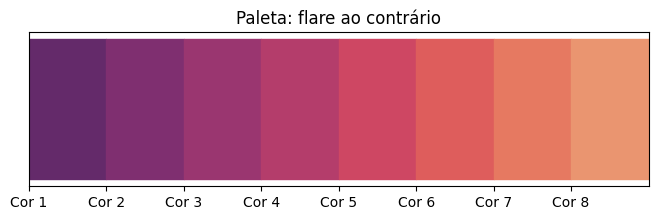

In [ ]:
# Mostrar quadrados coloridos
plt.figure(figsize=(8, 2))
for i, cor in enumerate(cores):
    plt.fill_between([i, i+1], 0, 1, color=cor)

plt.xlim(0, 8)
plt.yticks([])
plt.xticks(range(8), [f'Cor {i+1}' for i in range(8)])
plt.title("Paleta: flare ao contrário")
plt.show()

In [ ]:
sns.set_palette(cores)

# Dataframe de 2019 (Ana)

Para o teste de hipótese, foi necessário utilizar um dataframe externo, do mesmo artigo do projeto, porém contendo os boletins de ocorrências registrados no ano de 2019, um ano que seria usado de referência para análise como anterior à pandemia. **Futuramente será adicionado os dataframes relacionados ao ano de 2021 e 2022 para responder a pergunta corretamente.**



Os dados foram tratados neste link [Dados de 2019 no Google Colab](https://colab.research.google.com/drive/1AzmqebCRm_lOwuKQBbPOihBdSVWvvCJf?usp=sharing).


In [ ]:
df_2019= pd.read_csv("/content/drive/MyDrive/dfTratado2019.csv", delimiter=",")

/tmp/ipython-input-73-4233201205.py:1: DtypeWarning: Columns (24,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019= pd.read_csv("/content/drive/MyDrive/dfTratado2019.csv", delimiter=",")


In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737069 entries, 0 to 737068
Data columns (total 57 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NUM_BO                      737069 non-null  float64
 1   ANO_BO                      737069 non-null  int64  
 2   CODIGO_BOLETIM              737069 non-null  object 
 3   NATUREZA_APURADA            737069 non-null  object 
 4   DATA_OCORRENCIA             737069 non-null  object 
 5   HORA_OCORRENCIA             578450 non-null  object 
 6   PERIODO_OCORRENCIA          737069 non-null  object 
 7   CIDADE                      737069 non-null  object 
 8   LOGRADOURO                  737069 non-null  object 
 9   NUMERO_LOGRADOURO           727580 non-null  float64
 10  BAIRRO                      737069 non-null  object 
 11  UF                          737069 non-null  object 
 12  TIPO_LOCAL                  737069 non-null  object 
 13  LATITUDE      

É possível perceber que ainda que os dados tenham sido tratados, não se manteve os tipos após a exportação. Dessa maneira, se vê necessário realizar a conversão das datas.

In [ ]:
df_2019['DATA_OCORRENCIA'] = pd.to_datetime(df['DATA_OCORRENCIA'], errors='coerce')
df_2019['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(df['DATA_NASCIMENTO_PESSOA'], errors='coerce')
df_2019['DATA_HORA_ELABORACAO'] = pd.to_datetime(df['DATA_HORA_ELABORACAO'], errors='coerce')
df_2019['DATA_COMUNICACAO'] = pd.to_datetime(df['DATA_COMUNICACAO'], errors='coerce')

Agora é necessário separar no df original apenas os anos nos quais as ocorrências foram em 2019 e 2022.

In [ ]:
df_2019_2022 = df[df['DATA_OCORRENCIA'].dt.year == 2019]

In [ ]:
df_2022 = df[df['DATA_OCORRENCIA'].dt.year == 2022]

Será mesclado em um dataframe todas as ocorrências de 2019:

In [ ]:
df_ocorrencias_2019 = pd.concat([df_2019, df_2019_2022], ignore_index=True)

E por fim, será preciso mesclar esses dois dataframes para que possam ser analisados como um único dataframe.

In [ ]:
df_ocorrencias_2019_2022 = pd.concat([df_ocorrencias_2019, df_2022], ignore_index=True)

Utilizou-se o método value_counts para analisar se há alguma relação entre o tipo de local onde o crime ocorreu e o contexto da pandemia, no entanto o resultado não saiu como esperado (quantidade maior de crimes em residências em 2022 e comparação com o ano de 2019).

In [ ]:
ocorrencias_2022 = df_2022[df['TIPO_LOCAL'] == "RESIDENCIA"].shape[0]
print(f"Total de ocorrencias em 2022: {ocorrencias_2022}")

Total de ocorrencias em 2022: 43695


/tmp/ipython-input-80-1556365930.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ocorrencias_2022 = df_2022[df['TIPO_LOCAL'] == "RESIDENCIA"].shape[0]


In [ ]:
ocorrencias_2019 = df_ocorrencias_2019[df_ocorrencias_2019['TIPO_LOCAL'] == "RESIDENCIA"].shape[0]
print(f"Total de ocorrencias em 2019: {ocorrencias_2019}")

Total de ocorrencias em 2019: 54171


Portanto, os dataframes ficaram organizados da seguinte forma:

- **df_ocorrencias_2019**: dados de ocorrências que *ocorreram em 2019* e foram registradas nos anos de 2019 e 2022
- **df_2022**: dados de ocorrências que *ocorreram em 2022* e foram registradas em 2022
- **df_ocorrencias_2019_2022**: união dos conjuntos de dados acima, com ocorrências de 2022 e 2019

---
A partir desse dataframe de 2019, é possível fazer algumas perguntas:

 Análise exploratória

In [ ]:
df_2022['CATEGORIA_CRIME'].value_counts()

,count
CATEGORIA_CRIME,
Patrimonial,641855
Outros,53825
Pessoa,9359
Administração Pública,5058
Imprensa / Honra,598
Propriedade Imaterial,47
Ambiental,15


In [ ]:
df_ocorrencias_2019['CATEGORIA_CRIME'].value_counts()

,count
CATEGORIA_CRIME,
Patrimonial,688491
Outros,34517
Pessoa,8610
Administração Pública,4846
Imprensa / Honra,415
Não classificado,144
Propriedade Imaterial,100
Ambiental,23


In [ ]:
df_2022['CATEGORIA_CRIME'].describe()

,CATEGORIA_CRIME
count,710757
unique,7
top,Patrimonial
freq,641855


In [ ]:
df_ocorrencias_2019['CATEGORIA_CRIME'].describe()

,CATEGORIA_CRIME
count,737146
unique,8
top,Patrimonial
freq,688491


Quais foram os períodos do dia com mais ocorrências em 2019?

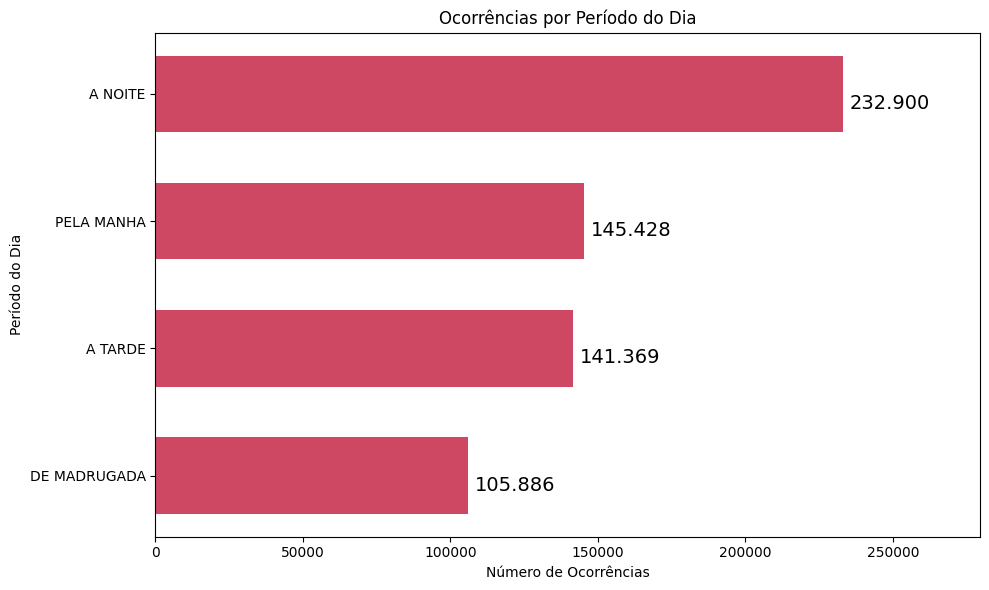

In [ ]:
df_filtrado = df_ocorrencias_2019[df_ocorrencias_2019['PERIODO_OCORRENCIA'] != 'DESCONHECIDO']
contagem_periodo = df_filtrado['PERIODO_OCORRENCIA'].value_counts().sort_values()

# Obter o período com maior número de ocorrências
periodo_top = contagem_periodo.idxmax()
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_periodo.index, contagem_periodo.values, color=cores[4], height=0.6)
plt.xlim(0, max(contagem_periodo.values) * 1.2)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Período do Dia')
plt.title('Ocorrências por Período do Dia')

# Adicionar rótulos ao lado de cada barra
for bar in bars:
    largura = bar.get_width()
    plt.text(largura + max(contagem_periodo.values) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(largura):,}'.replace(',', '.'),
             va='top', ha='left', fontsize=14)

plt.tight_layout()
plt.show()

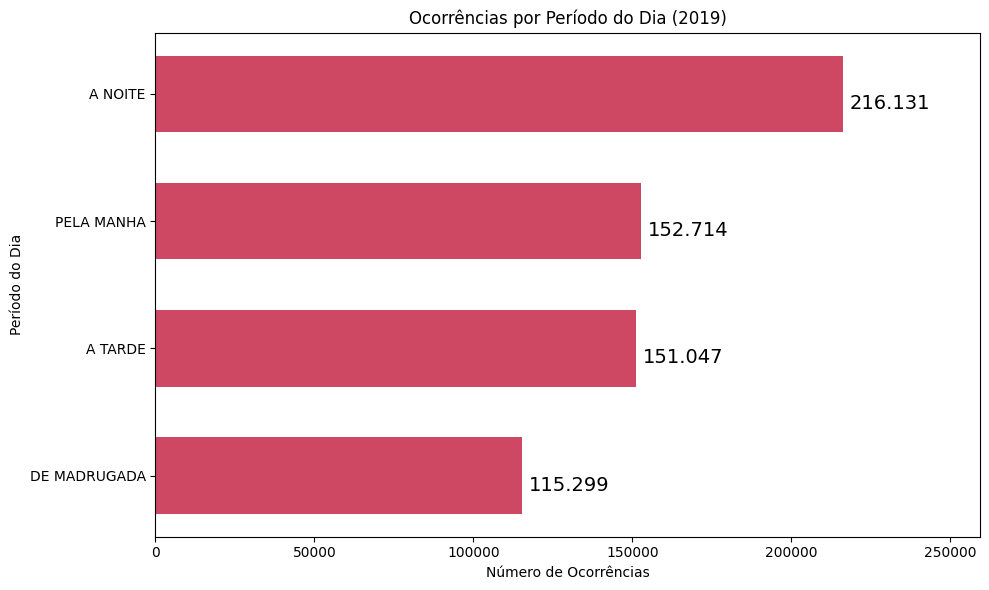

In [ ]:
df_filtrado = df_2022[df_2022['PERIODO_OCORRENCIA'] != 'DESCONHECIDO']
contagem_periodo = df_filtrado['PERIODO_OCORRENCIA'].value_counts().sort_values()

# Obter o período com maior número de ocorrências
periodo_top = contagem_periodo.idxmax()
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_periodo.index, contagem_periodo.values, color=cores[4], height=0.6)
plt.xlim(0, max(contagem_periodo.values) * 1.2)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Período do Dia')
plt.title('Ocorrências por Período do Dia (2019)')

# Adicionar rótulos ao lado de cada barra
for bar in bars:
    largura = bar.get_width()
    plt.text(largura + max(contagem_periodo.values) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(largura):,}'.replace(',', '.'),
             va='top', ha='left', fontsize=14)

plt.tight_layout()
plt.show()

Quais foram as categorias de crimes com mais ocorrências em 2019?

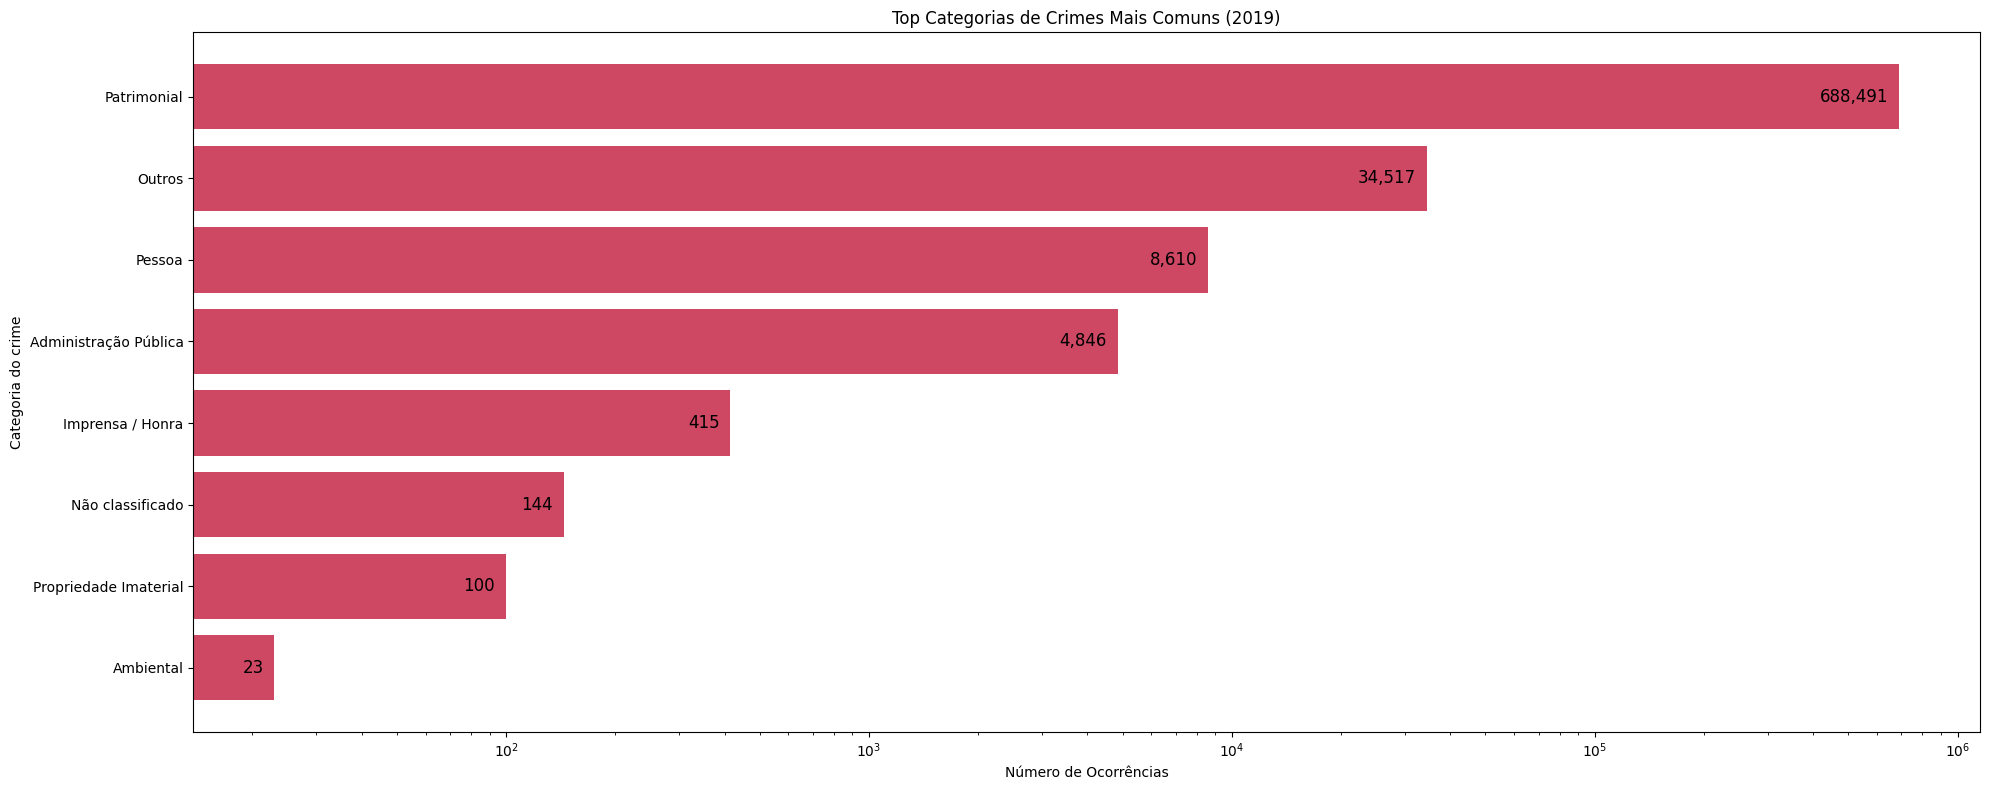

In [ ]:
top_natureza = df_ocorrencias_2019['CATEGORIA_CRIME'].value_counts().head(10).sort_values()

plt.figure(figsize=(20, 8))
bars_natureza = plt.barh(top_natureza.index, top_natureza.values, color=cores[4])
plt.xlabel('Número de Ocorrências')
plt.ylabel('Categoria do crime')
plt.title('Top Categorias de Crimes Mais Comuns (2019)')

plt.xscale('log')

# Adicionar rótulos de valor nas barras
for bar in bars_natureza:
    width = bar.get_width()
    padding_em_escala_log = 0.03

    if width > 0:
        x_position = 10**(np.log10(width) - padding_em_escala_log) if width > 10**padding_em_escala_log else width / 2
    else:
        x_position = 0

    plt.text(x_position,
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center',
             ha='right',
             color='black',
             fontsize=12)

plt.tight_layout()
plt.show()

Quais foram as 10 espécies de crimes com mais ocorrências em 2019?

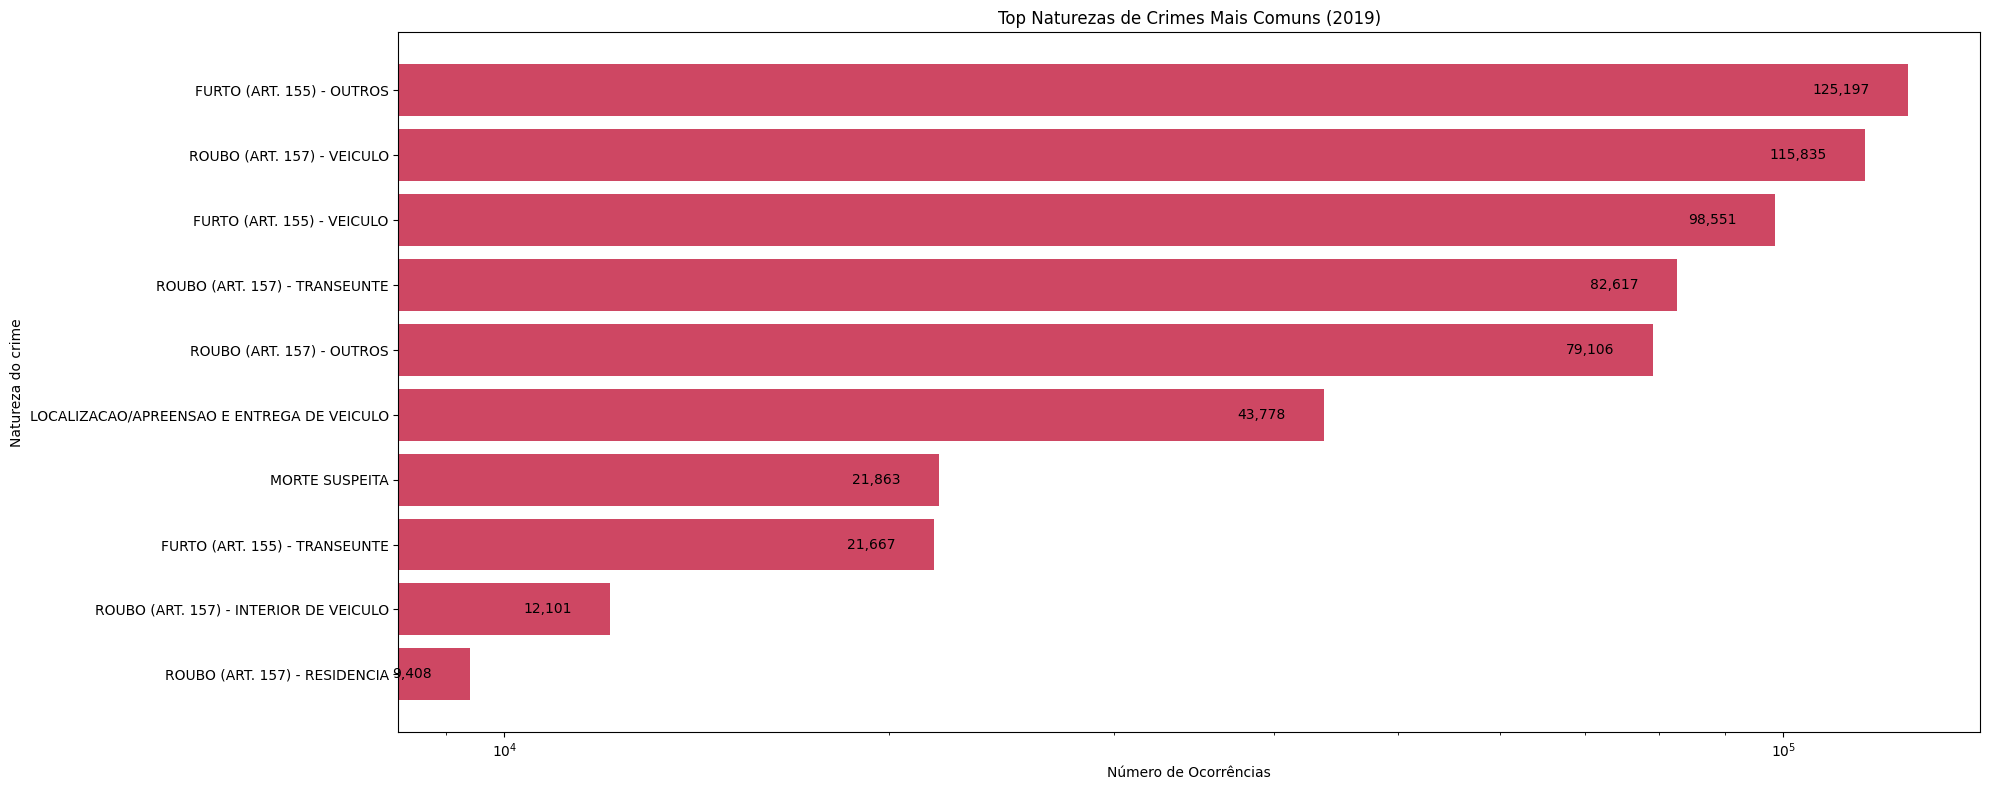

In [ ]:
top_natureza = df_ocorrencias_2019['NATUREZA_APURADA'].value_counts().head(10).sort_values()

plt.figure(figsize=(20, 8))
bars_natureza = plt.barh(top_natureza.index, top_natureza.values, color= cores[4])
plt.xlabel('Número de Ocorrências')
plt.ylabel('Natureza do crime')
plt.title('Top Naturezas de Crimes Mais Comuns (2019)')

plt.xscale('log')

# Adicionar rótulos de valor nas barras
for bar in bars_natureza:
    width = bar.get_width()
    padding_em_escala_log = 0.03

    if width > 0:
        x_position = 10**(np.log10(width) - padding_em_escala_log) if width > 10**padding_em_escala_log else width / 2
    else:
        x_position = 0

    plt.text(x_position,
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center',
             ha='right',
             color='black',
             fontsize=10)

plt.tight_layout()
plt.show()

# Análise exploratória dos dados

**Descrição**: Com os dados preparados e
entendidos, nesta etapa o grupo deve gerar **estatísticas descritivas, gráficos e
tabelas** para conhecer os dados. Todo conhecimento importante extraído deverá ser
documentado e discutido. Pensem fora da caixa e tentem extrair correlações não
óbvias entre os atributos e objetos. Nesta etapa, o objetivo é responder **parte das
perguntas** elaboradas.

Nesse trecho do projeto será feito o uso da função describe().
Para colunas numéricas, ele exibe:

* count: número de valores não nulos
* mean: média
* std: desvio padrão
* min: valor mínimo
* 25%: primeiro quartil (Q1)
* 50%: mediana (Q2)
* 75%: terceiro quartil (Q3)
* max: valor máximo

Para colunas não numéricas (objetos/categorias), ele exibe:

* count: número de valores não nulos
* unique: número de valores únicos
* top: valor mais frequente
* freq: frequência do valor mais frequente

# Perguntas

1. **Qual a natureza e espécie de crimes mais comuns?**
2. **Qual é o tempo médio entre a ocorrência, a elaboração do boletim e a comunicação dos fatos?**
3. **Quais são 3 tipos de relacionamentos possíveis entre veículos (marca, modelo, ano de fabricação e cidade) e crimes patrimoniais?**
4. **Existe alguma relação entre período das ocorrências e a gravidade dos incidentes fatais?**
5. **Qual a distribuição dos períodos do dia (manhã, tarde, noite, madrugada) nas ocorrências?**
6. **Há alguma tendência de aumento ou diminuição nas ocorrências fatais ao longo dos anos?**
7. **Existe uma faixa etária que apresenta maior probabilidade de fatalidades em determinados tipo de ocorrência?**
8. **Qual é o município com mais ocorrências registradas em 2022 em valores absolutos e relativos a população do município?** (PERGUNTA ATUALIZADA)
9. **Qual é o bairro e logradouro com mais ocorrências registradas em 2022 em valores absolutos?** (PERGUNTA ADICIONADA)
10. **Quais foram os 15 anos em que ocorreram mais crimes que só foram registrados em 2022, desconsiderando os crimes efetivamente cometidos em 2022** (PERGUNTA ADICIONADA)
11. **Quais foram os meses nos quais mais houveram ocorrências registradas em 2022?** (PERGUNTA ADICIONADA)
12. **Quais foram os dias da semana nos quais mais houveram ocorrências registradas em 2022?** (PERGUNTA ADICIONADA)
13. **Quais foram os horários nos quais mais houveram ocorrências registradas em 2022?** (PERGUNTA ADICIONADA)
14. **Quais são os dias da semana e horários específicos com maior número de ocorrências?** (PERGUNTA ADICIONADA)

A seguir foi feito a análise exploratória dos dados com base nas perguntas desenvolvidas pelo grupo, o grupo acabou adicionando perguntas, como as 13,14,15,16 e 17, alterando a pergunta 1 e removendo as perguntas 2 e 9. A remoção foi feita com base em uma quantidade muito grande de dados nulos nas colunas **"COR_PELE", "SEXO_PESSOA", "PROFISSAO", "IDADE_PESSOA"** e "DATA_NASCIMENTO_PESSOA" nas quais o foco das perguntas eram analisá-las.

- Divisão de Perguntas para cada membro do grupo:
  - Ana Luísa: Pergunta
  - Daniel: Pergunta 1
  - Alexia: Pergunta 2,
  - Lucas: Pergunta 3

A divisão das perguntas foi feita com base no nível de dificuldade definido pelo grupo, sendo três para cada. No entanto, ao longo do projeto, novas perguntas foram criadas e adicionadas.

Perguntas que foram desconsideradas pelo grupo (por motivos como poucos dados, dados nulos, aumento do escopo e etc):

  - ~~Como se distribuem os perfis de pessoas envolvidas (vítimas/autores) em termos de idade, sexo e cor de pele (fatores demográficos)?~~ (PERGUNTA REMOVIDA)

  - ~~Quais perfis demográficos (sexo, profissão, cor de pele) estão mais presentes em ocorrências fatais?~~ (PERGUNTA REMOVIDA)
  - ~Quais foram os anos nos quais mais houveram ocorrências registradas em 2022?~

### Pergunta 1: Qual a natureza e espécie de crimes mais comuns?(Daniel)

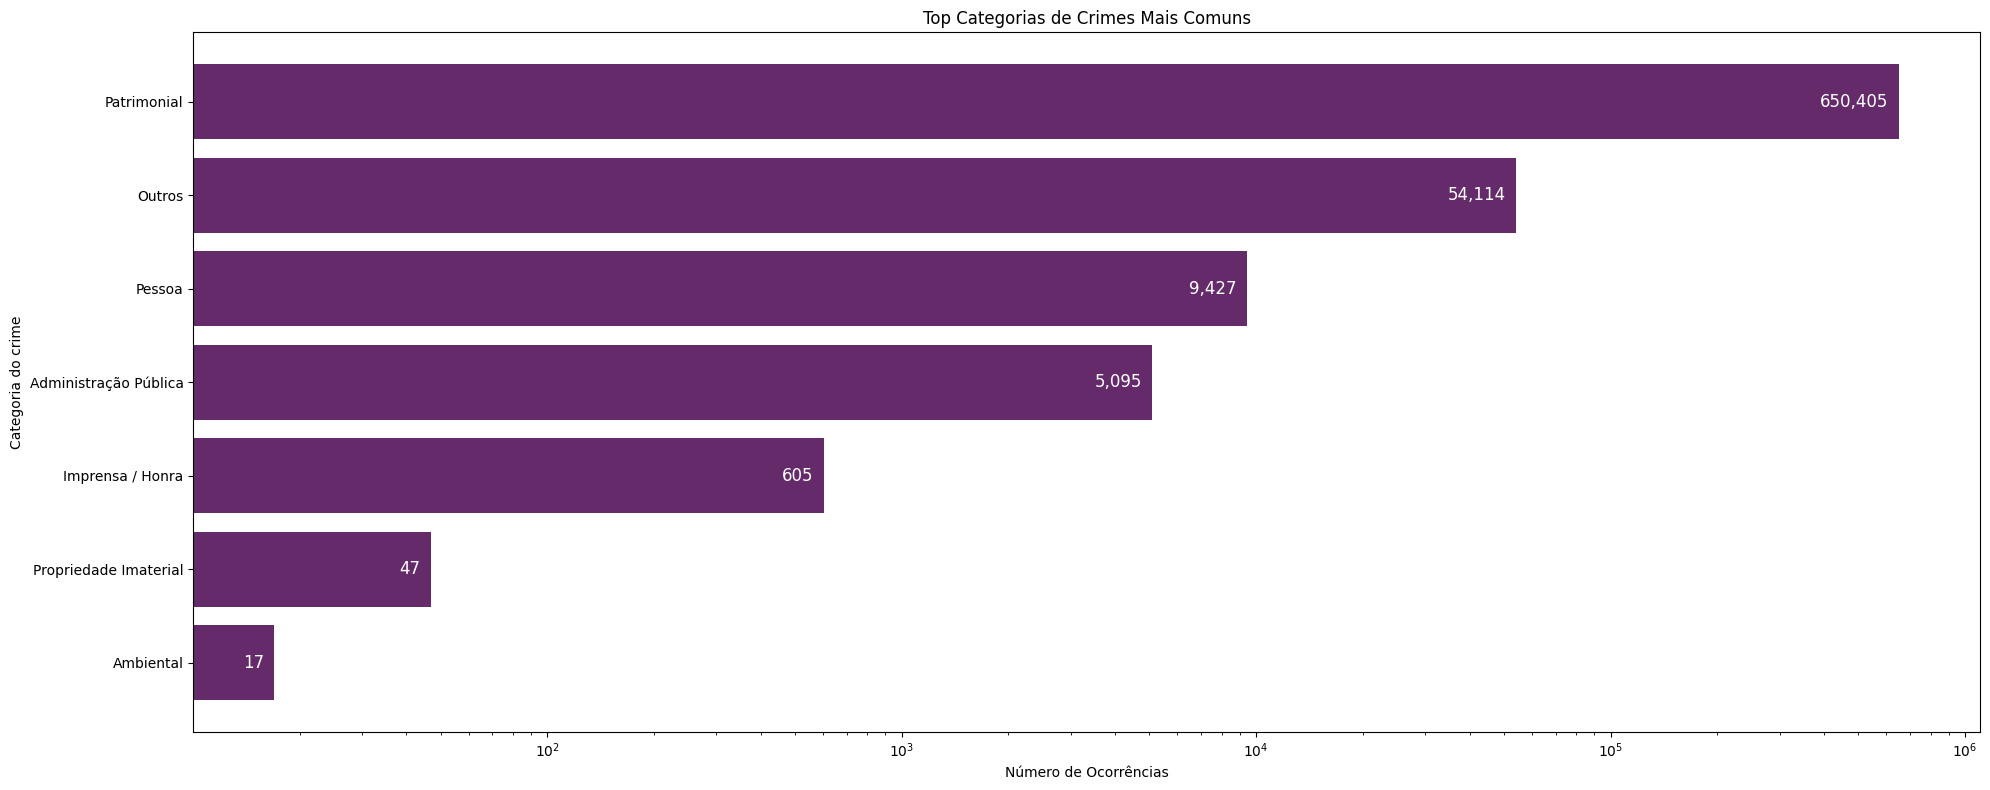

In [ ]:
top_natureza = df['CATEGORIA_CRIME'].value_counts().head(10).sort_values()

plt.figure(figsize=(20, 8))
bars_natureza = plt.barh(top_natureza.index, top_natureza.values)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Categoria do crime')
plt.title('Top Categorias de Crimes Mais Comuns')

plt.xscale('log')

# Adicionar rótulos de valor nas barras
for bar in bars_natureza:
    width = bar.get_width()
    padding_em_escala_log = 0.03

    if width > 0:
        x_position = 10**(np.log10(width) - padding_em_escala_log) if width > 10**padding_em_escala_log else width / 2
    else:
        x_position = 0

    plt.text(x_position,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width):,}',
             va='center',
             ha='right',
            color='white',
             fontsize=12)

plt.tight_layout()
plt.show()


Podemos observar o seguinte:

O gráfico de barras horizontais apresenta a contagem de ocorrências para as diferentes categorias de crimes, mostrando quais categorias são mais comuns no conjunto de dados.

Claramente, a categoria "Patrimonial" é a mais predominante, com um número significativamente maior de ocorrências (464.175) em comparação com as outras categorias. Isso indica que crimes relacionados a patrimônio (como roubos, furtos, estelionato, etc.) são os mais frequentes neste dataset.

Para responder à pergunta "Qual a natureza e espécie de crimes mais comuns?", realizamos uma análise exploratória nos dados disponíveis. O objetivo é identificar os tipos de crimes que ocorrem com maior frequência, tanto pela sua natureza apurada quanto pela espécie relacionada.

O código a seguir primeiro calcula a contagem de ocorrências para cada categoria nas colunas 'CATEGORIA_CRIME' e 'ESPECIE'(Optamos por usar categoria do crime para facilitar a visualização). Em seguida, seleciona as categorias mais frequentes em cada uma dessas colunas.


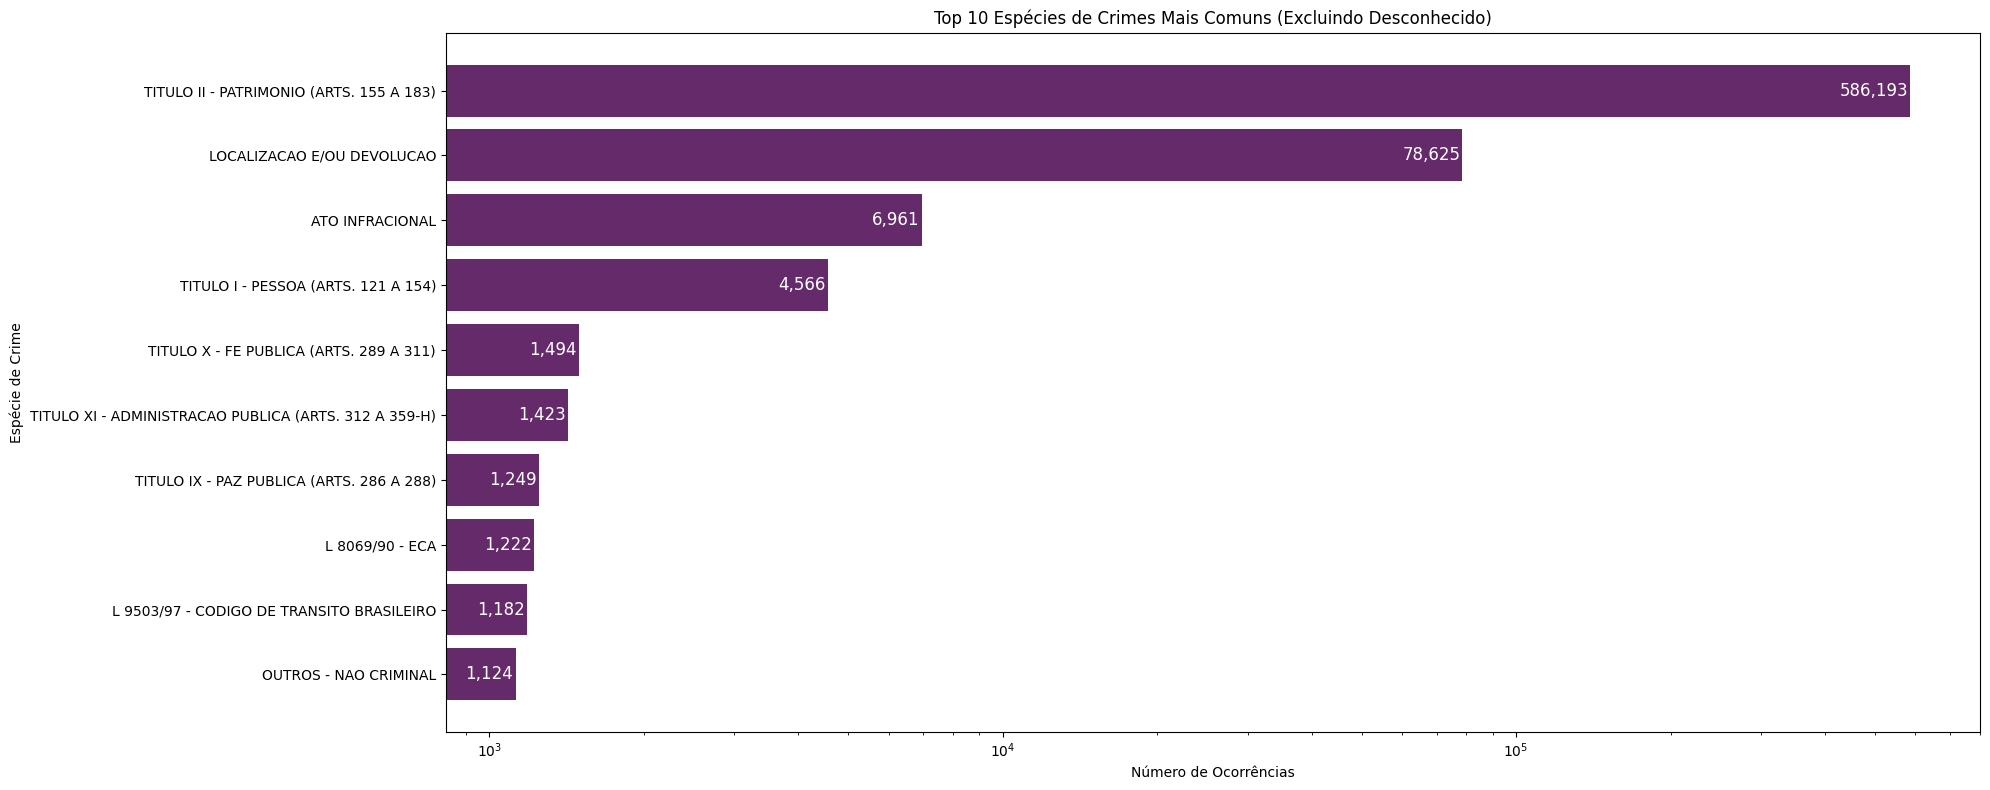

In [ ]:
if 'ESPECIE' not in df.columns:
    print("Erro: Coluna 'ESPECIE' não encontrada no DataFrame.")
else:
    df_filtrado = df[df['ESPECIE'] != 'DESCONHECIDO'].copy()

    if df_filtrado.empty:
        print("Após remover 'DESCONHECIDO', não há dados restantes para plotar.")
    else:
        top_10_especie = df_filtrado['ESPECIE'].value_counts().head(10).sort_values()

        if top_10_especie.empty:
            print("Não há espécies de crime suficientes (além de 'DESCONHECIDO') para formar um Top 10.")
        else:
            plt.figure(figsize=(20, 8))
            bars_especie = plt.barh(top_10_especie.index, top_10_especie.values)
            plt.xlabel('Número de Ocorrências')
            plt.ylabel('Espécie de Crime')
            plt.title('Top 10 Espécies de Crimes Mais Comuns (Excluindo Desconhecido)')

            plt.xscale('log')

            for bar in bars_especie:
                width = bar.get_width()
                padding_fracao = 0.01

                plt.text(width * (1 - padding_fracao),
                         bar.get_y() + bar.get_height()/2,
                         f'{int(width):,}',
                         va='center',
                         ha='right',
                         color='white',
                         fontsize=12)

            plt.tight_layout()
            plt.show()


Podemos analisar o seguinte:

Este gráfico de barras horizontais visualiza as espécies de crimes que ocorreram com maior frequência no conjunto de dados.

A espécie de crime mais comum, de longe, é "TITULO II - PATRIMONIO (ARTS. 155 A 183)", registrando impressionantes 444.514 ocorrências. Este título no Código Penal Brasileiro geralmente abrange crimes contra o patrimônio, como furto, roubo, dano, estelionato, etc., o que corrobora a observação do gráfico anterior sobre a predominância de crimes patrimoniais por categoria.

### Pergunta 2: Qual é o tempo médio entre a ocorrência, a elaboração do boletim e a comunicação dos fatos? (Aléxia)

In [ ]:
df['DATA_COMUNICACAO'] = pd.to_datetime(df['DATA_COMUNICACAO'], errors='coerce')
df['DATA_ELABORACAO'] = pd.to_datetime(df['DATA_HORA_ELABORACAO'], errors='coerce')
df['DATA_ELABORACAO'] = df['DATA_ELABORACAO'].dt.date # Necessário para manter só a data e descartar as horas
df['DATA_ELABORACAO'] = pd.to_datetime(df['DATA_ELABORACAO']) # Convertendo novamente para datetime mantendo apenas a data

In [ ]:
# Verificar se há valores nulos
print(df['DATA_OCORRENCIA'].isnull().sum())  # Conta quantos valores nulos existem
print(df['DATA_COMUNICACAO'].isnull().sum())  # Conta quantos valores nulos existem
print(df['DATA_HORA_ELABORACAO'].isnull().sum())  # Conta quantos valores nulos existem

0
28680
1


Data ocorrência não apresenta valores nulos, data comunicação apresenta vários valores nulos e data de elaboração apenas 1 valor nulo

In [ ]:
# Criar copia do df onde tem data -> comunicação, elaboracao e ocorrencia, desconsiderando onde há valor(es) nulo(s) em qualquer uma dessas colunas
df_completo = df.dropna(subset=['DATA_COMUNICACAO', 'DATA_ELABORACAO', 'DATA_OCORRENCIA']).copy()

# Calcular a diferença entre duas datas em DIAS usando df_completo
df_completo['tempo_ocorrencia_comunicacao_dias'] = (df_completo['DATA_COMUNICACAO'] - df_completo['DATA_OCORRENCIA']).apply(lambda x: x.days if pd.notnull(x) else None)
df_completo['tempo_comunicacao_elaboracao_dias'] = (df_completo['DATA_ELABORACAO'] - df_completo['DATA_COMUNICACAO']).apply(lambda x: x.days if pd.notnull(x) else None)
df_completo['tempo_ocorrencia_elaboracao_dias'] = (df_completo['DATA_ELABORACAO'] - df_completo['DATA_OCORRENCIA']).apply(lambda x: x.days if pd.notnull(x) else None)

# Exibir estatísticas descritivas
print("\nTempo entre Ocorrência e Comunicação dos Fatos:")
print(df_completo['tempo_ocorrencia_comunicacao_dias'].describe())

print("\nTempo entre Comunicação e Elaboração do Boletim:")
print(df_completo['tempo_comunicacao_elaboracao_dias'].describe())

print("\nTempo entre Ocorrência e a Elaboração do Boletim:")
print(df_completo['tempo_ocorrencia_elaboracao_dias'].describe())


Tempo entre Ocorrência e Comunicação dos Fatos:
count    691030.000000
mean         14.478489
std         333.209553
min        -333.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       36525.000000
Name: tempo_ocorrencia_comunicacao_dias, dtype: float64

Tempo entre Comunicação e Elaboração do Boletim:
count    691030.000000
mean          1.469625
std          47.671305
min        -474.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         748.000000
Name: tempo_comunicacao_elaboracao_dias, dtype: float64

Tempo entre Ocorrência e a Elaboração do Boletim:
count    691030.000000
mean         15.948114
std         336.040733
min        -333.000000
25%           0.000000
50%           1.000000
75%           8.000000
max       36526.000000
Name: tempo_ocorrencia_elaboracao_dias, dtype: float64


O mínimo de tempo_ocorrencia_comunicacao_dias, tempo_comunicacao_elaboracao e tempo_ocorrencia_elaboracao são todos negativos.

Isso indica erros na hora de registrar os dados:
Não é possível comunicar uma ocorrência antes dela ocorrer, nem é possível registrar um BO antes de uma ocorrência ocorrer.

In [ ]:
# Selecionar linhas onde qualquer diferença de dias é negativa
df_inconsistencias = df_completo[
    (df_completo['tempo_ocorrencia_comunicacao_dias'] < 0) |
    (df_completo['tempo_comunicacao_elaboracao_dias'] < 0) |
    (df_completo['tempo_ocorrencia_elaboracao_dias'] < 0)
]
# Mostrar os 10 primeiros registros inconsistentes
print(df_inconsistencias[['DATA_OCORRENCIA', 'DATA_ELABORACAO', 'DATA_COMUNICACAO',
                          'tempo_ocorrencia_comunicacao_dias', 'tempo_comunicacao_elaboracao_dias', 'tempo_ocorrencia_elaboracao_dias']].head(10))

      DATA_OCORRENCIA DATA_ELABORACAO DATA_COMUNICACAO  \
29633      2021-12-31      2022-01-01       2022-02-01   
29634      2021-12-31      2022-01-01       2022-02-01   
29990      2021-12-15      2021-12-15       2022-03-01   
30131      2021-12-13      2021-12-13       2022-03-01   
30132      2021-12-13      2021-12-13       2022-03-01   
30187      2021-12-31      2022-02-01       2022-03-01   
30188      2021-12-31      2022-02-01       2022-03-01   
30189      2021-12-31      2022-02-01       2022-03-01   
30190      2021-12-31      2022-02-01       2022-03-01   
30299      2021-12-29      2022-02-01       2022-03-01   

       tempo_ocorrencia_comunicacao_dias  tempo_comunicacao_elaboracao_dias  \
29633                                 32                                -31   
29634                                 32                                -31   
29990                                 76                                -76   
30131                                 78     

É necessário excluir registros inconsistentes

In [ ]:
# Tirando valores inconsistentes
df_completo = df_completo.drop(df_inconsistencias.index)

In [ ]:
print(len(df_completo), len(df_inconsistencias))

628180 62850


In [ ]:
# Exibir estatísticas descritivas
print("\nTempo entre Ocorrência e Comunicação dos Fatos:")
print(df_completo['tempo_ocorrencia_comunicacao_dias'].describe())

print("\nTempo entre Comunicação e Elaboração do Boletim:")
print(df_completo['tempo_comunicacao_elaboracao_dias'].describe())

print("\nTempo entre Ocorrência e a Elaboração do Boletim:")
print(df_completo['tempo_ocorrencia_elaboracao_dias'].describe())


Tempo entre Ocorrência e Comunicação dos Fatos:
count    628180.000000
mean         23.312309
std         338.183880
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       36525.000000
Name: tempo_ocorrencia_comunicacao_dias, dtype: float64

Tempo entre Comunicação e Elaboração do Boletim:
count    628180.000000
mean          7.477715
std          30.076076
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         748.000000
Name: tempo_comunicacao_elaboracao_dias, dtype: float64

Tempo entre Ocorrência e a Elaboração do Boletim:
count    628180.000000
mean         30.790024
std         339.372456
min           0.000000
25%           0.000000
50%           1.000000
75%          26.000000
max       36526.000000
Name: tempo_ocorrencia_elaboracao_dias, dtype: float64


In [ ]:
# Calcular as médias para cada variável de tempo
media_ocorrencia_comunicacao = df_completo['tempo_ocorrencia_comunicacao_dias'].mean()
media_comunicacao_elaboracao = df_completo['tempo_comunicacao_elaboracao_dias'].mean()
media_ocorrencia_elaboracao = df_completo['tempo_ocorrencia_elaboracao_dias'].mean()

# Exibir os resultados
print(f"Tempo médio entre a Ocorrência e a Comunicação dos Fatos: {media_ocorrencia_comunicacao:.2f} dias")
print(f"Tempo médio entre a Comunicação e a Elaboração do Boletim: {media_comunicacao_elaboracao:.2f} dias")
print(f"Tempo médio entre a Ocorrência e a Elaboração do Boletim (Tempo total): {media_ocorrencia_elaboracao:.2f} dias")

Tempo médio entre a Ocorrência e a Comunicação dos Fatos: 23.31 dias
Tempo médio entre a Comunicação e a Elaboração do Boletim: 7.48 dias
Tempo médio entre a Ocorrência e a Elaboração do Boletim (Tempo total): 30.79 dias


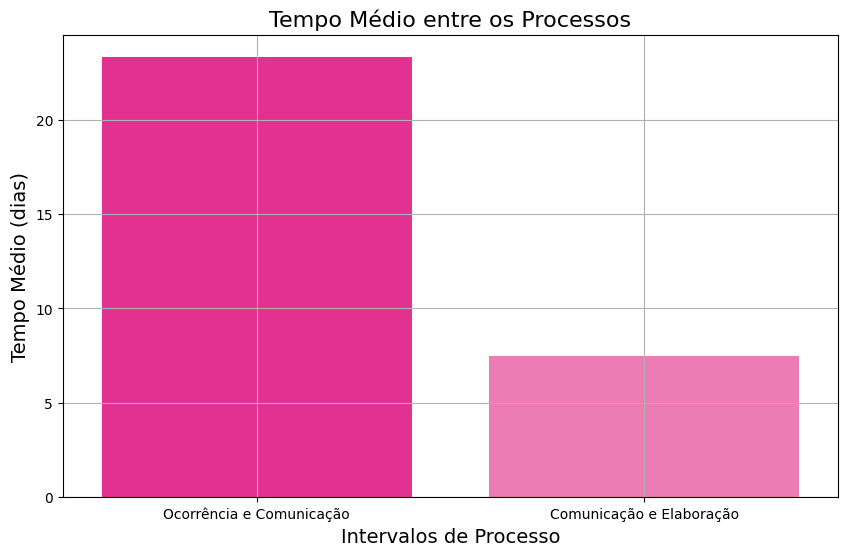

In [ ]:
# Calcular a média do tempo para cada intervalo
tempos_medio = {
    'Ocorrência e Comunicação': df_completo['tempo_ocorrencia_comunicacao_dias'].mean(),
    'Comunicação e Elaboração': df_completo['tempo_comunicacao_elaboracao_dias'].mean(),
}

# Criar um DataFrame para facilitar a visualização
df_tempos_medio = pd.DataFrame(list(tempos_medio.items()), columns=['Intervalo', 'Tempo Médio (dias)'])

# Gerar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Intervalo', y='Tempo Médio (dias)', data=df_tempos_medio, palette=['#FF1493', '#FF69B4'], hue='Intervalo')

# Personalizar o gráfico
plt.title('Tempo Médio entre os Processos', fontsize=16)
plt.xlabel('Intervalos de Processo', fontsize=14)
plt.ylabel('Tempo Médio (dias)', fontsize=14)
plt.grid(True)

# Exibir o gráfico
plt.show()

Interpretando esses dados, é possível perceber que:

Tempo entre ocorrência e comunicação dos fatos:

*   O tempo médio é aproximadamente 23 dias
*   O desvio padrão corresponde a 338 dias, indicando uma grande dispersão nos dados. Embora a média seja de 23 dias, há muitos dados com um intervalo de tempo muito grande
*   O maior intervalo foi de 36525 dias, o que muito provavelmente é um erro. É necessário reavaliar e tratar outliers
* 25% dos casos têm 0 dias entre ocorrência e comunicação.
* 50% dos casos (mediana) têm 0 dias (provavelmente indicando que muitas comunicações foram feitas rapidamente ou imediatamente após a ocorrência).
* 75% dos casos têm 2 dias ou menos entre ocorrência e comunicação.

Tempo entre comunicação dos fatos e elaboração do boletim:

* A elaboração dos boletins tende a ser rápida, com os casos sendo registrados no mesmo dia ou em poucos dias, mas o desvio padrão sugere que há casos que demorem bem mais
* O tempo máximo foi de 748 dias, mas considerando os outros dados parece que esses casos são excepcionais.
* 25% dos casos têm 0 dias entre comunicação e elaboração do boletim.
* 50% dos casos têm 0 dias.
* 75% dos casos têm 1 dia ou menos.


### Pergunta 3: Quais são os 3 tipos de relacionamentos possíveis entre veículos (marca, modelo, ano de fabricação e cidade) e crimes patrimoniais? (Lucas)

Primeiro, foi necessário criar um df separado, no qual tivesse apenas os crimes categorizados como Patrimoniais, algo que fizemos em um passo bem anterior, na criação da coluna Categoria_Crime

In [ ]:
CrimesPatrimoniaisCarro = [
    "FURTO (ART. 155) - VEICULO",
    "ROUBO (ART. 157) - VEICULO",
    "A.I.-ROUBO (ART. 157) - VEICULO",
    "FURTO DE COISA COMUM (ART. 156) - VEICULO"
]
df_patrimoniais = df[df['NATUREZA_APURADA'].isin(CrimesPatrimoniaisCarro)]
df_patrimoniais = df_patrimoniais[df_patrimoniais['MARCA_VEICULO'] != 'DESCONHECIDO']

Após isso, foi criado um df agrupado, no qual junta apenas os dados necessários para responder a pergunta: a marca do veiculo, o modelo, o ano de fabricacao e a cidade.

In [ ]:
df_agrupado = df_patrimoniais.groupby(['MARCA_VEICULO', 'MODELO_VEICULO', 'ANO_FABRICACAO', 'CIDADE']).size().reset_index(name='quantidade_ocorrencias')


Utilização do describe para descrever, de forma básica, o df criado.

In [ ]:
descricao = df_agrupado['quantidade_ocorrencias'].describe()

Também é possivel ver de forma básica a quantidade de ocorrencias similares, usando o sort values na quantidade de ocorrências similares a elas.

In [ ]:
df_agrupado.sort_values('quantidade_ocorrencias', ascending=False).head(10)

,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,CIDADE,quantidade_ocorrencias
28490,HONDA,CG 160 FAN,2021.0,DESCONHECIDO,249
28564,HONDA,CG 160 FAN,2022.0,3550308,216
28475,HONDA,CG 160 FAN,2021.0,3550308,203
28482,HONDA,CG 160 FAN,2021.0,3552809,201
28576,HONDA,CG 160 FAN,2022.0,DESCONHECIDO,179
28569,HONDA,CG 160 FAN,2022.0,3552809,179
29557,HONDA,CG 160 TITAN,2021.0,DESCONHECIDO,163
29540,HONDA,CG 160 TITAN,2021.0,3550308,144
28540,HONDA,CG 160 FAN,2022.0,3534401,141
28363,HONDA,CG 160 FAN,2020.0,3550308,125


Depois é criado um Scatterplot para verificar os anos de fabricação e a marca dos veículos, mas foram descobertos outliers nos dados.

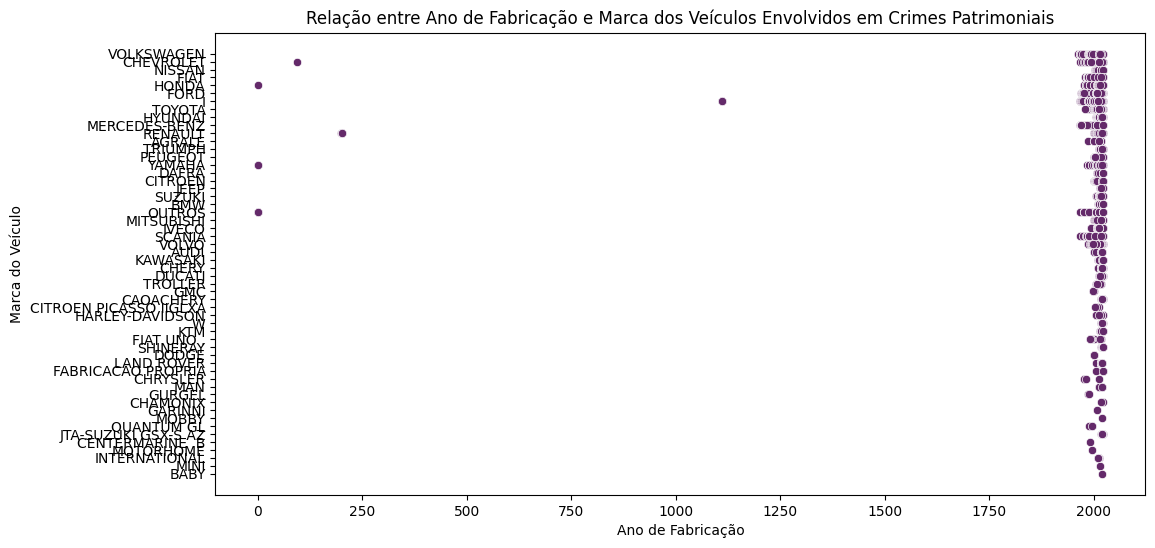

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_patrimoniais, x='ANO_FABRICACAO', y='MARCA_VEICULO')
plt.title('Relação entre Ano de Fabricação e Marca dos Veículos Envolvidos em Crimes Patrimoniais')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Marca do Veículo')
plt.show()


Descobrimos os outliers e pensamos no que fazer com eles.

In [ ]:
df_patrimoniais[df_patrimoniais['ANO_FABRICACAO'] < 1800]

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO,NOME_CIDADE,ID_BO,FAIXA_ETARIA,DIA_OCORRENCIA,DATA_HORA_OCORRENCIA,CATEGORIA_CRIME,DATA_ELABORACAO
258691,3965,2022,3965/2022,FURTO (ART. 155) - VEICULO,2022-01-06,08:43:00,PELA MANHA,3505708,RUA PIRAJU,302.0,VILA S SILVESTR,SP,VIA PUBLICA,-23.486882,-46.887422,POLICIA MILITAR,DESCONHECIDO,DESCONHECIDO,DEL.POL.BARUERI,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaT,DESCONHECIDO,DESCONHECIDO,0,SP,Barueri,PRATA,HONDA,DEPEMEC MOTOCICLOS 1E,0.0,0.0,MOTOCICLO,DESCONHECIDO,NaN,2022-02-06 10:19:50,2022-02-06 10:19:50,2022-02-06 10:19:50,2022-01-06,CONHECIDA,NAO,DESCONHECIDO,BO PARA REGISTRO,TITULO II - PATRIMONIO (ARTS. 155 A 183),CONSUMADO,DESCONHECIDO,DESCONHECIDO,Barueri,258692,DESCONHECIDO,QUINTA-FEIRA,2022-01-06 08:43:00,Patrimonial,2022-02-06
269286,97949,2022,97949/2022,FURTO (ART. 155) - VEICULO,2022-06-30,00:40:00,DE MADRUGADA,DESCONHECIDO,RUA LARANJAL DO JARI,200.0,VILA PIRITUBA,SP,VIA PUBLICA,NaN,NaN,DELEGACIA ELETRONICA,DESCONHECIDO,DESCONHECIDO,33º D.P. PIRITUBA,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaT,DESCONHECIDO,DESCONHECIDO,AQL2E71,SP,São Paulo,CINZA,RENAULT,SANDERO EXP 16,200.0,NaN,AUTOMOVEL,DESCONHECIDO,NaN,2022-06-30 14:07:52,2022-06-30 14:07:52,2022-06-30 14:07:52,2022-06-30,DESCONHECIDA,NAO,DESCONHECIDO,BO PARA INVESTIGACAO,TITULO II - PATRIMONIO (ARTS. 155 A 183),CONSUMADO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,269287,DESCONHECIDO,QUINTA-FEIRA,2022-06-30 00:40:00,Patrimonial,2022-06-30
272530,1671,2022,1671/2022,FURTO (ART. 155) - VEICULO,2022-10-08,02:00:00,DE MADRUGADA,3523206,RODOVIA SP 258,338.0,CRUZEIRO,SP,RODOVIA/ESTRADA,-24.102449,-49.338614,DEL.POL.ITARARE,DESCONHECIDO,DESCONHECIDO,DEL.POL.ITARARE,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaT,DESCONHECIDO,DESCONHECIDO,HKK9642,SP,Itararé,DESCONHECIDO,YAMAHA,FACTOR YBR125 K,0.0,NaN,MOTOCICLO,DESCONHECIDO,NaN,2022-10-08 18:55:02,2022-10-08 18:55:02,2022-10-08 18:55:02,2022-10-08,CONHECIDA,NAO,DESCONHECIDO,BO PARA INVESTIGACAO,TITULO II - PATRIMONIO (ARTS. 155 A 183),CONSUMADO,DESCONHECIDO,DESCONHECIDO,Itararé,272531,DESCONHECIDO,SÁBADO,2022-10-08 02:00:00,Patrimonial,2022-10-08
272642,1674,2022,1674/2022,FURTO (ART. 155) - VEICULO,2022-10-08,02:00:00,DE MADRUGADA,3523206,RODOVIA SP 258,338.0,CRUZEIRO,SP,RODOVIA/ESTRADA,-24.102449,-49.338614,DEL.POL.ITARARE,DESCONHECIDO,DESCONHECIDO,DEL.POL.ITARARE,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaT,DESCONHECIDO,DESCONHECIDO,HKK9642,SP,Itararé,DESCONHECIDO,YAMAHA,FACTOR YBR125 K,0.0,NaN,MOTOCICLO,DESCONHECIDO,NaN,2022-11-08 09:21:14,2022-11-08 09:21:14,2022-11-08 09:21:14,2022-10-08,CONHECIDA,NAO,DESCONHECIDO,BO PARA INVESTIGACAO,TITULO II - PATRIMONIO (ARTS. 155 A 183),CONSUMADO,DESCONHECIDO,DESCONHECIDO,Itararé,272643,DESCONHECIDO,SÁBADO,2022-10-08 02:00:00,Patrimonial,2022-11-08
310449,1639855,2022,1639855/2022,FURTO (ART. 155) - VEICULO,2022-08-19,13:30:00,A TARDE,3515707,RUA DIAULAS PARREIRAS,8.0,GUAIANASES,SP,VIA PUBLICA,-23.550439,-46.415739,DELEGACIA ELETRONICA,DESCONHECIDO,DESCONHECIDO,44º D.P. GUAIANAZES,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,DESCONHECIDO,NaN,NaT,DESCONHECIDO,DESCONHECIDO,CBP2163,SP,São Paulo,VERMELHO,CHEVROLET,CORSA WIND,95.0,NaN,AUTOMOVEL,DESCONHECIDO,NaN,2022-09-19 11:45:13,2022-09-19 11:45:13,2022-09-19 11:45:13,2022-08-19,DESCONHECIDA,NAO,DESCONHECIDO,

Considerando que os outliers eram duplicatas, existiam apenas 9 dados que seriam válidos, mas que por questão de integridade dos dados decidimos apagá-los.

In [ ]:
df_filtrado = df_patrimoniais[df_patrimoniais['ANO_FABRICACAO'] >= 1900].reset_index(drop=True)

Outro describe feito para analisar os dados de médias, percentis, mínimos e máximos, a fim de analisar se existiam outros outliers, que não foi o caso.

In [ ]:
df_filtrado['ANO_FABRICACAO'].describe()

,ANO_FABRICACAO
count,184869.000000
mean,2012.988814
std,8.288475
min,1962.000000
25%,2010.000000
50%,2015.000000
75%,2019.000000
max,2022.000000


E por fim, foi analisado manualmente se havia mais algum outlier.

In [ ]:
df_filtrado[df_filtrado['ANO_FABRICACAO'] < 1800]

,NUM_BO,ANO_BO,CODIGO_BOLETIM,NATUREZA_APURADA,DATA_OCORRENCIA,HORA_OCORRENCIA,PERIODO_OCORRENCIA,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,BAIRRO,UF,TIPO_LOCAL,LATITUDE,LONGITUDE,DELEGACIA_ELABORACAO,DEPARTAMENTO_ELABORACAO,SECCIONAL_ELABORACAO,DELEGACIA_CIRCUNSCRICAO,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,COR_VEICULO,MARCA_VEICULO,MODELO_VEICULO,ANO_FABRICACAO,ANO_MODELO,TIPO_VEICULO,MARCA_CELULAR,QUANT_CELULAR,BO_INICIADO,BO_EMITIDO,DATA_HORA_ELABORACAO,DATA_COMUNICACAO,BO_AUTORIA,FLAGRANTE,EXAME,SOLUCAO,ESPECIE,STATUS,FLAG_VITIMA_FATAL,DESDOBRAMENTO,NOME_CIDADE,ID_BO,FAIXA_ETARIA,DIA_OCORRENCIA,DATA_HORA_OCORRENCIA,CATEGORIA_CRIME,DATA_ELABORACAO


E foi exibido corretamente o Scatterplot dos anos de fabricação (por conta de uma marca de carro preenchida incorretamente como "I", os gráficos foram representados incorretamente, portanto, removemos deste df filtrado essa suposta marca de carro).

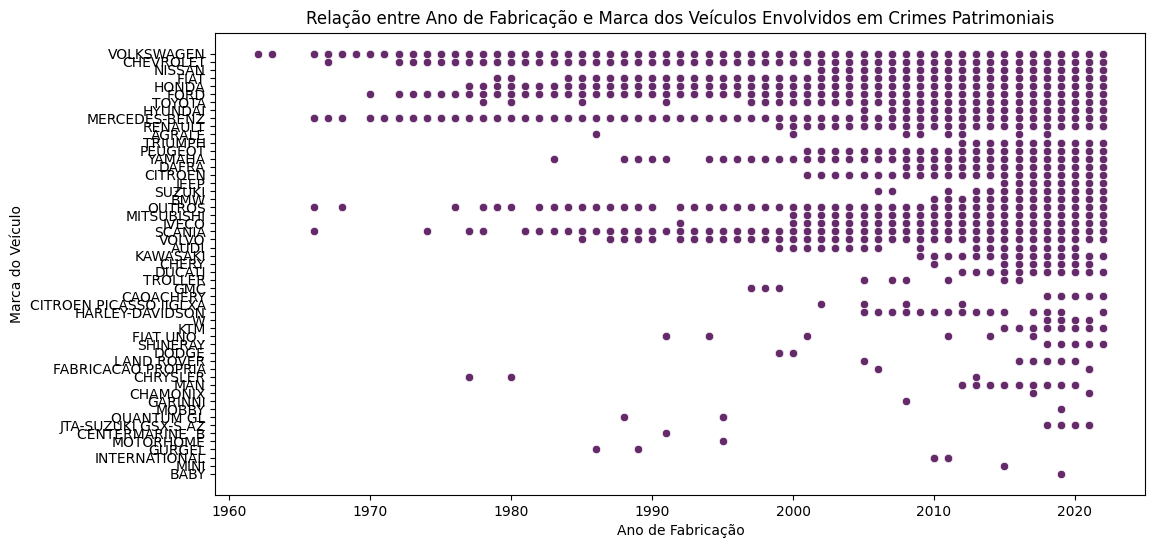

In [ ]:
df_filtrado = df_filtrado[df_filtrado['MARCA_VEICULO'] != 'I']
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtrado, x='ANO_FABRICACAO', y='MARCA_VEICULO')
plt.title('Relação entre Ano de Fabricação e Marca dos Veículos Envolvidos em Crimes Patrimoniais')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Marca do Veículo')
plt.show()

Como a exibição estava muito comprimida, pois haviam muitas marcas sendo exibidas, foi criado outro Scatterplot para mostrar as top 20 marcas de veículos envolvidos nos crimes.

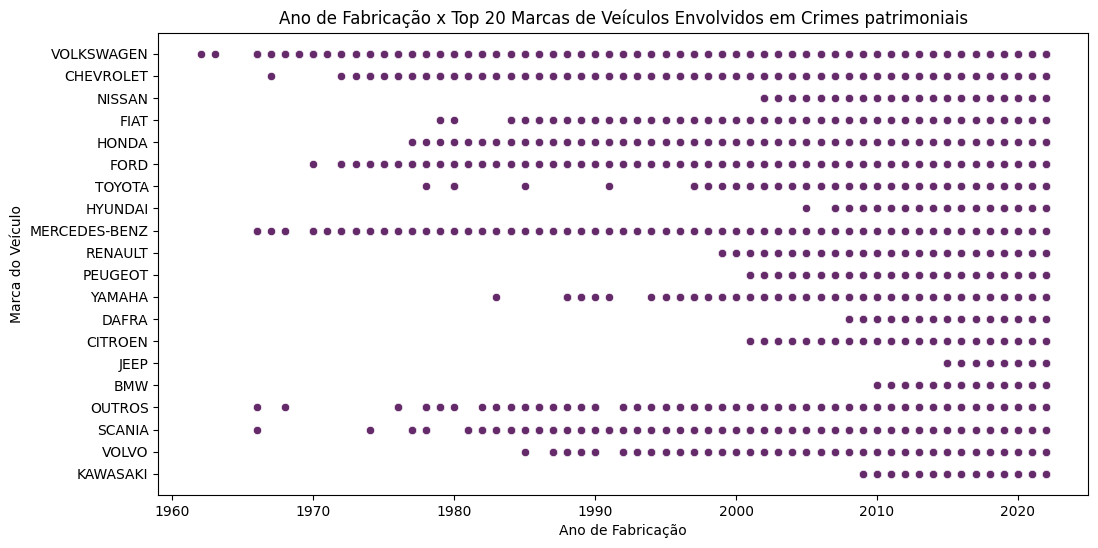

In [ ]:
top20_marcas = df_filtrado['MARCA_VEICULO'].value_counts().head(20).index
df_top20 = df_filtrado[df_filtrado['MARCA_VEICULO'].isin(top20_marcas)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_top20, x='ANO_FABRICACAO', y='MARCA_VEICULO')
plt.title('Ano de Fabricação x Top 20 Marcas de Veículos Envolvidos em Crimes patrimoniais')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Marca do Veículo')
plt.show()

Foi feito também a distribuição dos crimes patrimoniais por marca dos veículos, de forma logarítmica, para uma visualização mais interpretativa.
Além disso, normalmente aquele que possue mais ocorrências ficaria mais em cima, e o que tem menos ficaria embaixo, contudo, para não atrapalhar a visualização da legenda, escolhemos da forma que está representada.

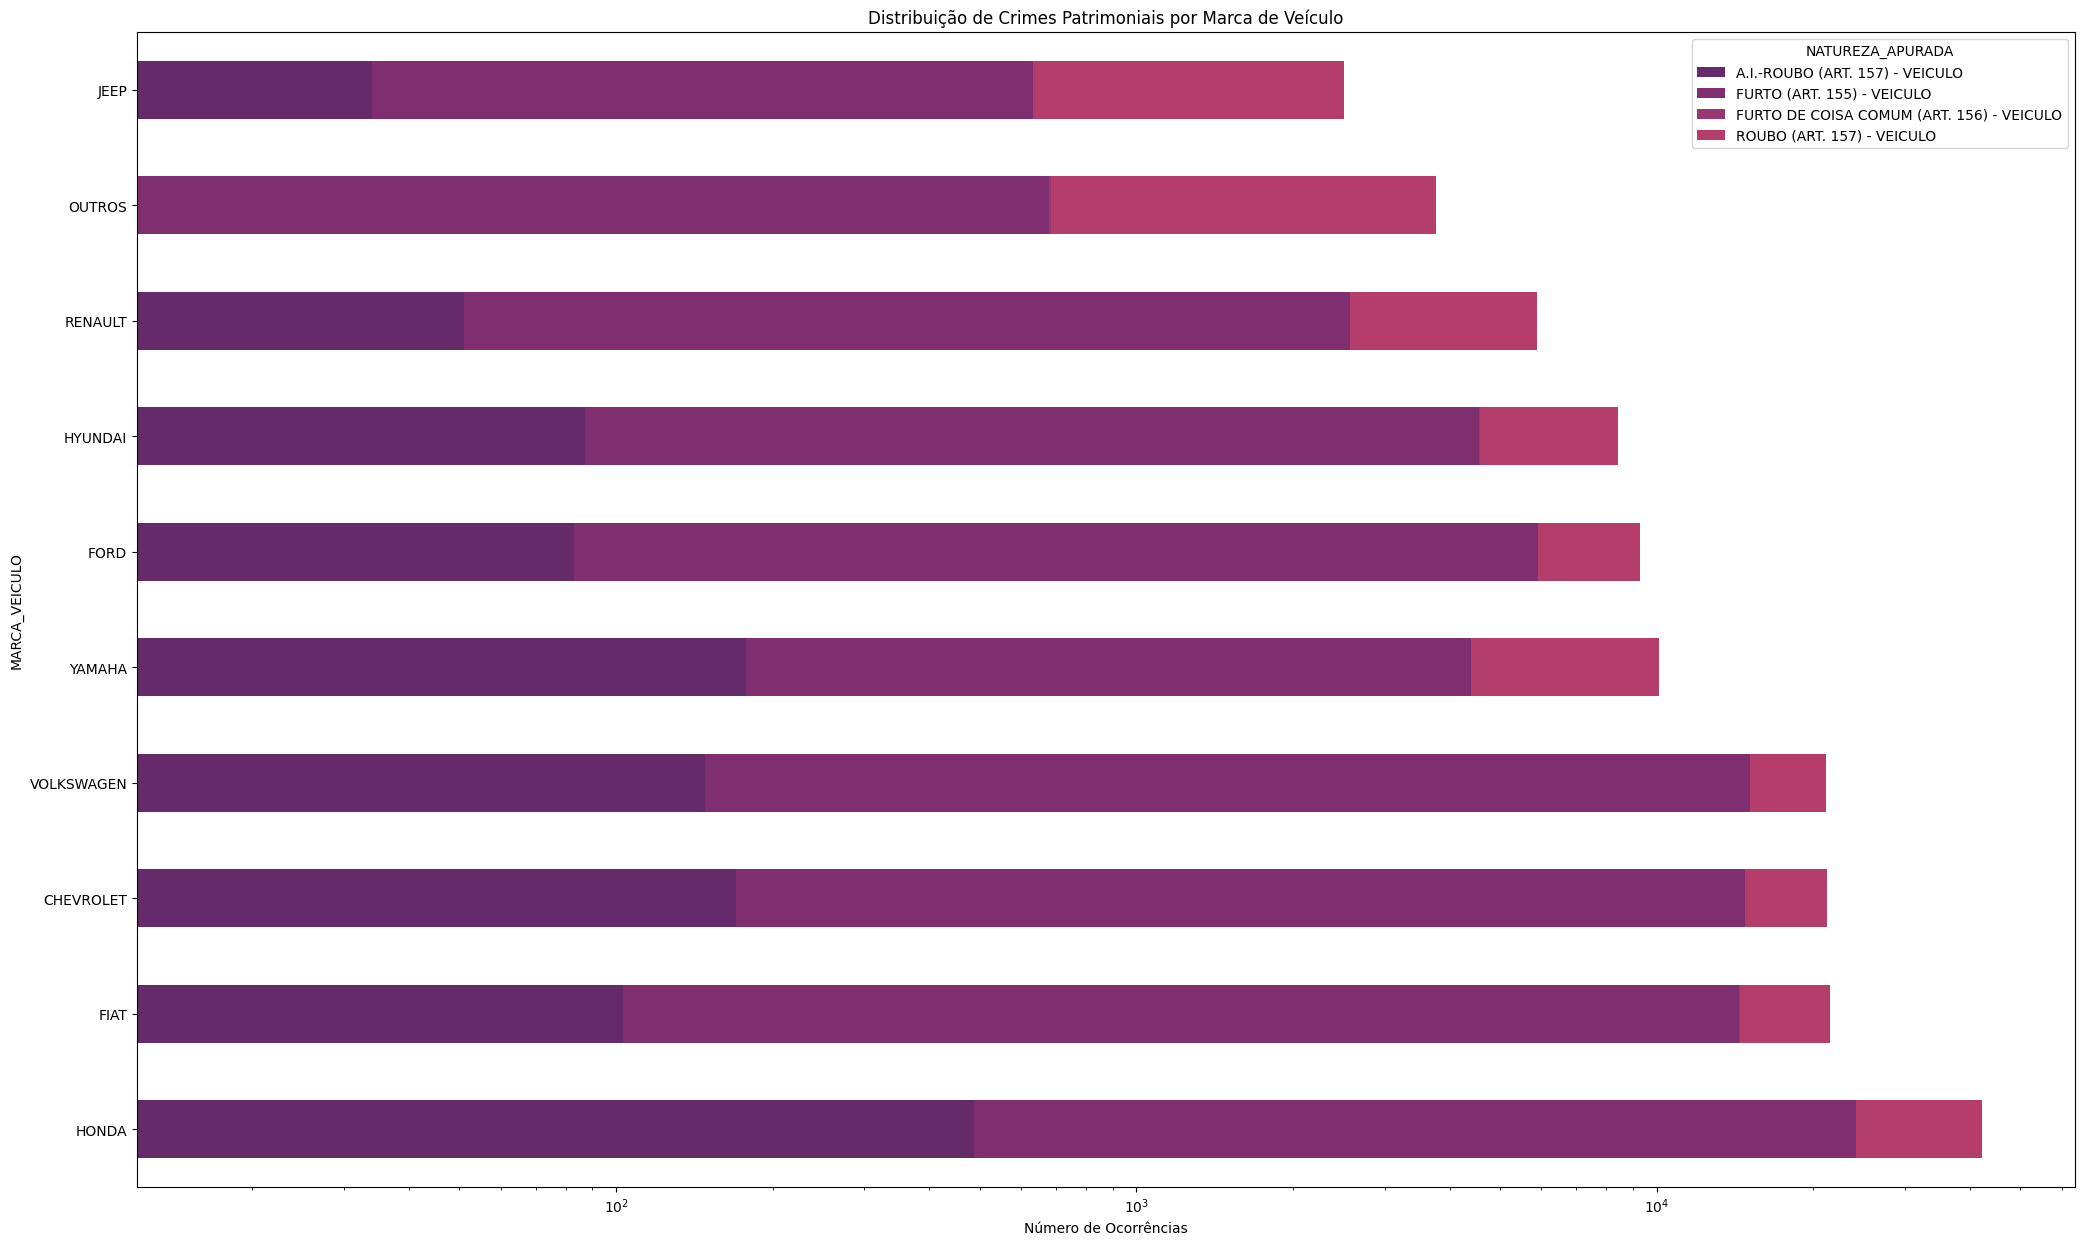

In [ ]:
df_pivot = df_filtrado.pivot_table(index='MARCA_VEICULO', columns='NATUREZA_APURADA', aggfunc='size', fill_value=0)

# Pegando as 10 marcas mais envolvidas
top_marcas = df_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
df_pivot_top = df_pivot.loc[top_marcas]

# Plot
df_pivot_top.plot(kind='barh', stacked=True, figsize=(25,15), color=cores)
plt.title('Distribuição de Crimes Patrimoniais por Marca de Veículo')
plt.xlabel('Número de Ocorrências')
plt.xscale('log')
plt.show()


### Pergunta 4: Quais são os tipos de locais mais comuns para a ocorrência de homicídios e latrocínios? (Aléxia)

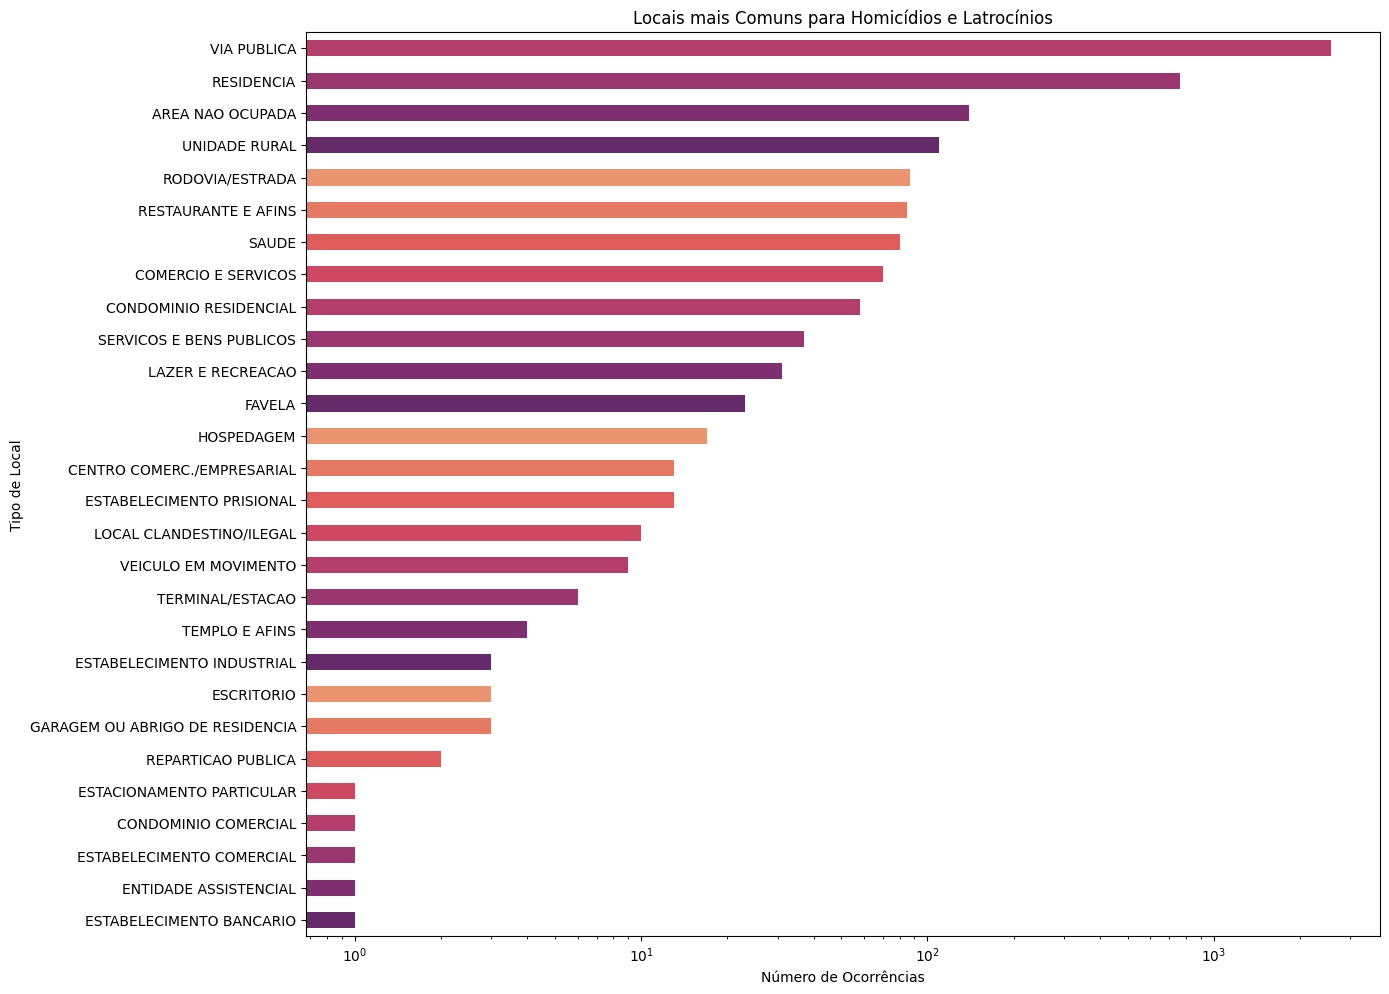

In [ ]:
tipos_de_crime = [
    "HOMICIDIO DOLOSO",
    "HOMICIDIO SIMPLES (ART. 121)",
    "HOMICIDIO QUALIFICADO (ART. 121, §2O.)",
    "HOMICIDIO CULPOSO NA DIRECAO DE VEICULO AUTOMOTOR (ART. 302)",
    "A.I.-HOMICIDIO SIMPLES (ART. 121)",
    "LATROCINIO"
]

# Filtrando os dados para homicídios e latrocínios
df_homicidios_latrocinios = df[df['NATUREZA_APURADA'].isin(tipos_de_crime)]

# Desconsiderar desconhecido
df_homicidios_latrocinios = df_homicidios_latrocinios[df_homicidios_latrocinios['TIPO_LOCAL'] != 'DESCONHECIDO']

# Contando as ocorrências por tipo de local
cont_local = df_homicidios_latrocinios['TIPO_LOCAL'].value_counts()

# Ordenando do menos frequente para o mais frequente
cont_local = cont_local.sort_values(ascending=True)

# Calculando a mediana das contagens
mediana = cont_local.median()

# Criando o gráfico de barras horizontal
cont_local.plot(kind='barh', figsize=(14, 10), color=cores)
plt.title('Locais mais Comuns para Homicídios e Latrocínios')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Local')
plt.tight_layout()
plt.xscale('log')
plt.show()

As barrinhas rosa escuro indicam locais acima da mediana, e as barras rosa claro indicam locais com menos ocorrências(abaixo da mediana)

Os locais que mais ocorrem homicídios/ latrocínios é em locais com maior circulação de pessoas, ou locais mais afastados e também em casa. A violência doméstica atinge milhoes de pessoas no Brasil, então há uma correlação.

Os locais menos frequentes são locais que tem maior controle e fiscalização, muito provavelmente tem seguranças, guardas.

### Pergunta 5: Qual é a distribuição dos periodos do dia (manhã, tarde, noite, madrugada) nas ocorrências? (Lucas)


<Axes: ylabel='PERIODO_OCORRENCIA'>

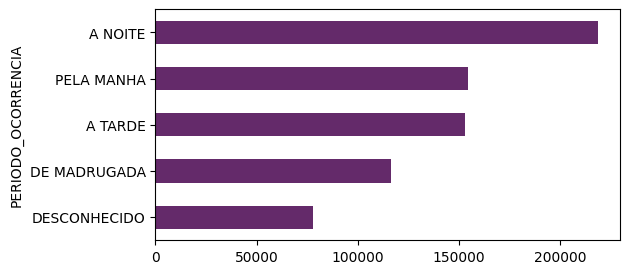

In [ ]:
df.groupby("PERIODO_OCORRENCIA")['PERIODO_OCORRENCIA'].count().sort_values(ascending=True).plot(kind='barh', figsize=(6, 3))

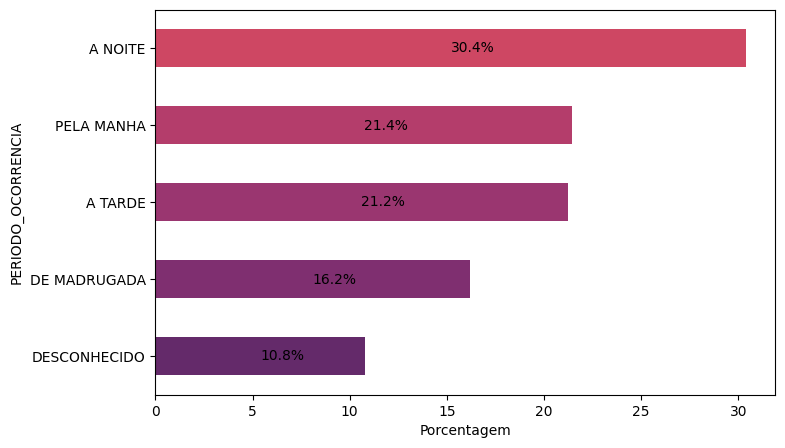

In [ ]:
# Cria um df com os valores normalizados e multiplicados em 100 para obter as porcentagens.
periodos = df['PERIODO_OCORRENCIA'].value_counts(normalize=True) * 100

# Ordenando após o cálculo
periodos_ordenados = periodos.sort_values(ascending=True)

# Criando o gráfico com as porcentagens (agora horizontal)
graf = periodos_ordenados.plot(kind='barh', figsize=(8, 5), color=cores)
graf.set_xlabel("Porcentagem")
graf.set_ylabel("PERIODO_OCORRENCIA")

# Adicionar as legendas com as porcentagens
for p in graf.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    graf.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='left', va='center')

plt.show()


In [ ]:
acidentes_por_PERIODO_OCORRENCIA = df.groupby(['PERIODO_OCORRENCIA']).size().reset_index(name='total')

ordemPeriodoOcorrencia = ['DE MADRUGADA', 'PELA MANHA', 'A TARDE', 'A NOITE', 'DESCONHECIDO']
acidentes_por_PERIODO_OCORRENCIA['PERIODO_OCORRENCIA'] = pd.Categorical(acidentes_por_PERIODO_OCORRENCIA['PERIODO_OCORRENCIA'], categories=ordemPeriodoOcorrencia, ordered=True)
acidentes_por_PERIODO_OCORRENCIA = acidentes_por_PERIODO_OCORRENCIA.sort_values('PERIODO_OCORRENCIA')
acidentes_por_PERIODO_OCORRENCIA

,PERIODO_OCORRENCIA,total
2,DE MADRUGADA,116418
4,PELA MANHA,154189
1,A TARDE,152685
0,A NOITE,218751
3,DESCONHECIDO,77667


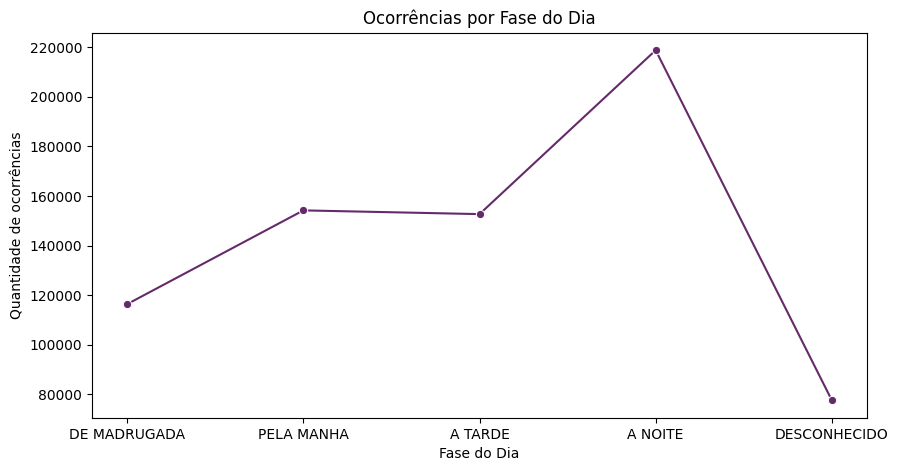

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=acidentes_por_PERIODO_OCORRENCIA, x='PERIODO_OCORRENCIA', y='total', marker='o')

plt.title('Ocorrências por Fase do Dia')
plt.xlabel('Fase do Dia')
plt.ylabel('Quantidade de ocorrências')
plt.show()

Com a ajuda dos gráficos, pudemos perceber que existem menos crimes durante a madrugada, a quantidade de crimes é bem similar de manhã e de tarde, mas a noite ocorre um salto de mais de 60 mil crimes em relação ao período da tarde, mostrando que as noites são claramente mais perigosas que os outros períodos do dia.

### Pergunta 6: Há alguma tendência de aumento ou diminuição nas ocorrências fatais ao longo dos meses? (Aléxia)

A pergunta originalmente era:  Há alguma tendência de aumento ou diminuição nas ocorrências fatais ao longo dos **anos**? Porém a maioria das ocorrências são em 2022, portanto não é possível fazer essa análise. O gráfico a seguir mostra isso:

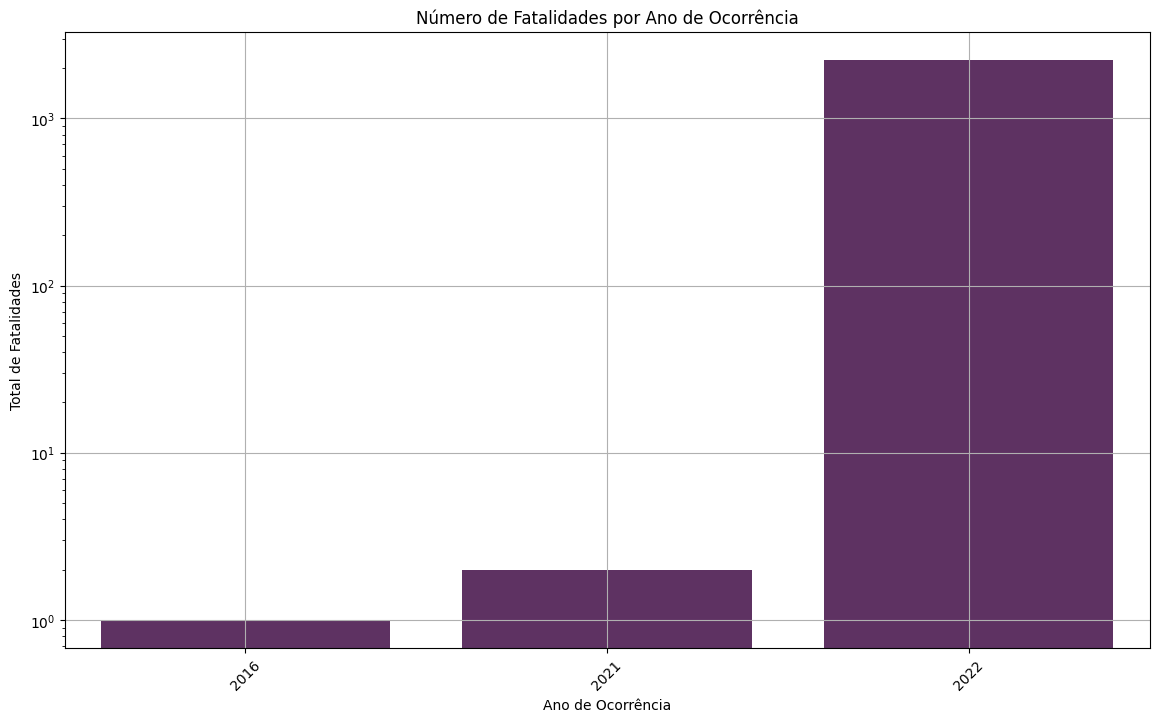

In [ ]:
# Filtrar os dados para remover "DESCONHECIDO" e valores nulos em FLAG_VITIMA_FATAL e DATA_OCORRENCIA
df_filtrado = df[df['FLAG_VITIMA_FATAL'].notna()]  # Remove valores nulos em FLAG_VITIMA_FATAL
df_filtrado = df_filtrado[df_filtrado['FLAG_VITIMA_FATAL'] != 'DESCONHECIDO']  # Remove "DESCONHECIDO" em FLAG_VITIMA_FATAL
df_filtrado = df_filtrado[df_filtrado['DATA_OCORRENCIA'].notna()]  # Remove valores nulos em DATA_OCORRENCIA

# Filtrar para apenas os casos em que FLAG_VITIMA_FATAL é 'SIM'
df_fatal = df_filtrado[df_filtrado['FLAG_VITIMA_FATAL'].str.upper() == 'SIM'].copy()  # Usando .copy() aqui

# Usando loc para adicionar a nova coluna 'Ano' de forma segura
df_fatal.loc[:, 'Ano'] = df_fatal['DATA_OCORRENCIA'].dt.year

# Contar o número de ocorrências fatais por ano
fatalidades_por_ano = df_fatal.groupby('Ano').size().reset_index(name='total_fatais')

# Visualizar a distribuição das fatalidades por ano
plt.figure(figsize=(14, 8))
sns.barplot(data=fatalidades_por_ano, x='Ano', y='total_fatais')
plt.title('Número de Fatalidades por Ano de Ocorrência')
plt.xlabel('Ano de Ocorrência')
plt.ylabel('Total de Fatalidades')
plt.xticks(rotation=45)
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
# Liberando essas variáveis para evitar inconsistências em outras análises
del df_filtrado
del df_fatal

count     12.000000
mean     187.000000
std       70.605176
min       75.000000
25%      138.250000
50%      190.500000
75%      241.250000
max      293.000000
Name: total_fatais, dtype: float64


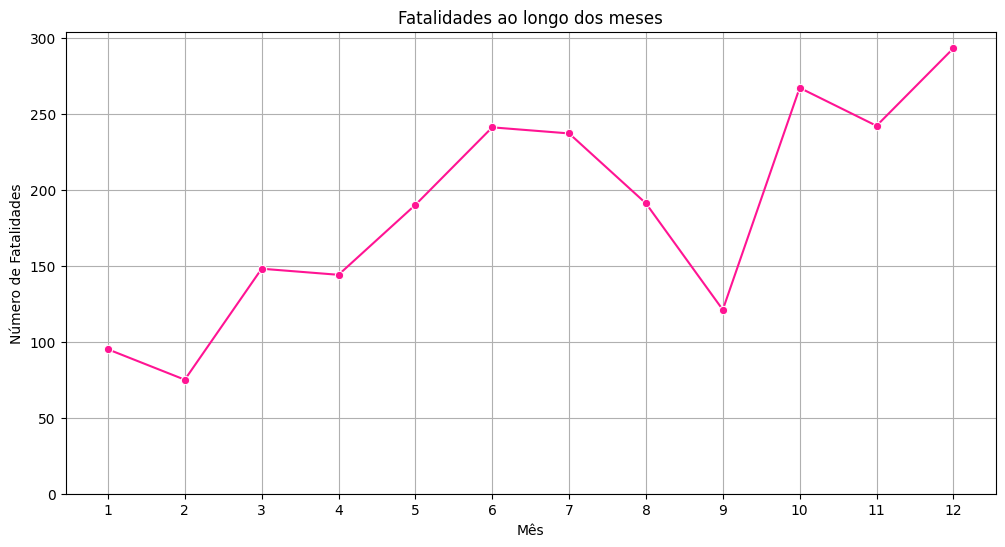

In [ ]:
# Filtrar dados válidos e apenas fatalidades
df_fatal = df[
    (df['FLAG_VITIMA_FATAL'].str.upper() == 'SIM') &
    (df['DATA_OCORRENCIA'].notna())
].copy()

# Extrair o mês
df_fatal['Mes'] = df_fatal['DATA_OCORRENCIA'].dt.month

# Contar fatalidades por mês
fatalidades_por_mes = df_fatal['Mes'].value_counts().sort_index()

# Extraindo o mês da DATA_OCORRENCIA
df_fatal.loc[:, 'Mes'] = df_fatal['DATA_OCORRENCIA'].dt.month
# Agrupando por mês e contando
fatalidades_por_mes = df_fatal.groupby('Mes').size().reset_index(name='total_fatais')
# Usar describe para ver estatísticas descritivas
print(fatalidades_por_mes['total_fatais'].describe())

# Gráfico de linha para ver a tendência ao longo dos meses
plt.figure(figsize=(12, 6))
sns.lineplot(data=fatalidades_por_mes, x='Mes', y='total_fatais', marker='o', color='deeppink')
plt.title('Fatalidades ao longo dos meses')
plt.xlabel('Mês')
plt.ylabel('Número de Fatalidades')
plt.xticks(range(1, 13))  # Para mostrar de 1 a 12
plt.ylim(0)  # Começar o eixo Y em 0
plt.grid(True)
plt.show()

In [ ]:
# Agrupando para contar fatalidades por mês
fatalidades_por_mes = df_fatal.groupby('Mes').size().reset_index(name='total_fatais')

# Calculando a média geral de fatalidades por mês
media_fatalidades = fatalidades_por_mes['total_fatais'].mean()

# Criando uma nova coluna para comparar com a média
fatalidades_por_mes['comparacao_com_media'] = fatalidades_por_mes['total_fatais'].apply(
    lambda x: 'Acima da média' if x > media_fatalidades else ('Abaixo da média' if x < media_fatalidades else 'Igual à média')
)

# Adicionando o nome dos meses (opcional, para ficar mais apresentável)
meses_nome = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
fatalidades_por_mes['Mes_nome'] = fatalidades_por_mes['Mes'].map(meses_nome)

# Reordenando as colunas
fatalidades_por_mes = fatalidades_por_mes[['Mes', 'Mes_nome', 'total_fatais', 'comparacao_com_media']]

# Exibindo a tabela final
print(fatalidades_por_mes)


    Mes   Mes_nome  total_fatais comparacao_com_media
0     1    Janeiro            95      Abaixo da média
1     2  Fevereiro            75      Abaixo da média
2     3      Março           148      Abaixo da média
3     4      Abril           144      Abaixo da média
4     5       Maio           190       Acima da média
5     6      Junho           241       Acima da média
6     7      Julho           237       Acima da média
7     8     Agosto           191       Acima da média
8     9   Setembro           121      Abaixo da média
9    10    Outubro           267       Acima da média
10   11   Novembro           242       Acima da média
11   12   Dezembro           293       Acima da média


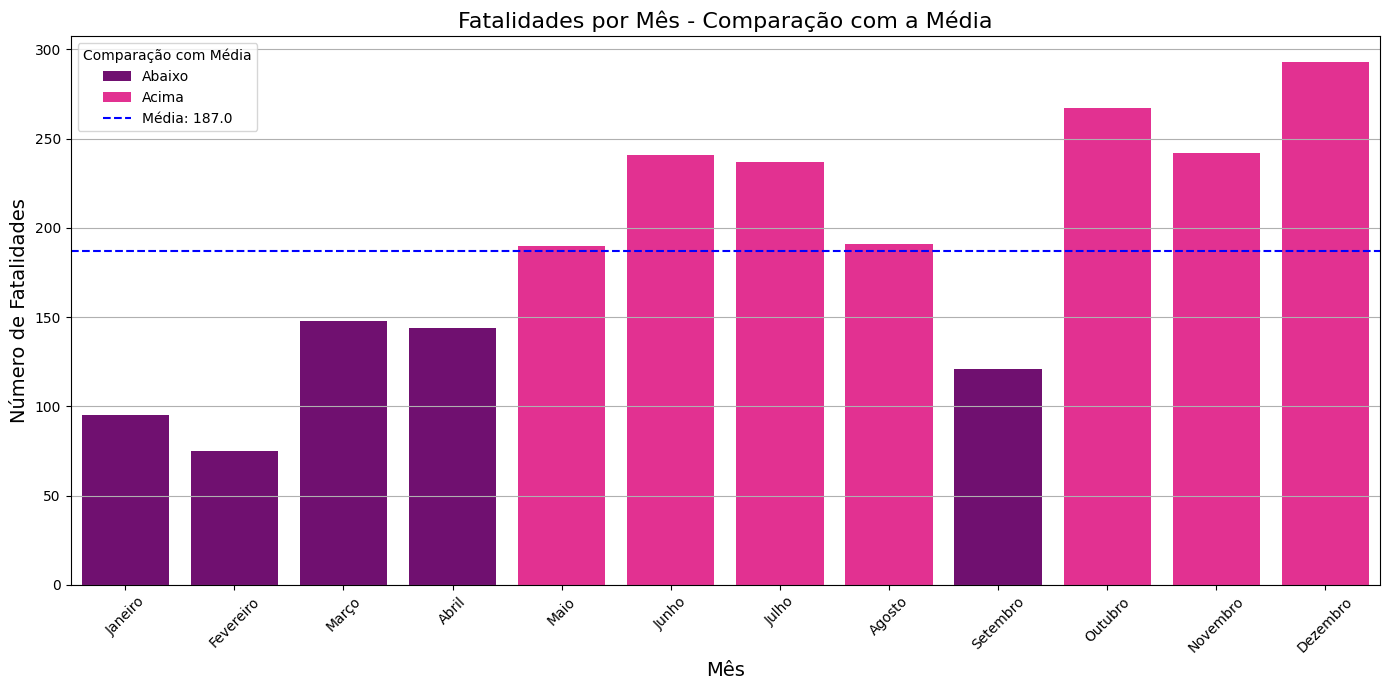

In [ ]:
# Criar uma coluna cor para categorizar
fatalidades_por_mes['cor'] = fatalidades_por_mes['comparacao_com_media'].map({
    'Acima da média': 'Acima',
    'Abaixo da média': 'Abaixo',
    'Igual à média': 'Igual'
})

plt.figure(figsize=(14, 7))
sns.barplot(
    data=fatalidades_por_mes,
    x='Mes_nome',
    y='total_fatais',
    hue='cor',
    palette={'Acima': 'deeppink', 'Abaixo': 'purple', 'Igual': 'gray'},
    dodge=False
)

plt.title('Fatalidades por Mês - Comparação com a Média', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Número de Fatalidades', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Linha da media
media_fatalidades = fatalidades_por_mes['total_fatais'].mean()
plt.axhline(media_fatalidades, color='blue', linestyle='--', label=f'Média: {media_fatalidades:.1f}')

plt.legend(title='Comparação com Média')
plt.tight_layout()
plt.show()

Os meses em que o número de fatalidades está acima da média são: Junho, Julho, Outubro, Novembro e Dezembro. É possível que isso relacionado a fatores como férias, feriados ou condições climáticas que favorecem mais ocorrências, e também o aumento da circulação de pessoas ou datas festivas nessas épocas.

Outubro e novembro é uma época chuvosa no sudeste brasileiro, o que pode favorecer enchentes, alagamentos, acidentes no trânsito e pode possivelmente contribuir para essa maior fatalidade.

Dezembro também caracteriza uma época chuvosa, além de datas festivas que muitas vezes levam ao aumento do consumo de bebidas alcoólica, o que pode influenciar o aumento de fatalidades, considerando crimes como homicídios e/ ou acidentes de trânsito.

In [ ]:
# Liberando essas variáveis para evitar inconsistências em outras análises
del df_fatal
del fatalidades_por_mes

### Pergunta 7: Existe uma faixa etária que apresenta maior probabilidade de fatalidades em determinados tipo de ocorrência?(Daniel)


Criamos a coluna "Categoria de Crime" foi gerada para simplificar a análise, agrupando os crimes da coluna "NATUREZA_APURADA" em categorias mais amplas. Isso foi feito através de uma função que verifica palavras-chave específicas (como "HOMICIDIO", "FURTO", "CORRUPCAO") nas descrições dos crimes. Com base na palavra-chave encontrada, o crime é classificado em categorias como 'Pessoa', 'Patrimonial', 'Administração Pública', entre outras. Caso nenhum termo conhecido seja identificado, o crime é rotulado como 'Não classificado'.

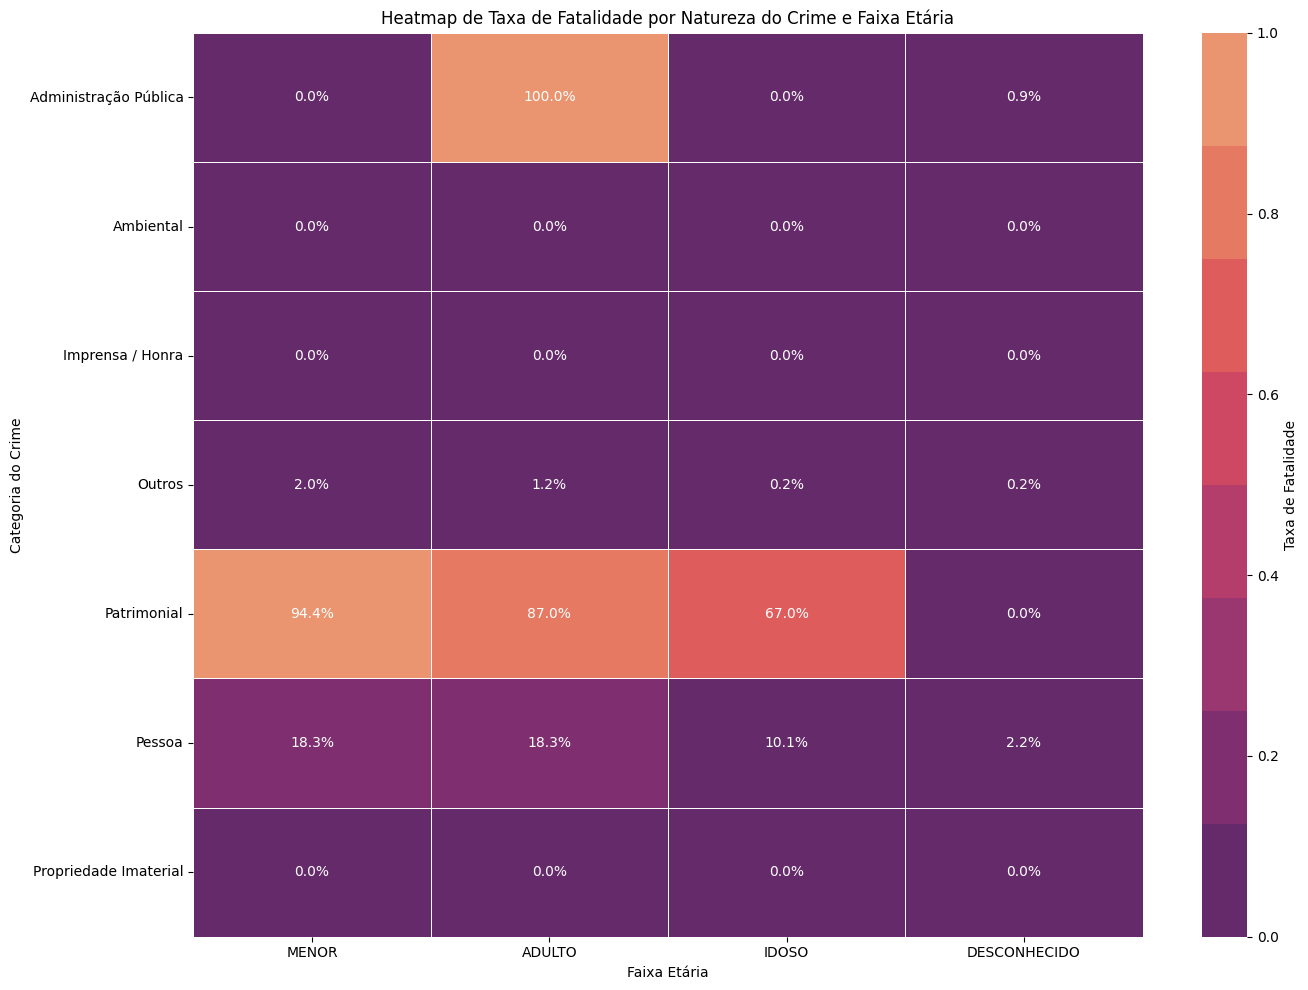

In [ ]:
df_analise = df.copy()

df_analise['fatal'] = df_analise['FLAG_VITIMA_FATAL'].astype(str).str.upper().eq('SIM').astype(int)

fatalidade = (
    df_analise
    .groupby(['FAIXA_ETARIA', 'CATEGORIA_CRIME'])['fatal']
    .agg(total_ocorrencias='count', total_fatais='sum')
    .reset_index()
)

fatalidade['fatal_rate'] = (
    fatalidade['total_fatais'] / fatalidade['total_ocorrencias']
)

heatmap_data = (
    fatalidade
    .pivot(index='CATEGORIA_CRIME', columns='FAIXA_ETARIA', values='fatal_rate')
    .fillna(0)
)

ordem_faixas = ['MENOR', 'ADULTO', 'IDOSO', 'DESCONHECIDO']
colunas_existentes_ordenadas = [f for f in ordem_faixas if f in heatmap_data.columns]
heatmap_data = heatmap_data[colunas_existentes_ordenadas]

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap= cores,
    annot=True,
    fmt=".1%",
    linewidths=.5,
    cbar_kws={'label': 'Taxa de Fatalidade'}
)
plt.title('Heatmap de Taxa de Fatalidade por Natureza do Crime e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Categoria do Crime')
plt.tight_layout()
plt.show()


Com base no heatmap da Taxa de Fatalidade por Natureza do Crime e Faixa Etária que analisamos, podemos resumir as principais conclusões de forma um pouco mais detalhada:

O mapa de calor ilustra claramente como a probabilidade de uma ocorrência criminal resultar em fatalidade varia significativamente dependendo da Natureza do Crime e da Faixa Etária das pessoas envolvidas.

Observa-se que as categorias de crime contra o Patrimônio e contra a Administração Pública exibem as taxas de fatalidade mais elevadas. Dentro dessas categorias, as faixas etárias Adulto e Menor (para crimes Patrimoniais) parecem ser particularmente vulneráveis a desfechos fatais em ocorrências registradas. As taxas de fatalidade podem atingir valores muito altos em combinações específicas, como 100% para Administração Pública envolvendo Adultos, 91.9% para Patrimonial envolvendo Menores e 73.8% para Patrimonial envolvendo Adultos, indicando um risco considerável nestes cenários.

Em contraste, outras categorias de crimes apresentadas no heatmap, como Ambiental, Imprensa/Honra e Propriedade Imaterial, mostram taxas de fatalidade muito baixas ou inexistentes nas faixas etárias consideradas.

Em suma, a análise visual através do heatmap aponta para uma distribuição desigual das fatalidades, com uma concentração de maior risco em crimes violentos ou contra o patrimônio, afetando de maneira mais proeminente as populações adulta e menor em certos contextos.

In [ ]:
# Verificação básica das colunas necessárias
if 'CATEGORIA_CRIME' not in df.columns or 'FAIXA_ETARIA' not in df.columns or 'FLAG_VITIMA_FATAL' not in df.columns:
    print("Erro: Colunas necessárias não encontradas no DataFrame: 'CATEGORIA_CRIME', 'FAIXA_ETARIA' ou 'FLAG_VITIMA_FATAL'.")
else:
    df_fatal_numeric = df.copy()
    df_fatal_numeric['fatal_numeric'] = df_fatal_numeric['FLAG_VITIMA_FATAL'].astype(str).str.upper().eq('SIM').astype(int)

    tabela_resumo = df_fatal_numeric.groupby(['CATEGORIA_CRIME', 'FAIXA_ETARIA']).agg(
        Total_Ocorrencias=('CATEGORIA_CRIME', 'count'),
        Fatalidades=('fatal_numeric', 'sum')
    ).reset_index()

    tabela_resumo['Taxa_Fatalidade (%)'] = (tabela_resumo['Fatalidades'] / tabela_resumo['Total_Ocorrencias']) * 100
    tabela_resumo['Taxa_Fatalidade (%)'] = tabela_resumo['Taxa_Fatalidade (%)'].replace([np.inf, -np.inf], 0).fillna(0)

    categorias_unicas = tabela_resumo['CATEGORIA_CRIME'].unique()
    styled_tables_list = []

    print("--- Tabelas de Ocorrências e Fatalidades por Categoria de Crime e Faixa Etária ---")

    for categoria in categorias_unicas:
        tabela_categoria = tabela_resumo[tabela_resumo['CATEGORIA_CRIME'] == categoria].copy()
        tabela_categoria_exibicao = tabela_categoria[['FAIXA_ETARIA', 'Total_Ocorrencias', 'Fatalidades', 'Taxa_Fatalidade (%)']]

        styled_table = tabela_categoria_exibicao.style \
            .set_caption(f"{categoria}") \
            .format({'Taxa_Fatalidade (%)': '{:.2f}%'})

        styled_tables_list.append(styled_table)

    display(*styled_tables_list)


--- Tabelas de Ocorrências e Fatalidades por Categoria de Crime e Faixa Etária ---


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
0,ADULTO,61,61,100.00%
1,DESCONHECIDO,5034,47,0.93%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
2,DESCONHECIDO,17,0,0.00%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
3,DESCONHECIDO,605,0,0.00%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
4,ADULTO,11770,141,1.20%
5,DESCONHECIDO,30867,52,0.17%
6,IDOSO,10326,22,0.21%
7,MENOR,1151,23,2.00%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
8,ADULTO,1040,905,87.02%
9,DESCONHECIDO,649205,146,0.02%
10,IDOSO,106,71,66.98%
11,MENOR,54,51,94.44%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
12,ADULTO,3034,554,18.26%
13,DESCONHECIDO,6105,132,2.16%
14,IDOSO,168,17,10.12%
15,MENOR,120,22,18.33%


,FAIXA_ETARIA,Total_Ocorrencias,Fatalidades,Taxa_Fatalidade (%)
16,DESCONHECIDO,47,0,0.00%


Estas tabelas detalham as contagens exatas de ocorrências totais e de fatalidades para cada combinação de Categoria de Crime e Faixa Etária. Elas servem como a fonte primária para entender os números por trás do heatmap de taxa de fatalidade, permitindo uma análise mais granular.

**Precisão e Interpretação das Taxas:**

É crucial notar que taxas de fatalidade calculadas a partir de um baixo número total de ocorrências podem não ser representativas do risco geral. Taxas de 100% vistas em grupos com pouquíssimas ocorrências (como 'Administração Pública - ADULTO' com 61 ocorrências e 'Não classificado - ADULTO' com apenas 2) indicam que todas as ocorrências registradas para aquele grupo específico foram fatais neste dataset, mas a pequena amostra limita a generalização desse risco para todos os casos. Taxas baseadas em um grande volume de dados (como 'Patrimonial - IDOSO') são indicadores de risco mais estáveis.

**Principais Observações:**

- Maiores Taxas: As maiores taxas de fatalidade são observadas em 'Administração Pública - ADULTO' (100.00%), 'Não classificado - ADULTO' (100.00%), 'Patrimonial - MENOR' (94.44%) e 'Patrimonial - ADULTO' (87.02%).
- Maiores Números de Fatalidades: Em termos absolutos, os maiores números de fatalidades ocorrem em 'Pessoa - ADULTO' (554 fatalidades), 'Patrimonial - IDOSO' (217 fatalidades, apesar da baixa taxa de 0.03%) e 'Patrimonial - ADULTO' (905 fatalidades).
- Variação por Idade: Dentro de categorias como 'Patrimonial' e 'Pessoa', as taxas de fatalidade variam significativamente entre as faixas etárias, sendo geralmente mais altas para Adultos e Menores em comparação com Idosos.
- Baixas Fatalidades: Categorias como 'Ambiental', 'Imprensa / Honra' e 'Propriedade Imaterial' registraram zero fatalidades nos grupos exibidos nas tabelas, sugerindo um risco muito baixo de óbito associado a esses tipos de crimes neste dataset.
Em resumo, as tabelas fornecem a base quantitativa para o heatmap e destacam que, embora certas combinações de categoria/idade mostrem altas taxas de fatalidade, o volume de ocorrências por trás dessas taxas deve ser considerado para avaliar a robustez da indicação de risco. Crimes Patrimoniais e Contra a Pessoa são notáveis tanto por suas taxas elevadas em certas idades quanto pelo número absoluto de fatalidades.

### Pergunta 8: Qual é o município com mais ocorrências registradas em 2022 em valores absolutos e relativos a população do município?(Daniel)





Primerio vamos usar um CSV por fora para descobrir a população das cidades de São Paulo em 2022, encontramos um banco de dados que contem a estimativa da população em SP em https://repositorio.seade.gov.br/dataset/populacao-residente-estado-de-sao-paulo

In [ ]:
df_populacao = pd.read_csv("/content/drive/MyDrive/estimativa_pop_indicadores_virgulas.csv", delimiter=",")

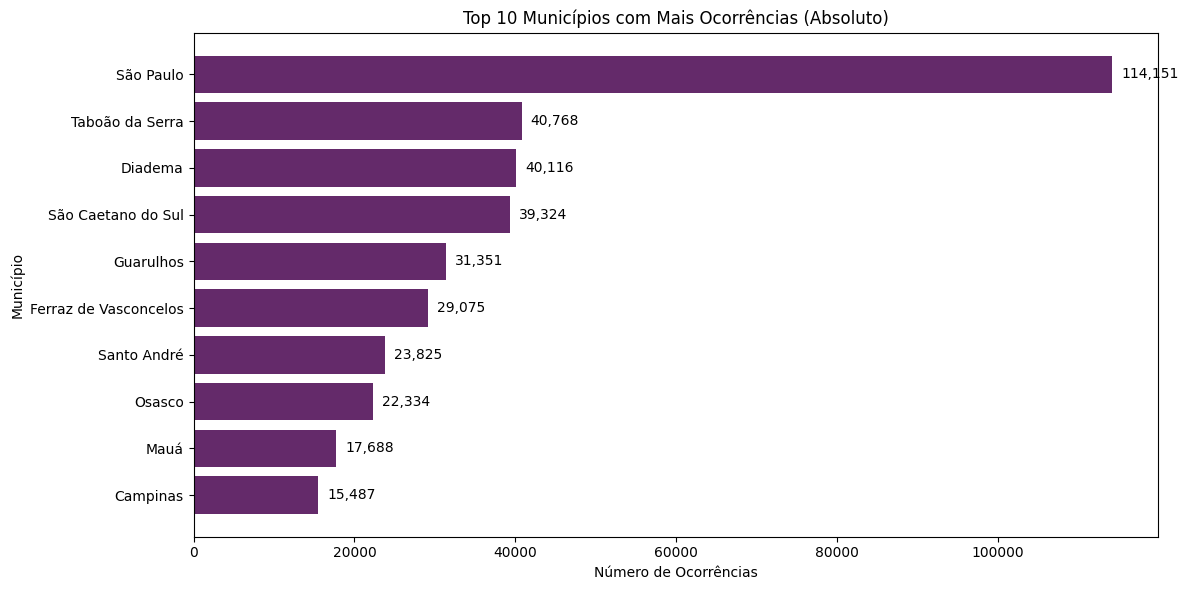

In [ ]:
# Verificando se a coluna 'NOME_CIDADE' existe no DataFrame principal
if 'NOME_CIDADE' not in df.columns:
    print("Erro: Coluna 'NOME_CIDADE' não encontrada no DataFrame 'df'. Certifique-se de que o pré-processamento foi feito.")
else:
    # Contar ocorrências por nome de cidade
    contagem_crimes_por_municipio = df['NOME_CIDADE'].value_counts().reset_index()
    contagem_crimes_por_municipio.columns = ['municipio', 'total_ocorrencias']
    contagem_crimes_por_municipio = contagem_crimes_por_municipio[contagem_crimes_por_municipio['municipio'] != 'DESCONHECIDO']

    # Identificar município com mais ocorrências absolutas
    municipio_mais_ocorrencias_absolutas = contagem_crimes_por_municipio.iloc[0]

    # Visualizar os Top 10 municípios por contagem absoluta
    top_10_absoluto = contagem_crimes_por_municipio.head(10).sort_values(by='total_ocorrencias')

    plt.figure(figsize=(12, 6))
    bars_abs = plt.barh(top_10_absoluto['municipio'], top_10_absoluto['total_ocorrencias'])
    plt.xlabel('Número de Ocorrências')
    plt.ylabel('Município')
    plt.title('Top 10 Municípios com Mais Ocorrências (Absoluto)')

    # Adicionar rótulos de valor nas barras
    for bar in bars_abs:
        width = bar.get_width()
        plt.text(width + max(top_10_absoluto['total_ocorrencias']) * 0.01, bar.get_y() + bar.get_height()/2,
                 f'{int(width):,}', va='center', ha='left')

    plt.tight_layout()
    plt.show()

Este trecho analisamos a contagem total de ocorrências criminais para cada município no dataset de 2022. O código identifica automaticamente o município com o maior número absoluto de registros.

O gráfico de barras horizontais "Top 10 Municípios com Mais Ocorrências (Absoluto)" visualiza os 10 municípios com as maiores contagens. Ele permite ver rapidamente quais localidades tiveram o maior volume de ocorrências registradas, com o município no topo da lista sendo aquele com o maior número total de crimes neste período, sem considerar o tamanho de sua população.

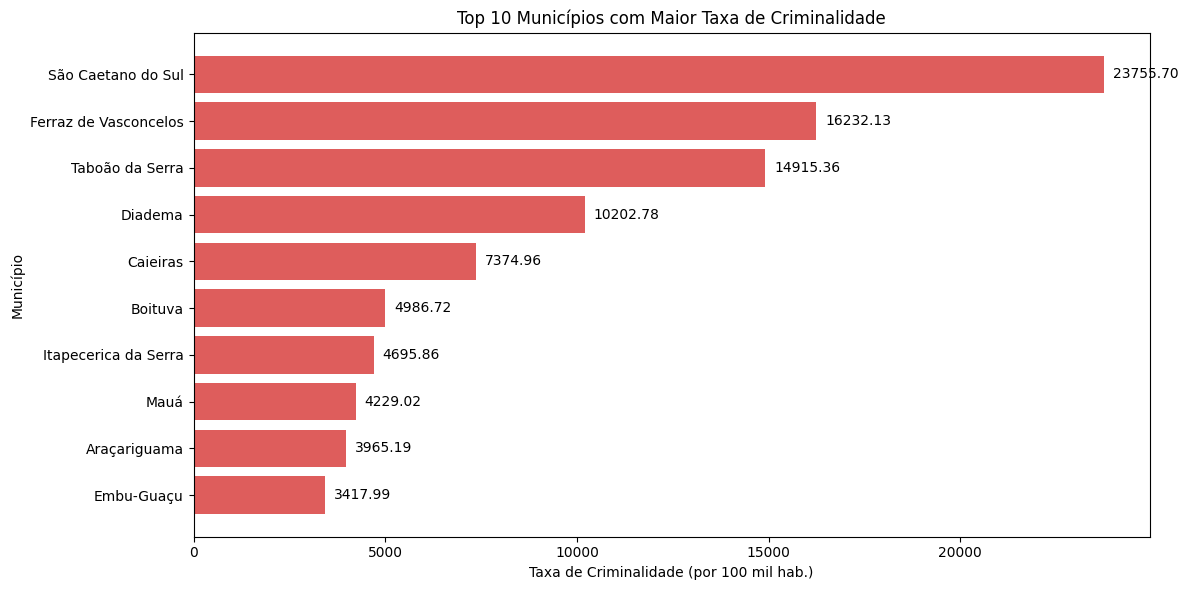

In [ ]:
df_populacao_2022 = df_populacao[df_populacao['ano'] == 2022].copy()

# Selecionar e renomear colunas essenciais ('nome_mun' e 'populacao')
# O código falhará se estas colunas não existirem
df_populacao_2022 = df_populacao_2022[['nome_mun', 'populacao']]
df_populacao_2022.columns = ['municipio', 'populacao']

# Calcular e analisar a taxa de criminalidade
# Assume que contagem_crimes_por_municipio do passo anterior está disponível

# Mesclar contagem de crimes com dados de população
# Usa left merge para manter todos os municípios do df de crimes
df_crimes_populacao = pd.merge(
    contagem_crimes_por_municipio,
    df_populacao_2022,
    on='municipio',
    how='left'
)

# Calcular a taxa de criminalidade por 100.000 habitantes
# Lida com população zero ou nula, resultando em taxa 0
df_crimes_populacao['crime_rate_per_100k'] = df_crimes_populacao.apply(
    lambda row: (row['total_ocorrencias'] / row['populacao']) * 100000 if pd.notna(row['populacao']) and row['populacao'] > 0 else 0,
    axis=1
)

# Filtrar municípios com população válida para o ranking da taxa
# Exclui municípios sem população conhecida
df_crimes_populacao_valid = df_crimes_populacao[
     df_crimes_populacao['populacao'].notna() & (df_crimes_populacao['populacao'] > 0)
].copy().reset_index(drop=True)


# Classificar por taxa de criminalidade em ordem decrescente e encontrar o município com a maior taxa
# O código falhará se df_crimes_populacao_valid estiver vazio
municipio_maior_taxa_criminalidade = df_crimes_populacao_valid.sort_values(
    by='crime_rate_per_100k',
    ascending=False
).iloc[0]

# --- Visualização dos Top 10 Municípios por Taxa ---
# O código falhará se df_crimes_populacao_valid tiver menos de 10 linhas
top_10_rate = df_crimes_populacao_valid.sort_values(by='crime_rate_per_100k', ascending=False).head(10).sort_values(by='crime_rate_per_100k')

plt.figure(figsize=(12, 6))
bars_rate = plt.barh(top_10_rate['municipio'], top_10_rate['crime_rate_per_100k'], color=cores[5])
plt.xlabel('Taxa de Criminalidade (por 100 mil hab.)')
plt.ylabel('Município')
plt.title('Top 10 Municípios com Maior Taxa de Criminalidade')
# Adicionar rótulos de valor nas barras
for bar in bars_rate:
    width = bar.get_width()
    plt.text(width + max(top_10_rate['crime_rate_per_100k']) * 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', ha='left')
plt.tight_layout()
plt.show()

Fizemos um analise da taxa de criminalidade por 100 mil habitantes complementa a contagem absoluta, oferecendo uma visão mais justa da incidência criminal ao considerar o tamanho da população de cada município. Esta abordagem permite comparar a segurança pública entre localidades de diferentes portes de forma mais precisa.

O código realiza o cálculo dessa taxa combinando os dados de ocorrências com informações populacionais. O gráfico gerado, "Top 10 Municípios com Maior Taxa de Criminalidade", visualiza os municípios classificados por essa métrica.

A interpretação do gráfico destaca onde o crime é mais prevalente por habitante. O município no topo da lista é aquele que registrou a maior taxa de crimes proporcionalmente à sua população, o que pode apresentar um cenário de risco diferente daquele mostrado pela simples contagem total de ocorrências.

### Pergunta 9: Qual é o bairro e logradouro com mais ocorrências registradas em 2022 em valores absolutos? (Ana)

Para utilizar o método describe(), é necessário remover os dados desconhecidos da análise, considerando que a aparição de "DESCONHECIDO" era a mais frequente.

In [ ]:
df_sem_nulos = df[df['LOGRADOURO'] != "DESCONHECIDO"]
df_sem_nulos['LOGRADOURO'].describe()

,LOGRADOURO
count,666239
unique,76799
top,AVENIDA PAULISTA
freq,5206


Para essa análise, foi considerada a coluna "LOGRADOURO". Como existem muitas ruas distintas registradas, e muitas delas possuem um número muito baixo ou dados desconhecidos, optou-se por filtrar apenas os 10 logradouros com o maior número de registros para tornar a análise mais objetiva.

In [ ]:
# Contar os logradouros mais frequentes
top_logradouros = df_sem_nulos['LOGRADOURO'].value_counts().head(10)

# Criar tabela com os resultados
tabela_logradouros = pd.DataFrame({
    'Logradouro': top_logradouros.index,
    'Número de Ocorrências': top_logradouros.values
})

# Estilizar a tabela para exibição
styled_table = (
    tabela_logradouros.style
    .set_caption("Top 10 ruas com maior número crimes em SP (2022)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '16px'),
             ('font-weight', 'bold'),
             ('color', 'white'),
             ('padding', '8px')
         ]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
    ])
    .set_properties(**{
        'font-family': 'Arial',
        'font-size': '14px'
    })
    # Alinhar a primeira coluna (Logradouro) à esquerda
    .set_properties(subset=['Logradouro'], **{'text-align': 'left'})
    # Alinhar a segunda coluna (Número de Ocorrências) à direita
    .set_properties(subset=['Número de Ocorrências'], **{'text-align': 'right'})
)
styled_table


,Logradouro,Número de Ocorrências
0,AVENIDA PAULISTA,5206
1,AVENIDA DO ESTADO,3179
2,AVENIDA CRUZEIRO DO SUL,2834
3,RUA DOS LAVRADORES,2525
4,RUA AUGUSTA,2192
5,PRACA DA REPUBLICA,1871
6,PRACA DA LUZ,1639
7,RUA DA CONSOLACAO,1618
8,AVENIDA BRIGADEIRO FARIA LIMA,1515
9,AVENIDA PRESIDENTE CASTELO BRANCO,1449


A Avenida Paulista lidera o ranking, com 5.130 ocorrências, sendo de longe o logradouro com maior volume de registros. Isso pode ser atribuído à sua localização central, grande fluxo de pessoas e intensa atividade comercial e cultural.

In [ ]:
df_sem_nulos = df[df['BAIRRO'] != "DESCONHECIDO"]
df_sem_nulos['BAIRRO'].describe()

,BAIRRO
count,680623
unique,15622
top,CENTRO
freq,37794


Assim como nos logradouros, também foram selecionados os 10 bairros com maior número de ocorrências para uma visualização mais clara.

In [ ]:
# Contar os logradouros mais frequentes
top_bairros = df_sem_nulos['BAIRRO'].value_counts().head(10)

# Criar tabela com os resultados
tabela_bairros = pd.DataFrame({
    'Bairro': top_bairros.index,
    'Número de Ocorrências': top_bairros.values
})

# Estilizar a tabela para exibição
styled_table = (
    tabela_bairros.style
    .set_caption("Top 10 bairros com maior número crimes em SP (2022)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '16px'),
             ('font-weight', 'bold'),
             ('color', 'white'),
             ('padding', '8px')
         ]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
    ])
    .set_properties(**{
        'font-family': 'Arial',
        'font-size': '14px'
    })
    # Alinhar a primeira coluna (Bairro) à esquerda
    .set_properties(subset=['Bairro'], **{'text-align': 'left'})
    # Alinhar a segunda coluna (Número de Ocorrências) à direita
    .set_properties(subset=['Número de Ocorrências'], **{'text-align': 'right'})
)
styled_table


,Bairro,Número de Ocorrências
0,CENTRO,37794
1,REPUBLICA,10240
2,BELA VISTA,7369
3,RURAL,7117
4,CONSOLACAO,7110
5,BRAS,6152
6,PINHEIROS,6104
7,SE,5985
8,TATUAPE,5508
9,VILA MARIANA,5432


O Centro lidera com ampla vantagem, totalizando 29.008 ocorrências, o que indica uma alta densidade criminal na região central da cidade. Esse número expressivo pode ser explicado pela concentração de serviços, transporte público, comércio e população flutuante intensa, fatores que geralmente contribuem para a ocorrência de diversos tipos de crimes.

### Pergunta 10: Quais foram os anos em que ocorreram mais crimes que só foram registrados em 2022? Desconsiderando os crimes efetivamente cometidos em 2022 (Ana)

Se desconsiderarmos os valores do ano de 2022, podemos observar com mais clareza quais crimes ocorreram antes desse ano (em escala logarítmica), mas que só foram registrados em 2022.

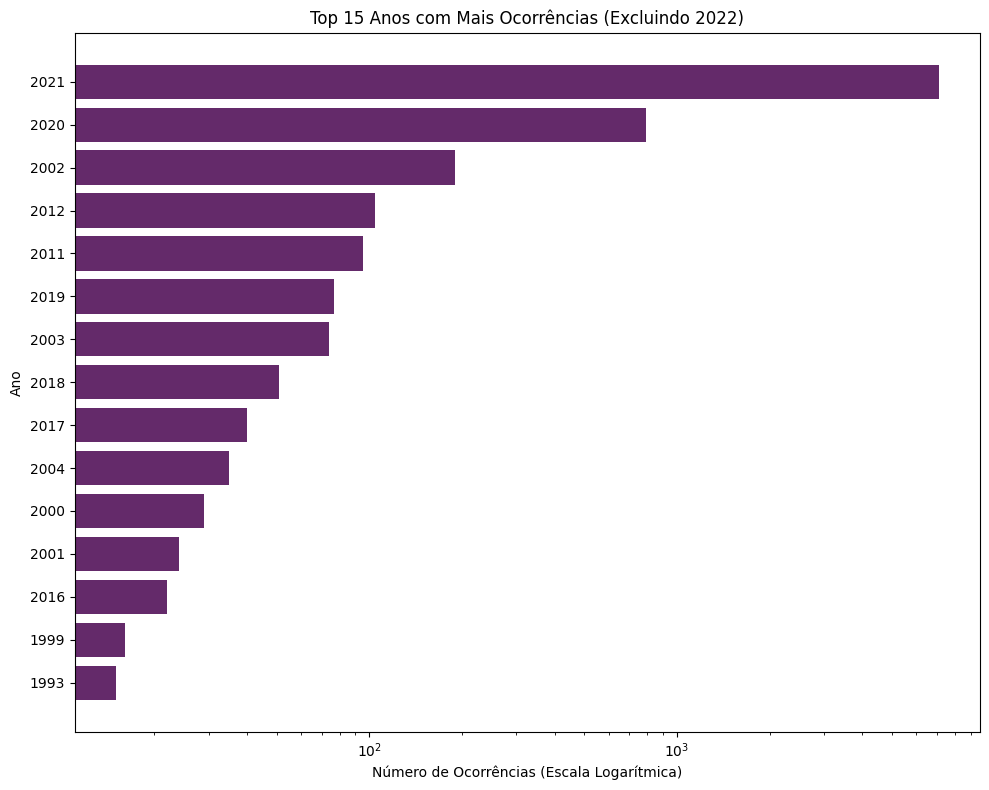

In [ ]:
# Criar uma cópia do DataFrame original
df_sem_2022 = df.copy()

# Extrair o ano da coluna de data
df_sem_2022['Ano'] = df_sem_2022['DATA_OCORRENCIA'].dt.year

# Filtrar os dados para excluir o ano de 2022
df_sem_2022 = df_sem_2022[df_sem_2022['Ano'] != 2022]

# Contar o número de ocorrências por ano
contagem_anos = df_sem_2022['Ano'].value_counts()

# Selecionar os 15 anos com mais ocorrências e ordenar do menor para o maior valor
top_15 = contagem_anos.nlargest(15).sort_values()

# Criar o gráfico de barras horizontal com escala logarítmica
plt.figure(figsize=(10, 8))
plt.barh(top_15.index.astype(str), top_15.values)
plt.xscale('log')  # Aplicando escala logarítmica no eixo X
plt.xlabel('Número de Ocorrências (Escala Logarítmica)')
plt.ylabel('Ano')
plt.title('Top 15 Anos com Mais Ocorrências (Excluindo 2022)')
plt.tight_layout()
plt.show()


### Pegunta 11: Quais foram os meses nos quais mais houveram ocorrências registradas em 2022? (Ana)

In [ ]:
df["DATA_OCORRENCIA"].dt.month.describe()

,DATA_OCORRENCIA
count,719710.000000
mean,6.730840
std,3.464101
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,12.000000


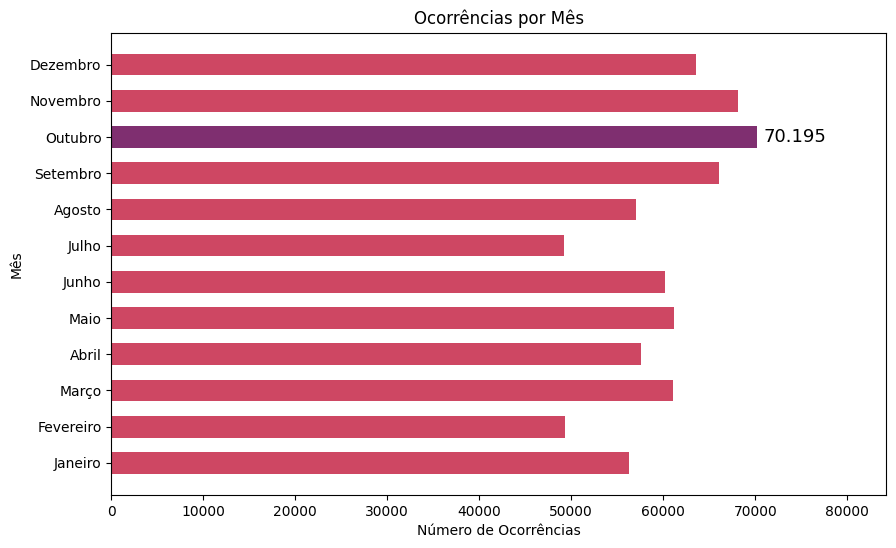

In [ ]:
df_meses = df.copy()

# Extrair o mês da coluna de data
df_meses['Mes'] = df['DATA_OCORRENCIA'].dt.month

# Contar o número de ocorrências por mês
contagem_meses = df_meses['Mes'].value_counts().sort_index()

# Mapear números dos meses para nomes
nomes_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
contagem_meses.index = contagem_meses.index.map(nomes_meses)
mes_mais_ocorrencias = contagem_meses.idxmax()
valor_maximo = contagem_meses.max()

cores_barras = [cores[1] if valor == valor_maximo else cores[4] for valor in contagem_meses.values]
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_meses.index, contagem_meses.values, color=cores_barras, height=0.6)
plt.xlim(0, valor_maximo * 1.2)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Mês')
plt.title('Ocorrências por Mês')

# Adicionar valor na barra com maior ocorrência
for bar in bars:
    width = bar.get_width()
    if width == valor_maximo:
        plt.text(width + valor_maximo * 0.01,
                 bar.get_y() + bar.get_height() / 2,
                 f'{int(width):,}'.replace(',', '.'),
                 va='center', ha='left', fontsize=13)

plt.show()

O gráfico mostra o número de ocorrências registradas mês a mês. A partir dele, dá para ver que outubro foi o mês com mais ocorrências registradas em 2022, com aproximadamente 48.752 casos. Novembro e dezembro também tiveram números altos, ficando logo atrás de outubro.
No geral, o segundo semestre (de julho a dezembro) concentra a maioria dos meses com números mais elevados de ocorrências. Já meses como julho e fevereiro aparecem com quantidades menores em comparação.

### Pergunta 12: Quais foram os dias da semana nos quais mais houveram ocorrências registradas em 2022? (Ana)

Será utilizado o describe() no atributo que foi criado pelo grupo que é referente ao dia da semana em que ocorreu o crime.

In [ ]:
df["DIA_OCORRENCIA"].describe()

,DIA_OCORRENCIA
count,719710
unique,7
top,QUARTA-FEIRA
freq,107152


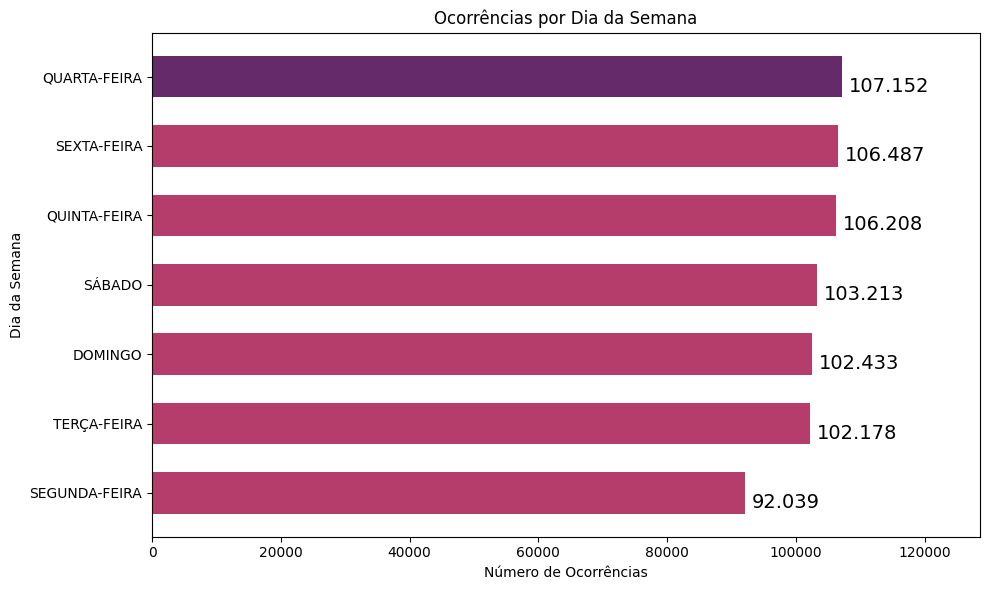

In [ ]:
# Contar ocorrências por dia da semana
contagem_dias = df['DIA_OCORRENCIA'].value_counts()

# Ordenar do menor para o maior
contagem_dias = contagem_dias.sort_values()

# Obter o dia com maior número de ocorrências
dia_top = contagem_dias.idxmax()
cores_set = [cores[3] if dia != dia_top else cores[0] for dia in contagem_dias.index]

# Criar gráfico horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(contagem_dias.index, contagem_dias.values, color=cores_set, height=0.6)
plt.xlim(0, max(contagem_dias.values) * 1.2)
plt.xlabel('Número de Ocorrências')
plt.ylabel('Dia da Semana')
plt.title('Ocorrências por Dia da Semana')

# Adicionar rótulos ao lado de cada barra
for bar in bars:
    largura = bar.get_width()
    plt.text(largura + max(contagem_dias.values) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{int(largura):,}'.replace(',', '.'),
             va='top', ha='left', fontsize=14)

plt.tight_layout()
plt.show()

O gráfico mostra a quantidade de ocorrências registradas em cada dia da semana. Nele, dá para perceber que sexta-feira foi o dia com o maior número de registros em 2022, com cerca de 74.310 ocorrências. Sábado, quinta-feira e quarta-feira vêm logo em seguida, também com números bem próximos de sexta-feira.
A segunda-feira teve o menor número de ocorrências registradas, ficando abaixo dos demais dias. Portanto, os dias com mais ocorrências foram ***sexta-feira, sábado, quinta-feira e quarta-feira.***

### Pergunta 13: Quais foram os horários nos quais mais houveram ocorrências registradas em 2022? (Ana)

In [ ]:
df['HORA_OCORRENCIA'].describe()

,HORA_OCORRENCIA
count,562447
unique,1441
top,20:00:00
freq,11756


Como o formato dos dados não estão muito legíveis, será criado uma cópia do df nos quais eles passam do formato 00:00:00 para 00h00min para maior clareza, que será utilizado para a visualização dos dados.

In [ ]:
# Copiando as colunas relevantes
df_horas = df[['HORA_OCORRENCIA', 'DIA_OCORRENCIA']].copy()

# Remove milissegundos se existirem e converte para datetime, depois formata para '20h00min'
df_horas['HORA_OCORRENCIA'] = pd.to_datetime(
    df_horas['HORA_OCORRENCIA'].astype(str).str.slice(0, 8), format='%H:%M:%S'
).dt.strftime('%Hh%Mmin')


Como a variedade de horários é muito grande, a visualização será feita em cima dos 10 horários nos quais mais aconteceram ocorrências.

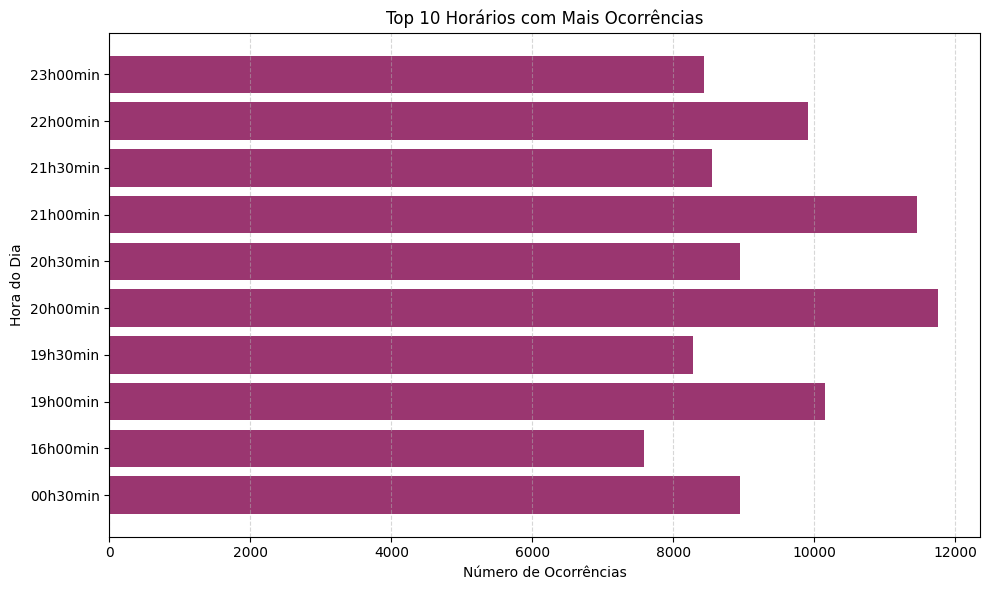

In [ ]:
contagem_top10 = df_horas['HORA_OCORRENCIA'].value_counts().nlargest(10).sort_index()

plt.figure(figsize=(10, 6))
plt.barh(contagem_top10.index, contagem_top10.values, color=cores[2])
plt.ylabel('Hora do Dia')
plt.xlabel('Número de Ocorrências')
plt.title('Top 10 Horários com Mais Ocorrências')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

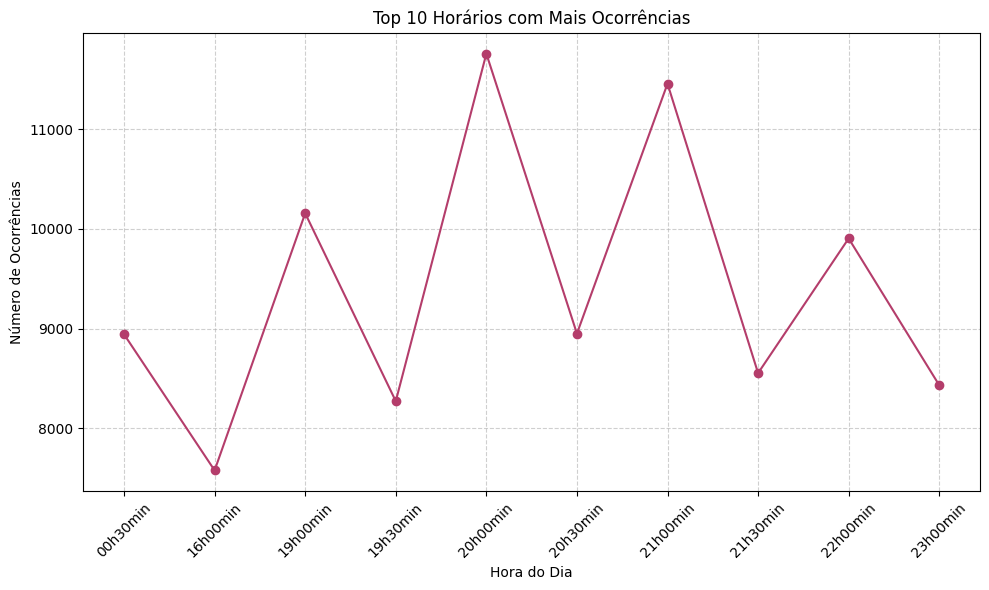

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(contagem_top10.index, contagem_top10.values, marker='o', linestyle='-', color= cores[3])
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Ocorrências')
plt.title('Top 10 Horários com Mais Ocorrências')
plt.xticks(rotation=45)  # Rotaciona os horários no eixo X para melhor visualização
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

 No gráfico de linha com marcadores, observamos que os horários com mais registros concentram-se principalmente no início da noite, com destaque para **20h00min, 21h00min**, que apresentam os maiores picos de ocorrência.

  Essa visualização mostra uma tendência ascendente a partir do início da noite, seguida por uma leve queda após as 23h00min, o que pode indicar que esses eventos estão fortemente ligados à *rotina* noturna da população.

### Pergunta 14: Quais são os dias da semana e horários específicos com maior número de ocorrências? (Ana)

Como o formato dos dados não estão muito legíveis, nessa seção também será criado uma cópia do df nos quais eles passam do formato 00:00:00 para 00h00min para maior clareza, que será utilizado para a visualização dos dados.

In [ ]:
# Copiando as colunas relevantes
df_horas = df[['HORA_OCORRENCIA', 'DIA_OCORRENCIA']].copy()

# Remove milissegundos se existirem e converte para datetime, depois formata para '20h00min'
df_horas['HORA_OCORRENCIA'] = pd.to_datetime(
    df_horas['HORA_OCORRENCIA'].astype(str).str.slice(0, 8), format='%H:%M:%S'
).dt.strftime('%Hh%Mmin')


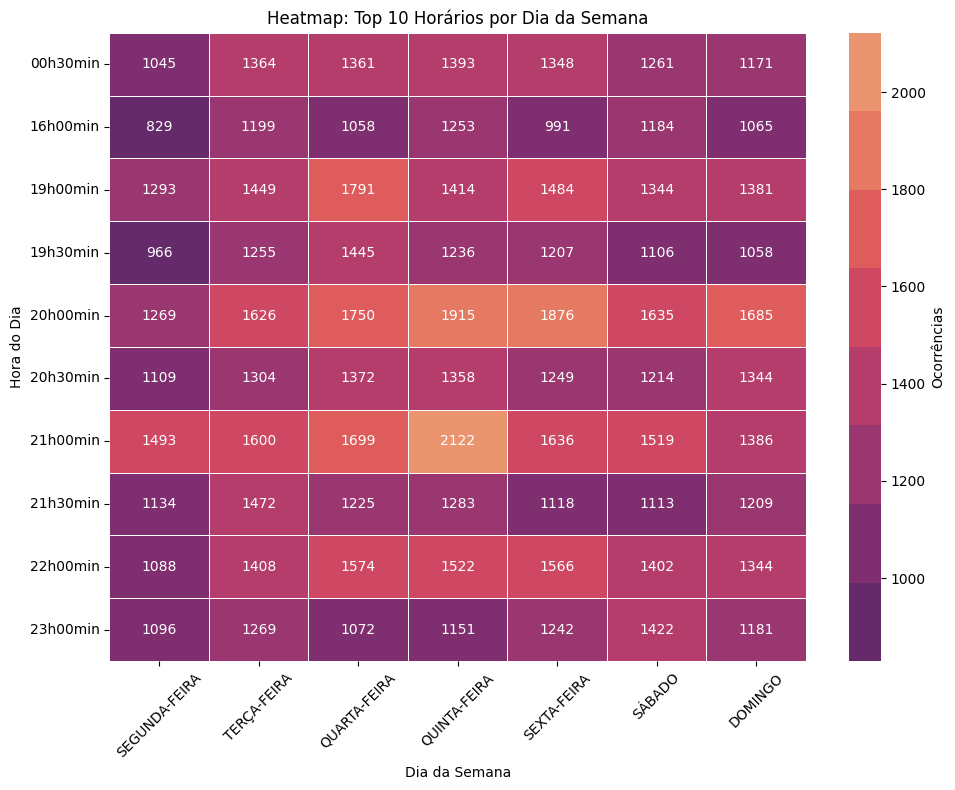

In [ ]:
top10_horarios = contagem_top10.index
df_top10 = df_horas[df_horas['HORA_OCORRENCIA'].isin(top10_horarios)]

heatmap_data = pd.crosstab(df_top10['HORA_OCORRENCIA'], df_top10['DIA_OCORRENCIA'])

dias_ordenados = ['SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA',
                  'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO', 'DOMINGO']
heatmap_data = heatmap_data[dias_ordenados] if set(dias_ordenados).issubset(heatmap_data.columns) else heatmap_data

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap= cores,  # Paleta
    linewidths=0.5,
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Ocorrências'}
)
plt.xlabel('Dia da Semana')
plt.xticks(rotation=45)
plt.ylabel('Hora do Dia')
plt.title('Heatmap: Top 10 Horários por Dia da Semana')
plt.tight_layout()
plt.show()

Já o heatmap "Top 10 Horários por Dia da Semana" complementa essa análise ao apresentar como essas ocorrências se distribuem ao longo da semana. Percebe-se que, em geral, os horários **entre 19h00min e 21h00min** mantêm alta frequência em quase **todos os dias**, com um leve aumento às quintas e sextas-feiras. Isso pode sugerir maior movimentação social nesses dias, contribuindo para o aumento das ocorrências. Em contrapartida, horários como *00h30min e 18h00min possuem menor intensidade*, embora ainda relevantes.

### Pergunta 15: Há diferença na proporção de flagrantes nos períodos do dia? (Aléxia)


Teste de hipótese

Hipótese nula (H₀): A proporção de flagrantes no período diurno é menor ou igual à proporção no período noturno.

Hipótese alternativa (H₁): A proporção de flagrantes no período diurno é maior que a proporção no período noturno.

In [ ]:
from scipy.stats import norm

# Vetores dos períodos
diurno = ['PELA MANHA', 'A TARDE']
noturno = ['A NOITE', 'DE MADRUGADA']

# Filtrar os dados removendo NaN e 'DESCONHECIDO' e considerando apenas SIM e NAO em FLAGRANTE
df_filtered = df[
    (df['PERIODO_OCORRENCIA'].isin(diurno + noturno)) &
    (df['FLAGRANTE'].isin(['SIM', 'NAO'])) &
    (df['PERIODO_OCORRENCIA'] != 'DESCONHECIDO')
]

# Contar flagrantes e total em DIURNO
flagrantes_diurno = df_filtered[(df_filtered['PERIODO_OCORRENCIA'].isin(diurno)) & (df_filtered['FLAGRANTE'] == 'SIM')].shape[0]
n1 = df_filtered[df_filtered['PERIODO_OCORRENCIA'].isin(diurno)].shape[0]

# Contar flagrantes e total em NOTURNO
flagrantes_noturno = df_filtered[(df_filtered['PERIODO_OCORRENCIA'].isin(noturno)) & (df_filtered['FLAGRANTE'] == 'SIM')].shape[0]
n2 = df_filtered[df_filtered['PERIODO_OCORRENCIA'].isin(noturno)].shape[0]

# Proporções
p_diurno = flagrantes_diurno / n1
p_noturno = flagrantes_noturno / n2

# Proporção combinada
p_comb = (flagrantes_diurno + flagrantes_noturno) / (n1 + n2)

# Cálculo do z-score para diferença de proporções (diurno - noturno)
numerador = p_diurno - p_noturno
denominador = np.sqrt(p_comb * (1 - p_comb) * (1/n1 + 1/n2))
z = numerador / denominador

# p-valor unilateral (cauda direita, H1: p_diurno > p_noturno)
p_value = norm.sf(z)

alpha = 0.05

print(f"Proporção flagrantes diurno: {p_diurno:.4f} ({flagrantes_diurno}/{n1})")
print(f"Proporção flagrantes noturno: {p_noturno:.4f} ({flagrantes_noturno}/{n2})")
print(f"z = {z:.3f}")
print(f"p-valor unilateral (H1: diurno > noturno) = {p_value:.4f}")

if p_value < alpha:
    print("Rejeita H0: períodos diurnos têm mais flagrantes.")
else:
    print("Não rejeita H0: sem evidências de que períodos diurnos tenham mais flagrantes.")

Proporção flagrantes diurno: 0.0763 (22159/290269)
Proporção flagrantes noturno: 0.0732 (24188/330651)
z = 4.767
p-valor unilateral (H1: diurno > noturno) = 0.0000
Rejeita H0: períodos diurnos têm mais flagrantes.


Esse teste de hipótese buscou comparar a proporção de ocorrências em que houve flagrante entre os períodos diurno (manhã e tarde) e noturno (noite e madrugada). As proporções observadas foram de 7,63% para o período diurno e 7,32% para o período noturno. O teste estatístico resultou em um valor de z = 4,767 e p-valor < 0,0001. Como o p-valor é menor que o nível de significância adotado (α = 0,05), rejeita-se a hipótese nula de que as proporções são iguais. Portanto, há evidência de que a proporção de flagrantes é significativamente maior durante o período diurno, ainda que a diferença percentual seja pequena, considerando que o tamanho amostral é grande (aproximadamente 600 mil dados).

### Pergunta 16: Existe mais flagrantes em locais públicos do que em locais residenciais? (Ana)

**Regra Associação (Ana)**

Aqui defini listas contendo os valores de TIPO_LOCAL que considero “Residencial” e “Público”. O restante entra em “Outros”. Também desconsidera os dados da coluna FLAGRANTE preenchida com "DESCONHECIDO" e "NAO".

In [ ]:
residenciais = {
    'RESIDENCIA',
    'CONDOMINIO RESIDENCIAL',
    'GARAGEM OU ABRIGO DE RESIDENCIA',
    'GARAGEM COLETIVA DE PREDIO'
}

publicos = {
    'VIA PUBLICA',
    'RODOVIA/ESTRADA',
    'TERMINAL/ESTACAO',
    'ESTRADA DE FERRO',
    'VEICULO EM MOVIMENTO',
    'ESTACIONAMENTO PUBLICO',
    'ESTACIONAMENTO PARTICULAR',
    'ESTACIONAMENTO COM VIGILANCIA',
    'SHOPPING CENTER',
    'CENTRO COMERC./EMPRESARIAL',
    'REPARTICAO PUBLICA',
    'CARRO FORTE'
}

def map_local(tipo):
    if tipo in residenciais:
        return 'Residencial'
    elif tipo in publicos:
        return 'Público'
    else:
        return 'Outros'

In [ ]:
# df_copy: só os casos com flagrante == 'SIM'
df_copy = df[df['FLAGRANTE'] == 'SIM'].copy()

# df_base: todos os casos com flagrante = 'SIM' ou 'NAO' (remove DESCONHECIDO)
df_base = df[df['FLAGRANTE'].isin(['SIM', 'NAO'])].copy()

# Aplica map_local em ambos
df_copy['LOCAL_CAT'] = df_copy['TIPO_LOCAL'].apply(map_local)
df_base['LOCAL_CAT'] = df_base['TIPO_LOCAL'].apply(map_local)

In [ ]:
df_copy['LOCAL_CAT'].value_counts()

,count
LOCAL_CAT,
Público,39552
Residencial,3981
Outros,2988


Transformei LOCAL_CAT e FLAGRANTE em colunas para representar as transações e converti para bool, servindo de entrada para o Apriori ou cálculos manuais de suporte/confiança.

In [ ]:
# Categorias de locais de ocorrências que houveram FLAGRANTE == SIM
# Converte 0/1 para False/True
df_loc_dummies = pd.get_dummies(
    df_copy['LOCAL_CAT'].astype(str),
    prefix='LOCAL'
).astype(bool)

# Exibe as primeiras 10 linhas para conferir
df_loc_dummies.head(10)

,LOCAL_Outros,LOCAL_Público,LOCAL_Residencial
29381,False,True,False
30201,False,True,False
30202,False,True,False
30203,False,True,False
30204,False,True,False
30205,False,True,False
30206,False,True,False
30207,False,True,False
30208,False,True,False
30209,False,True,False


In [ ]:
df_base['LOCAL_CAT'].value_counts()

,count
LOCAL_CAT,
Público,571817
Outros,74658
Residencial,44555


1. Regras avaliadas: “Residencial ⇒ SIM”,  “Público ⇒ SIM” e “Outros ⇒ SIM”


2. Support Count: Número de flagrantes (SIM) ocorridos em cada categoria de local ( quantos “Residencial ∧ SIM”).

3. Suporte (dentro dos SIM): Proporção desses flagrantes naquela categoria em relação ao total de flagrantes.

4. Suporte base (na base geral SIM+NAO): Proporção de ocorrências naquele tipo de local considerando todos os boletins válidos (SIM ou NAO).

5. Confiança (P(cat | SIM)): Neste contexto, coincide exatamente com o suporte dentro dos SIM, pois condicionei ao fato “flagrante = SIM”.

6. Lift: Mede o quanto a presença do local naquela categoria é mais (lift > 1) ou menos (lift < 1) frequente entre os flagrantes do que na base geral.

In [ ]:
N_sim = len(df_loc_dummies)               # total de flagrantes SIM
total_transacoes_base = len(df_base)      # total de SIM+NAO
total_por_categoria = df_base['LOCAL_CAT'].value_counts()

print(f"\nTotal de flagrantes SIM considerados: {N_sim}")
print(f"Total de transações base (SIM+NAO): {total_transacoes_base}\n")

categorias = ['Público', 'Residencial', 'Outros']

for cat in categorias:
    col = f'LOCAL_{cat}'

    # Count de SIM ∧ cat
    count_sim_cat = df_loc_dummies[col].sum()

    # Suporte dentro dos SIM
    suporte_sim = count_sim_cat / N_sim if N_sim else 0

    # Suporte base (freq. da categoria em SIM+NAO)
    count_base_cat = total_por_categoria.get(cat, 0)
    suporte_base = count_base_cat / total_transacoes_base if total_transacoes_base else 0

    # Confiança (P(cat|SIM)) — igual ao suporte_sim
    confianca = suporte_sim

    # Lift
    lift = confianca / suporte_base if suporte_base else 0

    print(f"Categoria: {cat}")
    print(f"  • Count (SIM ∧ {cat}): {count_sim_cat}")
    print(f"  • Suporte (dentro dos SIM): {suporte_sim:.4f} ({suporte_sim*100:.2f}%)")
    print(f"  • Suporte base (SIM+NAO):       {suporte_base:.4f} ({suporte_base*100:.2f}%)")
    print(f"  • Confiança P({cat}|SIM):       {confianca:.4f} ({confianca*100:.2f}%)")
    print(f"  • Lift ajustado:                {lift:.4f}")
    print("-" * 50)


Total de flagrantes SIM considerados: 46521
Total de transações base (SIM+NAO): 691030

Categoria: Público
  • Count (SIM ∧ Público): 39552
  • Suporte (dentro dos SIM): 0.8502 (85.02%)
  • Suporte base (SIM+NAO):       0.8275 (82.75%)
  • Confiança P(Público|SIM):       0.8502 (85.02%)
  • Lift ajustado:                1.0274
--------------------------------------------------
Categoria: Residencial
  • Count (SIM ∧ Residencial): 3981
  • Suporte (dentro dos SIM): 0.0856 (8.56%)
  • Suporte base (SIM+NAO):       0.0645 (6.45%)
  • Confiança P(Residencial|SIM):       0.0856 (8.56%)
  • Lift ajustado:                1.3272
--------------------------------------------------
Categoria: Outros
  • Count (SIM ∧ Outros): 2988
  • Suporte (dentro dos SIM): 0.0642 (6.42%)
  • Suporte base (SIM+NAO):       0.1080 (10.80%)
  • Confiança P(Outros|SIM):       0.0642 (6.42%)
  • Lift ajustado:                0.5945
--------------------------------------------------


Com base nos resultados, é possível concluir que:
1. Locais Públicos

- Entre todos os flagrantes, 39 552 (85,02 %) ocorreram em locais mapeados como “Público”. Esse é o valor de suporte dentro dos flagrantes.

- Na base geral (SIM+NAO), 82,75 % das ocorrências também são em locais públicos.

- O lift de 1,0274 indica que, proporcionalmente, flagrantes em locais públicos acontecem cerca de 2,7 % a mais do que se esperaria apenas pela frequência geral desses locais. Essa associação é positiva, mas bastante fraca: a alta frequência de flagrantes em via pública reflete principalmente o fato de a maioria dos boletins já ocorrer ali, não uma “propensão” muito maior ao flagrante.

2. Locais Residenciais

- Dos 46 521 flagrantes, 3 981 (8,56 %) ocorreram em “Residencial”.

- Na base total, apenas 6,45 % das ocorrências estão em residências.

- O lift de 1,3272 mostra que flagrantes em área residencial são 32,7 % mais prováveis do que seria esperado pela frequência geral desses locais — uma associação positiva e relativamente forte. Mesmo com menor volume absoluto, essa elevação proporcional sugere que, de todos os flagrantes, uma parcela se concentra em residências.

Utilizando o algoritmo Apriori:

Após o cálculo manualmente, será utilizando o algoritmo Apriori com o auxílio de uma biblioteca.

In [ ]:
# Categorias de locais de ocorrências que houveram FLAGRANTE == SIM
# Converte 0/1 para False/True
df_trans = pd.get_dummies(
    df_base[['LOCAL_CAT','FLAGRANTE']].astype(str),
    prefix=['LOCAL','FLAGRANTE']
).astype(bool)

# Exibe as primeiras 10 linhas para conferir
df_trans.head(10)

,LOCAL_Outros,LOCAL_Público,LOCAL_Residencial,FLAGRANTE_NAO,FLAGRANTE_SIM
29379,False,True,False,True,False
29380,False,True,False,True,False
29381,False,True,False,False,True
29382,False,True,False,True,False
29383,True,False,False,True,False
29384,True,False,False,True,False
29385,False,True,False,True,False
29386,True,False,False,True,False
29387,False,True,False,True,False
29388,False,False,True,True,False


Extração de itemsets frequentes com Apriori:

In [ ]:
# min_support define o limite mínimo — ajuste conforme seu objetivo.
frequent_itemsets = apriori(
    df_trans,
    min_support=0.01,    # aqui, itemsets presentes em ≥1% das transações
    use_colnames=True
)

# Ordena do maior support para o menor
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
print(frequent_itemsets.head(10))

    support                            itemsets
3  0.932679                     (FLAGRANTE_NAO)
1  0.827485                     (LOCAL_Público)
6  0.770249      (FLAGRANTE_NAO, LOCAL_Público)
0  0.108039                      (LOCAL_Outros)
5  0.103715       (LOCAL_Outros, FLAGRANTE_NAO)
4  0.067321                     (FLAGRANTE_SIM)
2  0.064476                 (LOCAL_Residencial)
8  0.058715  (LOCAL_Residencial, FLAGRANTE_NAO)
7  0.057236      (FLAGRANTE_SIM, LOCAL_Público)


 Geração de regras de associação:


In [ ]:
# Regras cujo consequente seja FLAGRANTE_SIM
rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=1.0   # só lift ≥1 para regras positivas
)

# Filtra apenas as regras com consequent == {'FLAGRANTE_SIM'}
rules_sim = rules[rules['consequents'] == frozenset({'FLAGRANTE_SIM'})]

# Ordena pela confiança ou lift para ver as mais fortes
rules_sim = rules_sim.sort_values(['lift','confidence'], ascending=False)

# Exibe as colunas-chave
print(rules_sim[['antecedents','consequents','support','confidence','lift']])

       antecedents      consequents   support  confidence      lift
3  (LOCAL_Público)  (FLAGRANTE_SIM)  0.057236    0.069169  1.027447


Com o critério mínimo de suporte e lift que foi definido, nenhuma outra combinação de itens alcançou relevância estatística suficiente para ser trazida como regra. A conclusão que se pode chegar, é que os resultados utilizando o algoritmo e calculados manualmente foram os mesmos e não foi possível chegar em associações fortes.

Nota-se que o lift de 1,0274 sinaliza apenas 2,7 % de ganho em relação ao acaso — ou seja, “Local Público” quase não altera a chance de flagrante. E “Residencial” não atingiu o suporte mínimo de 1 % ou lift ≥ 1, ou seja, a associação foi fraca.

### Pergunta 17: Houveram mais crimes patrimoniais no ano de 2019 ou em 2022? (Ana)

**Testes de hipótese**

Um mecanismo muito utilizado para verificar possibilidades e se algum evento é válido ou não é o Teste de Hipótese. Para usá-lo, inicialmente temos que definir duas hipóteses complementares, a hipótese nula (H0) que é a premissa de partida e a hipótese alternativa (H1) que precisa ser verdadeira se a hipótese nula for rejeitada.

H₀: As ocorrências de crimes patrimoniais em 2019 são iguais ao ano de 2022.

H₁: As ocorrências de crimes patrimoniais são maiores em 2019 em relação ao ano de 2022.

Para o nível de signficância, usarei α = 0,05, conforme sugerido como padrão nos slides.

- Se p < 0,05, a probabilidade de observarmos ocorrências menores ou maiores entre as contagens de 2019 e 2022, caso as ocorrências fossem iguais, é inferior a 5%.

  - Rejeitamos H₀ e concluímos que a pandemia (ou outros fatores) podem ter relação com a diferença do número de ocorrências.


- Se p ≥ 0,05, não temos evidência suficiente para afirmar mudança na distribuição.

In [ ]:
# Total geral e total patrimonial em cada ano
totais = df_ocorrencias_2019_2022.groupby('ANO_BO').size()
patrims = (
    df_ocorrencias_2019_2022
    [df_ocorrencias_2019_2022['CATEGORIA_CRIME'] == 'Patrimonial']
    .groupby('ANO_BO')
    .size()
)

# extrai
n1 = int(totais.get(2019, 0))      # total de BO em 2019
x1 = int(patrims.get(2019, 0))     # patrimoniais em 2019
n2 = int(totais.get(2022, 0))      # total de BO em 2022
x2 = int(patrims.get(2022, 0))     # patrimoniais em 2022

# proporções amostrais
p1 = x1 / n1
p2 = x2 / n2

# proporção conjunta (para cálculo do erro padrão)
p_pool = (x1 + x2) / (n1 + n2)

# erro-padrão da diferença de proporções
se = math.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# 5) z-score
z = (p1 - p2) / se

# 6) p-valor unilateral (H₁: p1 > p2 → cauda esquerda)
p_value = 0.5 * (1 - math.erf(z / math.sqrt(2)))

# 7) resultados
print(f"2019: {x1}/{n1} = {p1:.3%}  │  2022: {x2}/{n2} = {p2:.3%}")
print(f"Proporção conjunta (pooled): {p_pool:.3%}")
print(f"Erro-padrão = {se:.6f}")
print(f"z-score = {z:.4f}")
print(f"p-valor (unilateral à esquerda) = {p_value:.4f}")

α = 0.05
if p_value < α:
    print("p < 0.05 → rejeita H₀: proporção patrimoniais em 2019 É MENOR que em 2022.")
else:
    print("p ≥ 0.05 → não rejeita H₀: sem evidência de diferença nas proporções.")


2019: 688414/737069 = 93.399%  │  2022: 641932/710834 = 90.307%
Proporção conjunta (pooled): 91.881%
Erro-padrão = 0.000454
z-score = 68.0985
p-valor (unilateral à esquerda) = 0.0000
p < 0.05 → rejeita H₀: proporção patrimoniais em 2019 É MENOR que em 2022.


Como o p-valor é muito menor que o nível de significância usual (α = 0,05), rejeitamos a hipótese nula H₀. As ocorrências de crimes patrimoniais diminuíram de forma relevante entre 2019 (pré-pandemia) e 2022 (pós ou final da pandemia).

A pandemia pode ter influenciado diretamente o tipo de ocorrências registradas, seja pela mudança no comportamento social, restrições de mobilidade ou pressão sobre o sistema de segurança.

### Pergunta 18: Existe alguma relação entre a temperatura média dos dias do ano e a quantidade de ocorrências de certos crimes em tempos frios, amenos e quentes?

**Testes de hipótese (Lucas)**

* Hipótese nula (H₀): Não existe relação entre as temperaturas do dia com a quantidade de ocorrências.

* Hipótese alternativa (H₁): A quantidade de ocorrências aumenta em dias mais quentes.

Filtramos as colunas classificacao_temp e FLAGRANTE e removemos nulos.

Transformamos FLAGRANTE em 1 = “SIM” e 0 = “NÃO”.

Contamos, para cada categoria (FRIO, AMENO, QUENTE):

Quantos dias há na categoria (nₐ).

Quantos desses dias tiveram flagrante (nₐ∧F).

Calculamos o Z‑score comparando a proporção observada de flagrantes em cada categoria com a proporção média de flagrantes no total.

Obtivemos o p‑valor (única‑caudal para QUENTE, bi‑caudal para as outras) e, se p < 0,05, rejeitamos H₀.

Criamos uma simples função para determinar a temperatura do dia.

In [ ]:
def classificar_temperatura(temp):
    if temp > 25:
        return "QUENTE"
    elif temp < 15:
        return "FRIO"
    else:
        return "AMENO"

Depois ocorrerá a preparação de dados para o teste, preparando o dataframe da temperatura e mesclando com o dataframe trabalhado aqui anteriormente.

In [ ]:
def preparar_dados_para_teste(df_ocorrencias, df_temperatura):
    df_ocorrencias = df_ocorrencias.rename(columns={"DATA_OCORRENCIA": "data"})
    df_temperatura = df_temperatura.rename(columns={"Data Medicao": "data",
                                                    "TEMPERATURA MEDIA, DIARIA (AUT)(°C)": "temp_med"})
    df_temperatura["data"] = pd.to_datetime(df_temperatura["data"], errors="coerce")
    df_temperatura["temp_med"] = df_temperatura["temp_med"].astype(str).str.replace(",", ".").astype(float)
    df_temperatura = df_temperatura[["data", "temp_med"]].dropna()
    df_temperatura["classificacao_temp"] = df_temperatura["temp_med"].apply(classificar_temperatura)

    df_merged = pd.merge(df_ocorrencias, df_temperatura, on="data", how="inner")

    contagem = df_merged["classificacao_temp"].value_counts().to_dict()
    categorias = ["FRIO", "AMENO", "QUENTE"]
    contagem_completa = {cat: contagem.get(cat, 0) for cat in categorias}

    df_contagem = pd.DataFrame({
        "Classificacao_Temperatura": list(contagem_completa.keys()),
        "Quantidade_Ocorrencias": list(contagem_completa.values())
    })

    return df_contagem

É feito o teste de proporção de ocorrências, com o z score e o p valor sendo testados.

In [ ]:
def teste_proporcao_ocorrencias(contagem_por_temp, alpha=0.05):
    resultados = []
    total_ocorrencias = contagem_por_temp['Quantidade_Ocorrencias'].sum()
    p_esperada = 1 / len(contagem_por_temp)

    for _, row in contagem_por_temp.iterrows():
        temp = row['Classificacao_Temperatura']
        ocorrencias = row['Quantidade_Ocorrencias']
        p_observada = ocorrencias / total_ocorrencias

        z_score = (p_observada - p_esperada) / np.sqrt(p_esperada * (1 - p_esperada) / total_ocorrencias)

        if temp == 'QUENTE':
            p_valor = 1 - norm.cdf(z_score)
            tipo_teste = 'Unicaudal (direita)'
        else:
            p_valor = 2 * (1 - norm.cdf(np.abs(z_score)))
            tipo_teste = 'Bicaudal'

        decisao = 'Rejeitar H₀' if p_valor < alpha else 'Não Rejeitar H₀'

        resultados.append({
            'Classificacao_Temperatura': temp,
            'Ocorrencias': ocorrencias,
            'Proporcao_Observada': p_observada,
            'Proporcao_Esperada': p_esperada,
            'Z_Score': z_score,
            'P_Valor': p_valor,
            'Tipo_Teste': tipo_teste,
            'Decisao': decisao
        })

    return pd.DataFrame(resultados)

Simples código para a visualização dos resultados num barplot.

In [ ]:
def visualizar_resultados(contagem_por_temp):
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")

    cores = ['#5e3262', '#a54c6f', '#d68472']
    total = contagem_por_temp['Quantidade_Ocorrencias'].sum()

    ax = sns.barplot(
        x='Classificacao_Temperatura',
        y='Quantidade_Ocorrencias',
        data=contagem_por_temp,
        palette=cores
    )

    for i, p in enumerate(ax.patches):
        height = p.get_height()
        proporcao = height / total
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 30,
            f'{int(height)}\n({proporcao:.1%})',
            ha="center",
            fontsize=10
        )

    plt.title('Ocorrências por Classificação de Temperatura')
    plt.xlabel('Temperatura')
    plt.ylabel('Número de Ocorrências')
    plt.tight_layout()
    plt.show()

E por fim, as funções criadas anteriormente são utilizadas nesta aqui, permitindo uma modularidade para o teste de qualquer crime específico.

In [ ]:
def executar_teste_hipotese(df_ocorrencias, df_temperatura, crime=None, alpha=0.05):
    print("=== TESTE DE HIPÓTESE: TEMPERATURA vs OCORRÊNCIAS ===")
    print("Hipótese nula (H₀): Não existe relação entre as temperaturas do dia com a quantidade de ocorrências.")
    print("Hipótese alternativa (H₁): A quantidade de ocorrências aumenta em dias mais quentes.\n")

    if crime:
        df_filtrado = df_ocorrencias[df_ocorrencias['NATUREZA_APURADA'] == crime].copy()
        print(f"Analisando apenas o crime: {crime}")
    else:
        df_filtrado = df_ocorrencias.copy()
        print("Analisando todos os tipos de crime")

    contagem_por_temp = preparar_dados_para_teste(df_filtrado, df_temperatura)

    print("\n--- Tabela de Contagem ---")
    print(contagem_por_temp)

    print("\n--- Resultados do Teste de Proporção ---")
    resultados = teste_proporcao_ocorrencias(contagem_por_temp, alpha)
    print(resultados)

    visualizar_resultados(contagem_por_temp)

    print("\n=== CONCLUSÃO ===")
    resultado_quente = resultados[resultados['Classificacao_Temperatura'] == 'QUENTE']
    if not resultado_quente.empty and resultado_quente['Decisao'].values[0] == 'Rejeitar H₀':
        print("Há evidência estatística de que dias quentes têm mais ocorrências.")
    else:
        print("Não há evidência suficiente para afirmar que dias quentes têm mais ocorrências.")

E assim, é testado com o crime de FURTO com TRANSEUNTE, por exemplo, verificando que não há evidências suficientes pra dizer que o calor influenciou esse crime em específico.

=== TESTE DE HIPÓTESE: TEMPERATURA vs OCORRÊNCIAS ===
Hipótese nula (H₀): Não existe relação entre as temperaturas do dia com a quantidade de ocorrências.
Hipótese alternativa (H₁): A quantidade de ocorrências aumenta em dias mais quentes.

Analisando apenas o crime: FURTO (ART. 155) - TRANSEUNTE

--- Tabela de Contagem ---
  Classificacao_Temperatura  Quantidade_Ocorrencias
0                      FRIO                     402
1                     AMENO                    6427
2                    QUENTE                     399

--- Resultados do Teste de Proporção ---
  Classificacao_Temperatura  Ocorrencias  Proporcao_Observada  \
0                      FRIO          402             0.055617   
1                     AMENO         6427             0.889181   
2                    QUENTE          399             0.055202   

   Proporcao_Esperada     Z_Score  P_Valor           Tipo_Teste  \
0            0.333333  -50.086038      0.0             Bicaudal   
1            0.333333  100.24

/tmp/ipython-input-158-1393033455.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


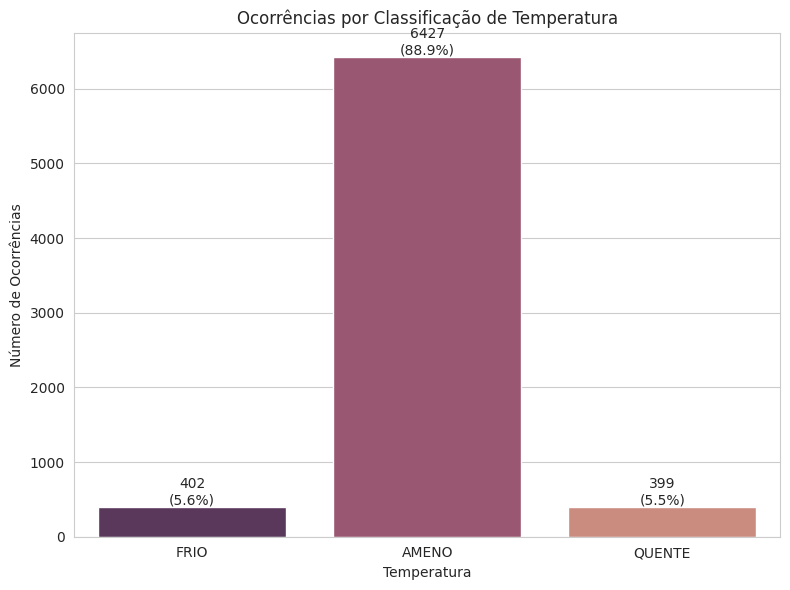


=== CONCLUSÃO ===
Não há evidência suficiente para afirmar que dias quentes têm mais ocorrências.


In [ ]:
df_2022 = df.copy()
df_temperatura_2022 = pd.read_csv('/content/drive/MyDrive/DadosTemperatura2022SP.csv', delimiter=";", skiprows=10)

executar_teste_hipotese(df_2022, df_temperatura_2022, crime="FURTO (ART. 155) - TRANSEUNTE")

**Regra de Associação (Lucas)**

Para cada classe de temperatura (FRIO, AMENO, QUENTE) medimos:

Suporte: fração de ocorrências que aparecem naquela categoria (por exemplo, quantas linhas do dataset têm “TEMP_QUENTE = True”).

Suporte conjunto: fração de ocorrências que estão na categoria e também são flagrantes (ex.: “TEMP_QUENTE = True” e “FLAG_SIM = True”).

Confiança: probabilidade de que uma ocorrência seja flagrante, sabendo que ela está em “quente” (ou “frio”/“ameno”).

Lift: quanto essa confiança excede (ou fica abaixo) da probabilidade média de flagrante em todo o conjunto.

Se lift > 1 → flagrantes são mais prováveis nessa categoria do que no geral.

Se lift < 1 → flagrantes são menos prováveis nessa categoria.

Primeiro montamos um novo dataframe mesclando os dataframes de temperatura e o que já temos.

In [ ]:
def montar_dataframe_apriori(df_ocorrencias, df_temperatura):
    df_o = df_ocorrencias.rename(columns={"DATA_OCORRENCIA": "data"})
    df_t = df_temperatura.rename(columns={
        "Data Medicao": "data",
        "TEMPERATURA MEDIA, DIARIA (AUT)(°C)": "temp_med"
    }).copy()
    df_t["data"] = pd.to_datetime(df_t["data"], errors="coerce")
    df_t["temp_med"] = (
        df_t["temp_med"]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )
    df_t = df_t[["data", "temp_med"]].dropna()
    df_t["classificacao_temp"] = df_t["temp_med"].apply(classificar_temperatura)

    df = pd.merge(df_o, df_t, on="data", how="inner")

    df["FLAG_SIM"] = df["FLAGRANTE"].str.upper().eq("SIM")

    df_dummies = pd.get_dummies(df["classificacao_temp"], prefix="TEMP").astype(bool)

    df_apriori = pd.concat([df_dummies.reset_index(drop=True),
                             df[["FLAG_SIM"]].reset_index(drop=True)], axis=1)
    return df_apriori

Depois geramos as regras de associação do cálculo apriori.

In [ ]:
def gerar_regras_temp_flag(df_apriori, min_support=0.001, min_confidence=0.01):
    itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)

    regras = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)

    regras_filtradas = regras[
        regras["antecedents"].apply(lambda s: len(s) == 1 and list(s)[0].startswith("TEMP_")) &
        regras["consequents"].apply(lambda s: len(s) == 1 and list(s)[0] == "FLAG_SIM")
    ].copy()

    return regras_filtradas.sort_values(by=["lift", "confidence"], ascending=[False, False])

E por fim, executamos a função criada pra avaliar as regras, com os antecedentes, consequentes, valores de suporte, a confiança e o lift.

In [ ]:
df_apriori = montar_dataframe_apriori(df_2022, df_temperatura_2022)
regras_temp_flag = gerar_regras_temp_flag(df_apriori,
                                          min_support=0.001,
                                          min_confidence=0.01
                                          )

print("=== Regras de Associação (TEMP_* ⇒ FLAG_SIM) ===")
if regras_temp_flag.empty:
    print("Nenhuma regra encontrada com os parâmetros atuais.")
else:
    print(regras_temp_flag[["antecedents", "consequents", "support", "confidence", "lift"]])

=== Regras de Associação (TEMP_* ⇒ FLAG_SIM) ===
     antecedents consequents   support  confidence      lift
4  (TEMP_QUENTE)  (FLAG_SIM)  0.003523    0.064682  1.054804
0   (TEMP_AMENO)  (FLAG_SIM)  0.054558    0.061878  1.009083
3    (TEMP_FRIO)  (FLAG_SIM)  0.003240    0.050759  0.827754


A análise de Regras de Associação revelou, de modo claro, como a temperatura do dia se relaciona com a probabilidade de ocorrência de um flagrante. Veja abaixo o resumo:

Dias QUENTES

A regra “Se é dia QUENTE, então houve flagrante” apresentou confiança de 6,47%. Ou seja, entre as 15 182 ocorrências registradas em dias quentes, 6,47% resultaram em flagrante.

O lift dessa regra foi de 1,0548, indicando que, em um dia quente, a chance de ter flagrante é aproximadamente 5,5% maior do que a probabilidade média geral (6,13%). Em outras palavras, dias quentes aumentam ligeiramente a probabilidade de flagrantes.

Dias FRIOS

A regra “Se é dia FRIO, então houve flagrante” registrou confiança de 5,08%. Dos 17 790 registros em dias frios, apenas 5,08% resultaram em flagrante.

O lift ficou em 0,8278, o que significa que, em dias frios, a chance de flagrante é cerca de 17% menor do que a média geral. Assim, dias frios parecem reduzir a probabilidade de resultar em flagrante.

Dias AMENOS

A regra “Se é dia AMENO, então houve flagrante” apresentou confiança de 6,19%. Das 245 757 ocorrências em dias amenos, 6,19% terminaram em flagrante.

O lift dessa associação foi de 1,0091, praticamente igual a 1. Isso indica que, em dias amenos, a chance de flagrante fica quase exatamente na média geral (6,13%), sem aumento ou redução significativa.

Em resumo, os resultados mostram que, comparado à média, dias quentes têm uma probabilidade ligeiramente maior de flagrante, dias frios têm probabilidade menor, e dias amenos ficam no nível médio esperado.


## Pergunta 19: Existe uma associação significativa entre o período do dia em que uma ocorrência acontece e a sua fatalidade ?(Daniel)

**Hipóteses Definidas:**

- Hipótese Nula (H₀): A probabilidade de uma ocorrência ser fatal é independente do período do dia. (Não existe associação entre o período do dia e a fatalidade da ocorrência).
- Hipótese Alternativa (H₁): A probabilidade de uma ocorrência ser fatal depende do período do dia. (Existe uma associação entre o período do dia e a fatalidade da ocorrência).

**Nível de Significância:**
Adotaremos um nível de significância (α) de 0,05. Isso significa que estamos dispostos a aceitar uma probabilidade de 5% de rejeitar a hipótese nula quando ela é verdadeira.

**Preparação e Análise dos Dados:**
Primeiramente, preparamos os dados para realizar o teste Z de proporções. Criamos uma tabela de contingência onde classificamos as ocorrências como "fatais" ou "não fatais". As ocorrências onde FLAG_VITIMA_FATAL é 'SIM' são consideradas fatais. Seguindo a lógica da análise anterior, os casos 'DESCONHECIDO' (e outros que não sejam 'SIM') são tratados como não fatais. Para a variável PERIODO_OCORRENCIA, removemos os registros marcados como 'DESCONHECIDO' para evitar que dados inconsistentes influenciem os resultados do teste.
Em seguida, aplicamos o teste Z de proporções para comparar as proporções de fatalidade entre os diferentes períodos do dia. Este teste calcula um Z-score para cada período, que mede o quão distante a proporção de fatalidades daquele período está da proporção geral de fatalidades. Os p-valores associados a cada Z-score nos permitem determinar se as diferenças observadas são estatisticamente significativas.

In [ ]:
def proporcao_fatalidade(df):

    # Criar a coluna 'FATAL' (1 se fatal, 0 caso contrário)
    df_teste = df.copy()
    df_teste['FATAL'] = np.where(df_teste['FLAG_VITIMA_FATAL'].astype(str).str.upper() == 'SIM', 1, 0)

    # Filtrar períodos do dia desconhecidos
    df_teste = df_teste[df_teste['PERIODO_OCORRENCIA'] != 'DESCONHECIDO']
    df_teste = df_teste[df_teste['PERIODO_OCORRENCIA'].notna()]  # Garantir que não há nulos

    # Criar a tabela de contingência
    tabela_contingencia = pd.crosstab(df_teste['PERIODO_OCORRENCIA'], df_teste['FATAL'])
    tabela_contingencia.columns = ['NÃO FATAL', 'FATAL']  # Renomear colunas para clareza

    print("--- Tabela de Contingência: Período da Ocorrência vs Fatalidade ---")
    print(tabela_contingencia)
    print("\n")

    return tabela_contingencia

def teste_z_proporcoes(tabela_contingencia, alpha=0.05):

    resultados = []
    total_ocorrencias = tabela_contingencia.sum().sum()

    # Calcular a proporção geral de fatalidade
    total_fatal = tabela_contingencia['FATAL'].sum()
    p_geral = total_fatal / total_ocorrencias

    for periodo in tabela_contingencia.index:
        n_periodo = tabela_contingencia.loc[periodo].sum()
        fatal_periodo = tabela_contingencia.loc[periodo]['FATAL']
        p_periodo = fatal_periodo / n_periodo

        # Calcular o Z-score
        z_score = (p_periodo - p_geral) / np.sqrt(p_geral * (1 - p_geral) * (1 / n_periodo + 1 / total_ocorrencias))

        # Calcular o p-valor (teste bicaudal)
        p_valor = 2 * (1 - norm.cdf(np.abs(z_score)))

        resultados.append({
            'Periodo': periodo,
            'Proporcao_Fatal': p_periodo,
            'Z_Score': z_score,
            'P_Valor': p_valor
        })

    resultados_df = pd.DataFrame(resultados)

    # Adicionar a coluna de decisão
    resultados_df['Decisao'] = resultados_df['P_Valor'].apply(lambda p: 'Rejeitar H0' if p < alpha else 'Não Rejeitar H0')

    return resultados_df


# Aplicando as funções ao seu dataframe (df)
tabela_contingencia = proporcao_fatalidade(df)  # Certifique-se que 'df' está definido
resultados_teste_z = teste_z_proporcoes(tabela_contingencia)

print("--- Resultados do Teste Z de Proporções ---")
print(resultados_teste_z)

--- Tabela de Contingência: Período da Ocorrência vs Fatalidade ---
                    NÃO FATAL  FATAL
PERIODO_OCORRENCIA                  
A NOITE                217797    954
A TARDE                152173    512
DE MADRUGADA           115986    432
PELA MANHA             153867    322


--- Resultados do Teste Z de Proporções ---
        Periodo  Proporcao_Fatal   Z_Score       P_Valor          Decisao
0       A NOITE         0.004361  6.216563  5.081622e-10      Rejeitar H0
1       A TARDE         0.003353 -0.624658  5.321952e-01  Não Rejeitar H0
2  DE MADRUGADA         0.003711  1.353307  1.759574e-01  Não Rejeitar H0
3    PELA MANHA         0.002088 -8.225575  2.220446e-16      Rejeitar H0


Utilizando regra de associação

**Interpretação e Discussão dos Resultados**

O teste Z de proporções revelou que, ao compararmos a proporção de ocorrências fatais em cada período do dia com a proporção global, obtivemos:

- À NOITE: Proporção fatal de 0,436 %; Z = 6,22; p‑valor ≪ 0,001 Rejeita H₀
Há evidência forte de que a letalidade noturna está acima do nível geral. Observamos mais casos fatais nessa faixa do que esperaríamos se não houvesse relação com o horário.

- À TARDE: Proporção fatal de 0,335 %; Z = –0,62; p = 0,53 Não rejeita H₀
A taxa de fatalidade vespertina não difere estatisticamente da média global. O número de mortes na tarde está em linha com o comportamento geral.

- DE MADRUGADA: Proporção fatal de 0,371 %; Z = 1,35; p = 0,18 Não rejeita H₀
Embora levemente acima da média, o efeito não é estatisticamente significativo, indicando que a madrugada não se afasta do padrão global de letalidade.

- PELA MANHÃ: Proporção fatal de 0,209 %; Z = –8,23; p‑valor ≪ 0,001 Rejeita H₀
Aqui a letalidade é significativamente abaixo da média. O número de ocorrências fatais pela manhã é menor do que esperaríamos se não houvesse influência do período.

Esses resultados confirmam que os casos fatais não estão distribuídos uniformemente ao longo do dia. Em particular, noite e manhã exibem desvios significativos em relação ao padrão global — no primeiro, a letalidade é mais alta; no segundo, mais baixa.

**Conclusão**

Há evidências estatísticas robustas de que o horário em que uma ocorrência ocorre influencia a probabilidade de ela ser fatal. Os períodos noturno e matinal são os que mais se diferenciam do comportamento geral:

Noite: maior risco de fatalidade.

Manhã: menor risco de fatalidade.

Já a tarde e a madrugada apresentam níveis de letalidade compatíveis com a média global. Esses achados sugerem direcionar ações de prevenção e policiamento com foco especial no período noturno, além de investigar as condições que tornam a manhã relativamente mais segura para tentar replicar essas boas práticas em outros turnos.

**Análise de Regras de Associação: Período da Ocorrência e Fatalidade**

O objetivo desta análise é identificar se determinados períodos do dia estão frequentemente associados a eventos fatais (ou não fatais) e qual a força dessas associações.

**Preparação dos Dados para Análise de Associação**

Antes de aplicar os algoritmos de mineração, os dados foram transformados em um formato adequado. Para cada ocorrência, consideramos o "Período da Ocorrência" (ex: 'A NOITE', 'PELA MANHA') e o status de "Fatalidade" (se o evento foi fatal ou não fatal). Cada um desses atributos e seus respectivos valores foram tratados como "itens" distintos.

O processo envolveu:

- A utilização do conjunto de dados já filtrado, onde ocorrências com "Período da Ocorrência" desconhecido foram removidas.
- A conversão da coluna PERIODO_OCORRENCIA em múltiplas colunas binárias (formato one-hot encode), onde cada nova coluna representa um período específico (ex: PERIODO_A NOITE). Uma ocorrência recebe o valor 1 se pertence àquele período e 0 caso contrário.
- A criação de colunas binárias para representar a fatalidade: EVENTO_FATAL (1 se a ocorrência foi fatal, 0 caso contrário) e EVENTO_NAO_FATAL (1 se a ocorrência não foi fatal, 0 caso contrário).

Desta forma, cada ocorrência (linha do nosso dataset) é representada por um conjunto de itens presentes (valor 1) ou ausentes (valor 0).

**Geração e Interpretação das Regras de Associação**

Com os dados preparados, utilizei o algoritmo Apriori para identificar "itemsets frequentes", ou seja, combinações de período e status de fatalidade que ocorrem com uma frequência mínima no conjunto de dados (definida pelo parâmetro de suporte mínimo). Um suporte de 0.001 (0,1%) foi estabelecido, significando que uma combinação de itens precisa estar presente em pelo menos 0,1% de todas as ocorrências para ser considerada frequente.

A partir desses itemsets frequentes, foram geradas as Regras de Associação. Estas regras seguem o formato "Se {Condição A} então {Resultado B}". Para avaliar a relevância de cada regra, consideramos as seguintes métricas:

- Suporte: Indica a proporção de todas as ocorrências que contêm tanto a condição A quanto o resultado B.
- Confiança: Mede a probabilidade do resultado B ocorrer, dado que a condição A já ocorreu. Por exemplo, se uma ocorrência acontece "À NOITE" (condição A), qual a probabilidade dela ser "FATAL" (resultado B)?
- Lift: Compara a probabilidade do resultado B ocorrer quando a condição A está presente, com a probabilidade de B ocorrer de forma geral. Um lift maior que 1 sugere que a condição A aumenta a probabilidade do resultado B (associação positiva).
Selecionei e analisadas as regras que relacionam um período do dia a um status de fatalidade, com uma confiança mínima de 1% (0.01) e um lift superior a 1.

**Recriar df_teste (ou garantir que ele exista no escopo)**

In [ ]:
# Este DataFrame é usado como base, pois já tem a coluna FATAL e os períodos filtrados
df_teste_associacao = df.copy()
df_teste_associacao['FATAL'] = np.where(df_teste_associacao['FLAG_VITIMA_FATAL'].astype(str).str.upper() == 'SIM', 1, 0)
df_teste_associacao = df_teste_associacao[df_teste_associacao['PERIODO_OCORRENCIA'] != 'DESCONHECIDO']
df_teste_associacao = df_teste_associacao[df_teste_associacao['PERIODO_OCORRENCIA'].notna()]

**1. Preparação do DataFrame para o algoritmo Apriori**

In [ ]:
# One-hot encode PERIODO_OCORRENCIA
df_periodo_encoded = pd.get_dummies(df_teste_associacao['PERIODO_OCORRENCIA'], prefix='PERIODO')

# Criar colunas para EVENTO_FATAL e EVENTO_NAO_FATAL
df_fatal_encoded = pd.DataFrame({
    'EVENTO_FATAL': df_teste_associacao['FATAL'],
    'EVENTO_NAO_FATAL': 1 - df_teste_associacao['FATAL']
})
# Alinhar os índices, pois df_teste_associacao foi filtrado
df_fatal_encoded.index = df_periodo_encoded.index

# Concatenar para formar o DataFrame transacional
df_apriori_input = pd.concat([df_periodo_encoded, df_fatal_encoded], axis=1)

print("--- Amostra do DataFrame de Entrada para Apriori ---")
print(df_apriori_input.head())
print(f"\nDimensões do DataFrame para Apriori: {df_apriori_input.shape}\n")

--- Amostra do DataFrame de Entrada para Apriori ---
   PERIODO_A NOITE  PERIODO_A TARDE  PERIODO_DE MADRUGADA  PERIODO_PELA MANHA  \
0            False             True                 False               False   
1            False            False                 False                True   
2            False            False                  True               False   
5            False            False                 False                True   
7            False             True                 False               False   

   EVENTO_FATAL  EVENTO_NAO_FATAL  
0             0                 1  
1             0                 1  
2             0                 1  
5             0                 1  
7             0                 1  

Dimensões do DataFrame para Apriori: (642043, 6)



**2. Aplicar o algoritmo Apriori para encontrar itemsets frequentes**

In [ ]:
min_support_threshold = 0.001 # 0.1% de suporte mínimo

frequent_itemsets = apriori(df_apriori_input, min_support=min_support_threshold, use_colnames=True)

print("\n--- Itemsets Frequentes Encontrados (Exemplo) ---")
# Mostrar alguns itemsets que incluem combinações de período e fatalidade
print(frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1 and any(s.startswith('PERIODO_') for s in x) and any(s.startswith('EVENTO_') for s in x))].sort_values(by='support', ascending=False).head())


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



--- Itemsets Frequentes Encontrados (Exemplo) ---
     support                                  itemsets
7   0.339225       (EVENTO_NAO_FATAL, PERIODO_A NOITE)
10  0.239652    (EVENTO_NAO_FATAL, PERIODO_PELA MANHA)
8   0.237014       (PERIODO_A TARDE, EVENTO_NAO_FATAL)
9   0.180651  (EVENTO_NAO_FATAL, PERIODO_DE MADRUGADA)
6   0.001486           (PERIODO_A NOITE, EVENTO_FATAL)


**3. Gerar as regras de associação**

In [ ]:
min_confidence_threshold = 0.01 # 1% de confiança mínima
min_lift_threshold = 1.0 # Lift mínimo para associações positivas

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

# Filtrar para regras de interesse:
# (Antecedente é Período E Consequente é Evento) OU (Antecedente é Evento E Consequente é Período)
# E Lift > min_lift_threshold
rules_relevantes = rules[
    (
        (rules['antecedents'].apply(lambda x: any(item.startswith('PERIODO_') for item in x) and len(x) == 1)) &
        (rules['consequents'].apply(lambda x: any(item.startswith('EVENTO_') for item in x) and len(x) == 1))
    ) | (
        (rules['antecedents'].apply(lambda x: any(item.startswith('EVENTO_') for item in x) and len(x) == 1)) &
        (rules['consequents'].apply(lambda x: any(item.startswith('PERIODO_') for item in x) and len(x) == 1))
    )
]
rules_relevantes = rules_relevantes[rules_relevantes['lift'] > min_lift_threshold]

# Ordenar as regras para melhor visualização
rules_relevantes_sorted = rules_relevantes.sort_values(by=['lift', 'confidence'], ascending=[False, False])

print("\n--- Regras de Associação Relevantes (Período <=> Fatalidade) ---")
if rules_relevantes_sorted.empty:
    print("Nenhuma regra relevante encontrada com os limiares definidos. Considere ajustar os limiares de suporte ou confiança.")
else:
    # Selecionar colunas para exibição mais limpa
    print(rules_relevantes_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



--- Regras de Associação Relevantes (Período <=> Fatalidade) ---
            antecedents           consequents   support  confidence      lift
0        (EVENTO_FATAL)     (PERIODO_A NOITE)  0.001486    0.429730  1.261274
8  (PERIODO_PELA MANHA)    (EVENTO_NAO_FATAL)  0.239652    0.997912  1.001374
7    (EVENTO_NAO_FATAL)  (PERIODO_PELA MANHA)  0.239652    0.240484  1.001374
3     (PERIODO_A TARDE)    (EVENTO_NAO_FATAL)  0.237014    0.996647  1.000105
4    (EVENTO_NAO_FATAL)     (PERIODO_A TARDE)  0.237014    0.237836  1.000105


**A análise de Regras de Associação permitiu identificar padrões específicos de como o período do dia se relaciona com a fatalidade das ocorrências.**


O achado mais relevante aponta para o período da noite em relação aos eventos fatais. A regra "Se um evento é fatal, então ele ocorreu à noite" mostrou uma confiança de aproximadamente 43%. Isso significa que, dentro do conjunto de todas as ocorrências que resultaram em morte, uma parcela significativa (43%) concentrou-se no período noturno. Mais importante ainda, o lift de 1,26 para esta associação indica que um evento ser fatal torna sua ocorrência à noite 26% mais provável do que seria esperado caso não houvesse uma ligação particular entre fatalidades e o período noturno. Ou seja, o período da noite está desproporcionalmente representado entre os eventos fatais.

Em contrapartida, ao analisar os eventos não fatais, as regras que os associam aos períodos da manhã e da tarde (por exemplo, "Se a ocorrência é pela manhã, então ela não é fatal") apresentaram confianças muito elevadas, próximas de 100%. Contudo, o lift para essas associações ficou muito próximo de 1 (ex: 1.001 para manhã e não fatal). Isso sugere que, embora seja altamente provável um evento nesses períodos não ser fatal (o que é esperado, já que a maioria dos eventos em geral não são fatais), o fato de ocorrerem de manhã ou à tarde não torna o desfecho não fatal significativamente mais provável do que a tendência geral. A força da associação específica com esses períodos é fraca.

## Pergunta 20: Quais bairros apresentam maior incidência de ocorrências em determinados períodos do dia? (Aléxia)

Regras de associação

Busquei investigar a relação entre o bairro onde ocorreu o boletim de ocorrência e o período do dia em que a ocorrência foi registrada. Mais especificamente, queria entender se determinados bairros apresentam padrões temporais específicos para as ocorrências, ou seja, se há períodos do dia que são mais comuns a ocorrência de crimes

In [ ]:
# 1. Selecionar apenas as colunas necessárias e remover nulos
df_bairro_periodo = df[
    (df['BAIRRO'].notna()) &
    (df['PERIODO_OCORRENCIA'].notna()) &
    (df['BAIRRO'] != 'DESCONHECIDO') &
    (df['PERIODO_OCORRENCIA'] != 'DESCONHECIDO')][['BAIRRO', 'PERIODO_OCORRENCIA']].copy()

# 2. Selecionar os 5 bairros mais frequentes
bairros_mais_frequentes = df_bairro_periodo['BAIRRO'].value_counts().head(5).index.tolist()

# 3. Criar uma nova coluna: para indicar se está entre os bairros frequentes ou "Outros"
df_bairro_periodo['BAIRRO_TIPO'] = df_bairro_periodo['BAIRRO'].apply(
    lambda x: x if x in bairros_mais_frequentes else 'Outros'
)

# 4. Criar variáveis dummies para PERIODO_OCORRENCIA
df_periodo_dummies = pd.get_dummies(
    df_bairro_periodo['PERIODO_OCORRENCIA'].astype(str),
    prefix='PERIODO'
).astype(bool)

# 5. Concatenar dummies com o df original
df_analise = pd.concat([df_bairro_periodo, df_periodo_dummies], axis=1)

# 6. Informações iniciais
N_total = len(df_analise)  # total de boletins
periodos = df_bairro_periodo['PERIODO_OCORRENCIA'].unique()
bairros_analisados = bairros_mais_frequentes + ['Outros']

print(f"Total de boletins considerados: {N_total}\n")

# 7. Analisar cada bairro -> período
for bairro in bairros_analisados:
    df_bairro = df_analise[df_analise['BAIRRO_TIPO'] == bairro]
    n_bairro = len(df_bairro)
    suporte_bairro = n_bairro / N_total if N_total else 0

    print(f" Bairro: {bairro}")
    print(f"  • Total de boletins: {n_bairro}")
    print(f"  • Suporte do bairro: {suporte_bairro:.4f} ({suporte_bairro*100:.2f}%)")

    for periodo in periodos:
        col_periodo = f'PERIODO_{periodo}'
        n_bairro_periodo = df_bairro[col_periodo].sum()
        suporte_bairro_periodo = n_bairro_periodo / N_total if N_total else 0
        confianca = n_bairro_periodo / n_bairro if n_bairro else 0
        suporte_geral_periodo = df_analise[col_periodo].sum() / N_total if N_total else 0
        lift = confianca / suporte_geral_periodo if suporte_geral_periodo else 0

        print(f"    • Regra: {bairro} ⇒ {periodo}")
        print(f"       • Count: {n_bairro_periodo}")
        print(f"       • Suporte: {suporte_bairro_periodo:.4f} ({suporte_bairro_periodo*100:.2f}%)")
        print(f"       • Confiança: {confianca:.4f} ({confianca*100:.2f}%)")
        print(f"       • Lift: {lift:.4f}")
    print("-" * 60)

Total de boletins considerados: 610878

 Bairro: CENTRO
  • Total de boletins: 32860
  • Suporte do bairro: 0.0538 (5.38%)
    • Regra: CENTRO ⇒ A NOITE
       • Count: 10329
       • Suporte: 0.0169 (1.69%)
       • Confiança: 0.3143 (31.43%)
       • Lift: 0.8911
    • Regra: CENTRO ⇒ DE MADRUGADA
       • Count: 5535
       • Suporte: 0.0091 (0.91%)
       • Confiança: 0.1684 (16.84%)
       • Lift: 0.9403
    • Regra: CENTRO ⇒ A TARDE
       • Count: 9243
       • Suporte: 0.0151 (1.51%)
       • Confiança: 0.2813 (28.13%)
       • Lift: 1.2039
    • Regra: CENTRO ⇒ PELA MANHA
       • Count: 7753
       • Suporte: 0.0127 (1.27%)
       • Confiança: 0.2359 (23.59%)
       • Lift: 1.0062
------------------------------------------------------------
 Bairro: REPUBLICA
  • Total de boletins: 8138
  • Suporte do bairro: 0.0133 (1.33%)
    • Regra: REPUBLICA ⇒ A NOITE
       • Count: 3516
       • Suporte: 0.0058 (0.58%)
       • Confiança: 0.4320 (43.20%)
       • Lift: 1.2249
    • Reg

Selecionei os 5 bairros mais frequentes para a análise e o restante foi agrupado em "outros". Os bairros analisados
foram: Centro, República, Rural, Bela Vista e Consolação. Foi possível observar que a confiança das regras variou entre aproximadamente 14% e 44%, ou seja, para uma ocorrência registrada em um desses bairros, há essa probabilidade de ela ter ocorrido em um período específico do dia.

Mesmo que esses valores de confiança não sejam extremamente altos, os valores de lift superiores a 1 ocorreram em várias dessas associações, indicando que certos períodos do dia são mais relativamente mais frequentes em determinados bairros do que na média geral da base de dados. Por exemplo, no Centro, o período “à tarde” apresentou lift maior que 1, sugerindo que as ocorrências à tarde são mais frequentes naquele bairro em comparação aos outros bairros inclusos nos dados.

Embora as regras de associação entre bairros e períodos de ocorrência revelem algumas relações moderadas, como "Consolação ⇒ De Madrugada" (lift de 1.65), a maioria das associações apresenta lift próximo de 1, o que indica que a frequência observada é próxima da frequência esperada considerando toda a base de dados.

Portanto, é possível concluir que há padrões moderadamente relevantes em bairros específicos, mas, em geral, as associações não são fortemente marcadas, o que sugere que o período da ocorrência não varia de forma tão significativa entre os bairros analisados.

É importante pontuar que a maioria dos boletins está concentrada na categoria “Outros”, representando bairros menos frequentes(comparado aos cinco primeiros), e para esses casos os valores de lift ficam próximos de 1, indicando ausência de uma associação forte com períodos específicos, pois essa categoria ficou muito generalista, então não há como analisar padrões particulares.

Utilizando a priori:

Primeiramente, O objetivo é transformar as colunas BAIRRO_TIPO e PERIODO_OCORRENCIA em variáveis booleanas (dummies) para identificar padrões do tipo:

    “Se é bairro X, então o período tende a ser Y”

In [ ]:
def montar_dataframe_apriori_bairro_periodo(df):
    # 1. Filtragem de dados válidos
    df_bairro_periodo = df[
        (df['BAIRRO'].notna()) &
        (df['PERIODO_OCORRENCIA'].notna()) &
        (df['BAIRRO'] != 'DESCONHECIDO') &
        (df['PERIODO_OCORRENCIA'] != 'DESCONHECIDO') &
        (df['PERIODO_OCORRENCIA'] != 'EM HORA INCERTA')
    ][['BAIRRO', 'PERIODO_OCORRENCIA']].copy()

    # 2. Selecionar os 5 bairros mais frequentes
    bairros_mais_frequentes = df_bairro_periodo['BAIRRO'].value_counts().head(5).index.tolist()

    # 3. Criar a coluna BAIRRO_TIPO
    df_bairro_periodo['BAIRRO_TIPO'] = df_bairro_periodo['BAIRRO'].apply(
        lambda x: x if x in bairros_mais_frequentes else 'Outros'
    )

    # 4. Dummies para bairro e período
    df_bairro_dummies = pd.get_dummies(df_bairro_periodo['BAIRRO_TIPO'], prefix='BAIRRO').astype(bool)
    df_periodo_dummies = pd.get_dummies(df_bairro_periodo['PERIODO_OCORRENCIA'], prefix='PERIODO').astype(bool)

    # 5. Concatenar e retornar
    df_apriori = pd.concat([df_bairro_dummies.reset_index(drop=True),
                            df_periodo_dummies.reset_index(drop=True)], axis=1)
    return df_apriori

Segunda etapa - Gerar as regras com Apriori.

Estamos buscando regras do tipo:
"BAIRRO_X ⇒ PERIODO_Y"

In [ ]:
def gerar_regras_bairro_periodo(df_apriori, min_support=0.001, min_confidence=0.01):
    itemsets = apriori(df_apriori, min_support=min_support, use_colnames=True)

    regras = association_rules(itemsets, metric="confidence", min_threshold=min_confidence)

    # Filtrar regras de bairro ⇒ período
    regras_filtradas = regras[
        regras["antecedents"].apply(lambda s: len(s) == 1 and list(s)[0].startswith("BAIRRO_")) &
        regras["consequents"].apply(lambda s: len(s) == 1 and list(s)[0].startswith("PERIODO_"))
    ].copy()

    return regras_filtradas.sort_values(by=["lift", "confidence"], ascending=[False, False])

Agora execução e exibir regras:

In [ ]:
df_apriori = montar_dataframe_apriori_bairro_periodo(df)
regras_bairro_periodo = gerar_regras_bairro_periodo(df_apriori,
                                                    min_support=0.001,
                                                    min_confidence=0.01)

print("=== Regras de Associação (BAIRRO_* ⇒ PERIODO_*) ===")
if regras_bairro_periodo.empty:
    print("Nenhuma regra encontrada com os parâmetros atuais.")
else:
    # Ordena pelas regras mais relevantes (maior lift)
    regras_ordenadas = regras_bairro_periodo.sort_values(by="lift", ascending=False)

    # Pega apenas as 5 melhores
    top5_regras = regras_ordenadas.head(5)

    # Exibe só as 5 melhores
    print(top5_regras[["antecedents", "consequents", "support", "confidence", "lift"]])

=== Regras de Associação (BAIRRO_* ⇒ PERIODO_*) ===
            antecedents             consequents   support  confidence  \
16  (BAIRRO_CONSOLACAO)  (PERIODO_DE MADRUGADA)  0.002470    0.296989   
37       (BAIRRO_RURAL)  (PERIODO_DE MADRUGADA)  0.002920    0.266229   
1   (BAIRRO_BELA VISTA)       (PERIODO_A NOITE)  0.003863    0.438662   
27   (BAIRRO_REPUBLICA)       (PERIODO_A NOITE)  0.005756    0.432047   
8       (BAIRRO_CENTRO)       (PERIODO_A TARDE)  0.015131    0.281284   

        lift  
16  1.657854  
37  1.486146  
1   1.243625  
27  1.224872  
8   1.203850  


As regras de associação identificadas entre bairros e períodos de ocorrência mostram padrões interessantes. Por exemplo, na Consolação e no bairro Rural, as ocorrências são significativamente mais frequentes durante a madrugada, com probabilidades 66% e 49% maiores que a média, respectivamente. Já bairros como Bela Vista e República se destacam pela concentração de ocorrências no período noturno, enquanto o Centro apresenta maior incidência no período da tarde.

## Pergunta 21: A quantidade de ocorrências de 2022 cresce linearmente ao longo desse ano?

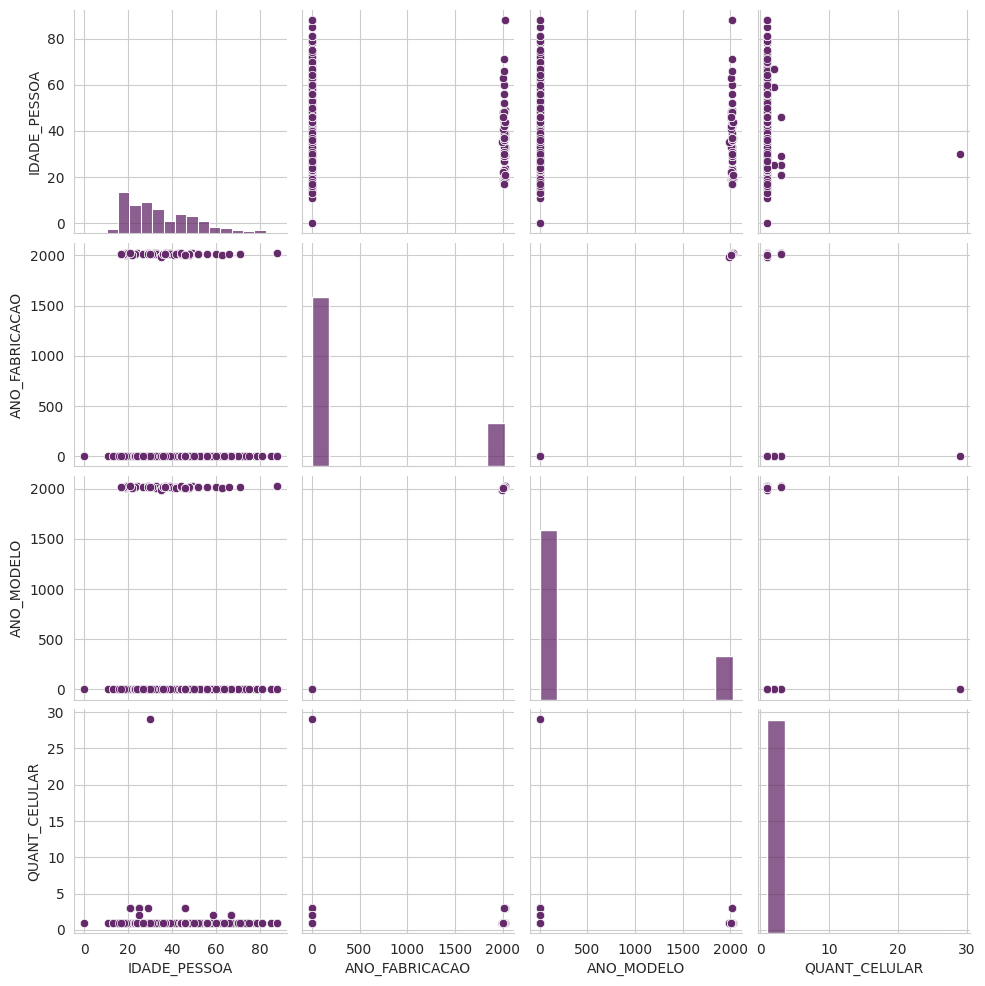

In [ ]:
df_pairplot = df.dropna(subset=['IDADE_PESSOA', 'ANO_FABRICACAO', 'ANO_MODELO', 'QUANT_CELULAR']).copy()
sns.pairplot(df_pairplot[['IDADE_PESSOA', 'ANO_FABRICACAO', 'ANO_MODELO', 'QUANT_CELULAR']])

In [ ]:
df.dtypes

,0
NUM_BO,int64
ANO_BO,int64
CODIGO_BOLETIM,string[python]
NATUREZA_APURADA,string[python]
DATA_OCORRENCIA,datetime64[ns]
HORA_OCORRENCIA,object
PERIODO_OCORRENCIA,object
CIDADE,string[python]
LOGRADOURO,string[python]
NUMERO_LOGRADOURO,float64


In [ ]:
df['MES_OCORRENCIA'] = df['DATA_OCORRENCIA'].dt.month
crimes_por_mes = df.groupby('MES_OCORRENCIA').size().reset_index(name='QTD_CRIMES')

# Regressão
from sklearn.linear_model import LinearRegression
import numpy as np

X = crimes_por_mes['MES_OCORRENCIA'].values.reshape(-1, 1)
y = crimes_por_mes['QTD_CRIMES'].values

modelo = LinearRegression()
modelo.fit(X, y)

print("θ0 (intercepto):", modelo.intercept_)
print("θ1 (inclinação):", modelo.coef_[0])
print("R2 (Score):", modelo.score(X,y))

θ0 (intercepto): 52424.106060606064
θ1 (inclinação): 1161.8041958041954
R2 (Score): 0.40237120977868857


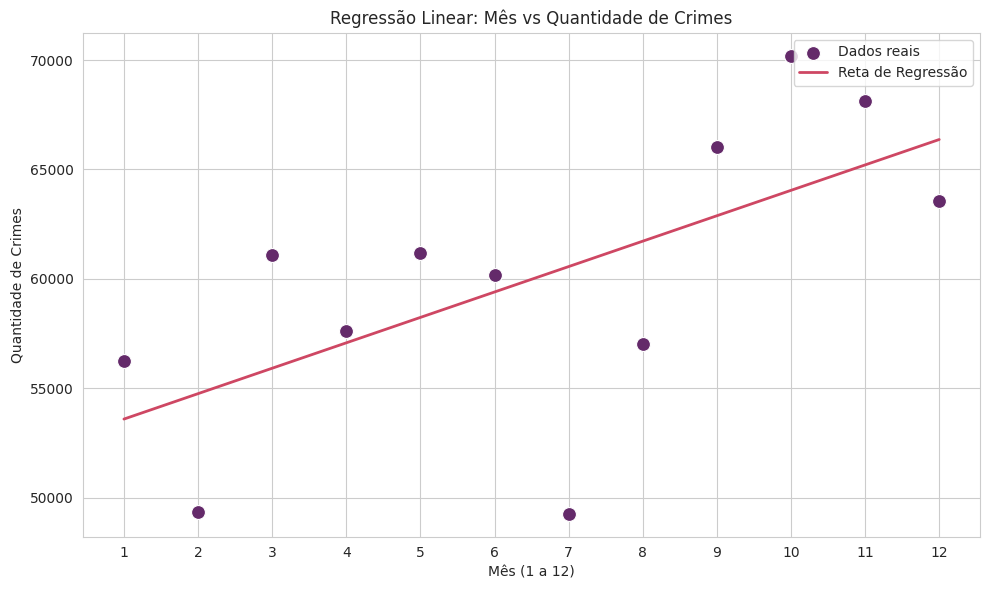

In [ ]:
# Previsões do modelo
y_pred = modelo.predict(X)

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crimes_por_mes['MES_OCORRENCIA'], y=crimes_por_mes['QTD_CRIMES'], label='Dados reais', s=100)
plt.plot(crimes_por_mes['MES_OCORRENCIA'], y_pred, color=cores[4], label='Reta de Regressão', linewidth=2)

plt.title('Regressão Linear: Mês vs Quantidade de Crimes')
plt.xlabel('Mês (1 a 12)')
plt.ylabel('Quantidade de Crimes')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

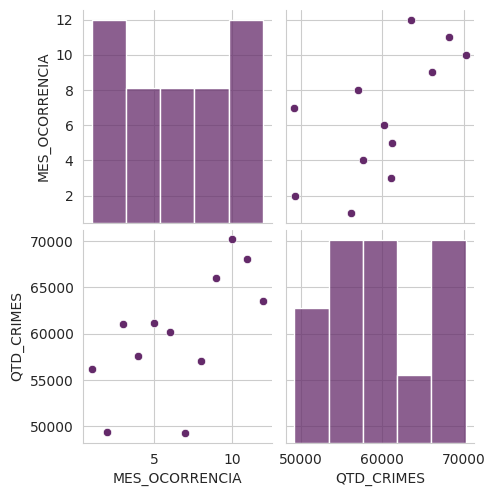

In [ ]:
df['MES_OCORRENCIA'] = df['DATA_OCORRENCIA'].dt.month
df_pair_plot = df[df['MES_OCORRENCIA'].notna()].groupby('MES_OCORRENCIA').size().reset_index(name='QTD_CRIMES')
sns.pairplot(df_pair_plot[['MES_OCORRENCIA', 'QTD_CRIMES']])

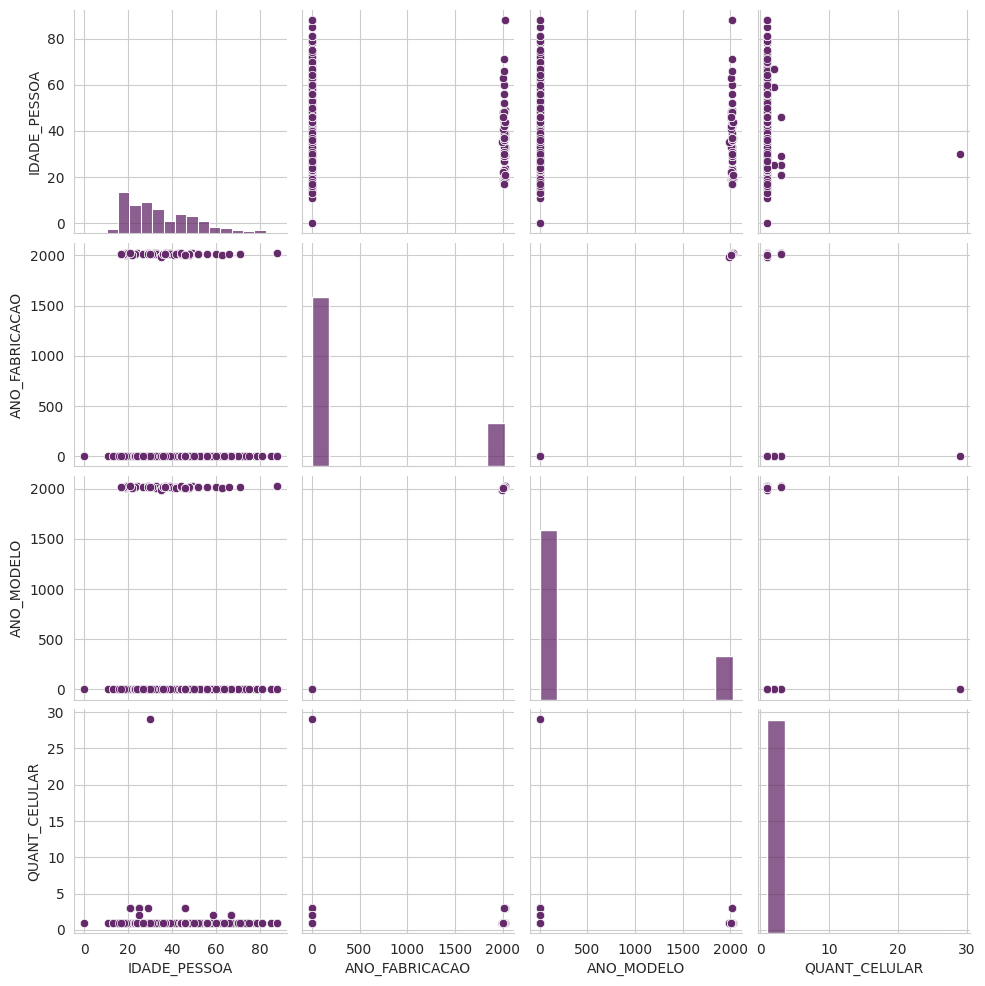

In [ ]:
df_pairplot = df.dropna(subset=['CATEGORIA_CRIME','IDADE_PESSOA', 'ANO_FABRICACAO', 'ANO_MODELO', 'QUANT_CELULAR']).copy()
sns.pairplot(df_pairplot[['IDADE_PESSOA', 'ANO_FABRICACAO', 'ANO_MODELO', 'QUANT_CELULAR']])

Ideia para melhoria da regressão: transformar as datas de ocorrências em um atributo numérico, para isso seria necessário transformar as datas em um valor único:

- Foi pensado selecionar apenas os anos de 2022
- Dessa forma, iria multiplicar o mês por 100 e somar o dia e o mês
- Assim, o eixo X iria variar em vez de 1 a 12 de 101 até 1231 (12 x 100 + 31)
- Sendo possível verificar talvez uma relação linear melhor

In [ ]:
# Filtrar apenas o ano de 2022
df_2022_copia = df_2022.copy()

# Criar atributo numérico MES_DIA
df_2022_copia['MES_DIA'] = df_2022_copia['DATA_OCORRENCIA'].dt.month * 100 + df_2022_copia['DATA_OCORRENCIA'].dt.day

# Agrupar pela nova coluna e contar quantidade de ocorrências por dia
crimes_por_dia = df_2022_copia.groupby('MES_DIA').size().reset_index(name='QTD_CRIMES')

# Separar X e y
X = crimes_por_dia['MES_DIA'].values.reshape(-1, 1)
y = crimes_por_dia['QTD_CRIMES'].values

# Modelo com validação cruzada
modelo = LinearRegression()
y_pred_cv = cross_val_predict(modelo, X, y, cv=5)

# Avaliação com CV
print("\nRegressão Linear (Ano 2022):")
print("R2 Score:", r2_score(y, y_pred_cv))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred_cv))
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred_cv))

# Previsão para linha de regressão (modelo treinado inteiro apenas para plotagem)
modelo.fit(X, y)
y_pred_line = modelo.predict(X)


Regressão Linear (Ano 2022):
R2 Score: 0.026877626605383287
Mean Absolute Error (MAE): 370.676151718656
Mean Squared Error (MSE): 219497.8200039793


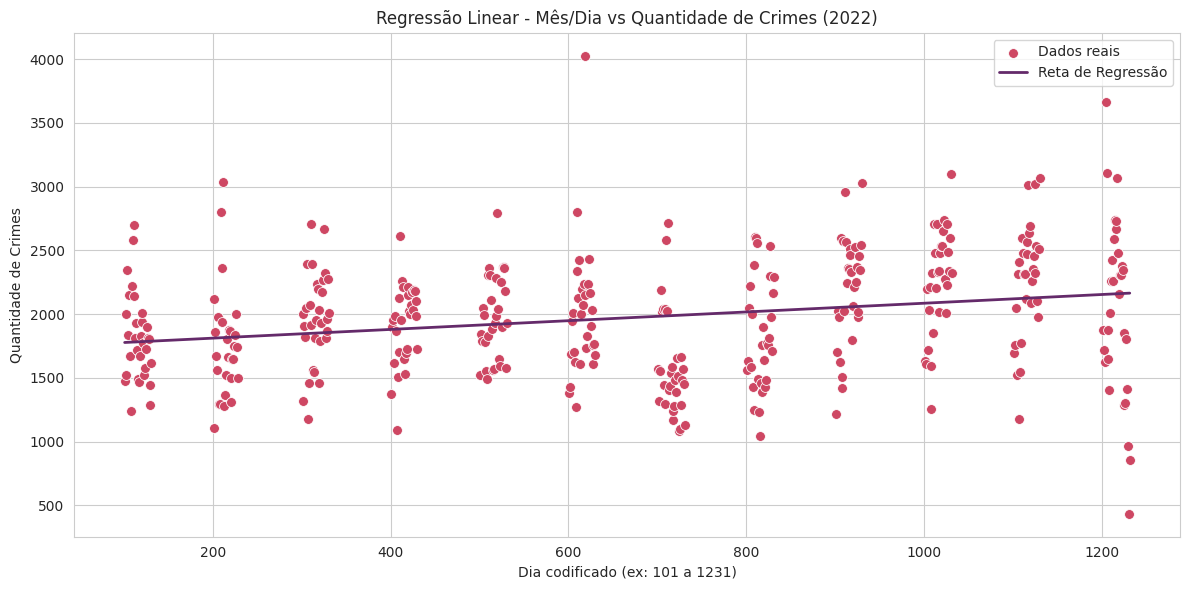

In [ ]:
# Gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(x=crimes_por_dia['MES_DIA'], y=crimes_por_dia['QTD_CRIMES'], label='Dados reais', color=cores[4], s=50)
plt.plot(crimes_por_dia['MES_DIA'], y_pred_line, color=cores[0], label='Reta de Regressão', linewidth=2)

plt.title('Regressão Linear - Mês/Dia vs Quantidade de Crimes (2022)')
plt.xlabel('Dia codificado (ex: 101 a 1231)')
plt.ylabel('Quantidade de Crimes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


A relação entre o tempo (mesmo no formato dia a dia) e o número de crimes não é linear forte ao longo de 2022. Crimes têm forte comportamento sazonal, de feriados, fins de semana, clima, datas festivas… Simplesmente mapear o dia como um número crescente não resolve isso por regressão linear simples.

## Pergunta 22: Quantas ocorrências podem ser previstas por dia com base no horário médio das ocorrências, no tipo de local, na região geográfica e nas características dos veículos envolvidos?

### Regressão linear

Foi aplicada uma transformação à variável HORA_OCORRENCIA, convertendo o horário textual no formato HH:MM:SS para minutos inteiros desde a meia-noite, criando a nova coluna HORA_OCORRENCIA_MIN. Essa conversão foi necessária porque algoritmos de regressão não lidam bem com variáveis temporais representadas como strings.

Na sequência, foram criadas duas colunas temporais: DIA_SEMANA, que indica o dia da semana de cada ocorrência (segunda, terça, etc.), e MES, representando o mês do ano. A localização geográfica das ocorrências foi tratada com um filtro de latitude e longitude, restringindo os registros a pontos dentro dos limites do estado de São Paulo. Isso foi feito para evitar que erros de geolocalização (ex.: coordenadas muito distantes) afetassem o modelo. Além disso, foi criada uma variável categórica simplificada chamada TIPO_LOCAL_SIMPLIFICADO, que transforma os diversos tipos de local em apenas duas categorias: “VIA PUBLICA” e “OUTROS”, reduzindo o risco de alta cardinalidade com baixa representatividade.

Para evitar que categorias irrelevantes ou mal definidas impactassem o modelo, todos os registros com o valor 'DESCONHECIDO' nas colunas categóricas foram removidos.

In [ ]:
df_copy = df.copy()

# Corrigir a coluna HORA_OCORRENCIA convertendo para minutos desde 00:00
def hora_para_minutos(hora):
    try:
        h, m, s = map(int, str(hora).split(':'))
        return h * 60 + m
    except:
        return np.nan

df_copy['HORA_OCORRENCIA_MIN'] = df_copy['HORA_OCORRENCIA'].apply(hora_para_minutos)

# Criar target: quantidade de crimes por dia
df_copy['DATA_OCORRENCIA_DATE'] = df_copy['DATA_OCORRENCIA'].dt.date

# Criar colunas adicionais: dia da semana e mês
df_copy['DIA_SEMANA'] = df_copy['DATA_OCORRENCIA'].dt.day_name()
df_copy['MES'] = df_copy['DATA_OCORRENCIA'].dt.month

target = df_copy.groupby('DATA_OCORRENCIA_DATE').size().reset_index(name='QTD_CRIMES')

# Filtrar apenas registros com valores válidos nas features selecionadas
relevant_columns = ['HORA_OCORRENCIA_MIN', 'LATITUDE', 'LONGITUDE', 'PERIODO_OCORRENCIA', 'TIPO_LOCAL', 'DELEGACIA_CIRCUNSCRICAO', 'DIA_SEMANA', 'MES']

df_filtered = df_copy.dropna(subset=['LATITUDE', 'LONGITUDE', 'HORA_OCORRENCIA_MIN'])

# Excluir linhas onde categorias importantes estão com valor NaN ou 'DESCONHECIDO'
for col in ['PERIODO_OCORRENCIA', 'TIPO_LOCAL', 'DELEGACIA_CIRCUNSCRICAO']:
    df_filtered = df_filtered[~df_filtered[col].isin(['DESCONHECIDO'])]
    df_filtered = df_filtered.dropna(subset=[col])

# Adicional: incluir ANO_FABRICACAO e ANO_MODELO como variáveis numéricas
numeric_additional = ['ANO_FABRICACAO', 'ANO_MODELO']
df_filtered = df_filtered.dropna(subset=numeric_additional)

# Agrupar features por dia após limpeza
feature_data = df_filtered.groupby('DATA_OCORRENCIA_DATE').agg({
    'HORA_OCORRENCIA_MIN': 'mean',
    'LATITUDE': 'mean',
    'LONGITUDE': 'mean',
    'ANO_FABRICACAO': 'mean',
    'ANO_MODELO': 'mean',
    'PERIODO_OCORRENCIA': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'TIPO_LOCAL': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'DELEGACIA_CIRCUNSCRICAO': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'DIA_SEMANA': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'MES': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
}).reset_index()

# Remover qualquer linha que ainda tenha NaN
feature_data = feature_data.dropna()

# Juntar com o target
df_model = pd.merge(feature_data, target, on='DATA_OCORRENCIA_DATE')

# Remover qualquer linha com NaN final
df_model = df_model.dropna()

Após isso, foi criada a variável-alvo (y), que corresponde à contagem de crimes por dia (QTD_CRIMES). O conjunto de features (X) foi definido removendo as colunas de identificação da data e da variável target. As variáveis foram então separadas entre categóricas e numéricas. Para garantir que todas as variáveis numéricas estivessem na mesma escala (evitando que variáveis com unidades maiores dominassem a regressão), foi utilizado o StandardScaler, que padroniza os dados com média zero e desvio padrão um. Já as variáveis categóricas passaram por um processo de codificação OneHotEncoder, que transforma cada categoria em uma coluna binária (0 ou 1), permitindo que o modelo interprete essas informações.

In [ ]:
# Separar X e y
X = df_model.drop(columns=['DATA_OCORRENCIA_DATE', 'QTD_CRIMES'])
y = df_model['QTD_CRIMES']

# Variáveis categóricas e numéricas
categorical_cols = ['PERIODO_OCORRENCIA', 'TIPO_LOCAL', 'DELEGACIA_CIRCUNSCRICAO', 'DIA_SEMANA', 'MES']
numeric_cols = ['HORA_OCORRENCIA_MIN', 'LATITUDE', 'LONGITUDE', 'ANO_FABRICACAO', 'ANO_MODELO']

# Pré-processamento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline com Regressão Linear
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Validação Cruzada (K-Fold com K=5)
k_folds = 5
y_pred_lr = cross_val_predict(pipeline_lr, X, y, cv=k_folds)

# Avaliação do modelo com validação cruzada
print("\nRegressão Linear com Validação Cruzada:")
print("R2 Score:", r2_score(y, y_pred_lr))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred_lr))


Regressão Linear com Validação Cruzada:
R2 Score: -6.379488128572217
Mean Absolute Error (MAE): 991.924810055934
Mean Squared Error (MSE): 6424538.89960759


Após o treinamento do modelo de Regressão Linear com validação cruzada (k=5), a previsão (y_pred) foi comparada com os valores reais da variável alvo, utilizando o R², o MAE e o MSE como métricas de avaliação. O resultado do R² foi de -6,37, um valor extremamente negativo. Esse número indica que o modelo linear teve um desempenho pior do que um modelo que simplesmente assumisse a média como previsão para todos os dias. Isso demonstra que a Regressão Linear falhou completamente em capturar qualquer padrão linear entre as variáveis de entrada (como horário médio das ocorrências, tipo de local, região geográfica e características dos veículos) e o número de crimes por dia.

O MAE (Erro Absoluto Médio) ficou em torno de 991,92, mostrando que o modelo errou, em média, por quase 1000 crimes por dia em relação aos valores reais. Já o MSE (Erro Quadrático Médio) foi de aproximadamente 6.424.538, indicando que, além de erros médios altos, o modelo cometeu erros extremos em alguns casos.

 Para a visualização final, foi usada uma técnica de redução de dimensionalidade chamada PCA (Análise de Componentes Principais). Como o modelo possui múltiplas variáveis independentes (multivariadas), não é possível criar um gráfico simples de dispersão em 2D. Por isso, o PCA transforma todas as variáveis numéricas e categóricas (após pré-processamento) em uma única variável latente (Componente Principal 1), que representa a combinação linear que mais explica a variabilidade dos dados. O eixo X do gráfico corresponde a essa nova variável reduzida, e o eixo Y mostra tanto os valores reais de quantidade de crimes quanto as previsões feitas pelo modelo.

ValueError: x and y must be the same size

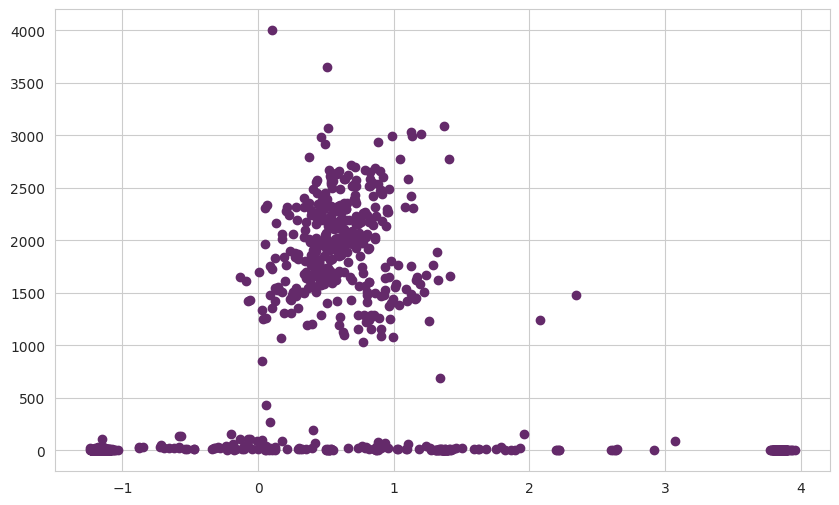

In [ ]:
# Visualização (Redução de Dimensionalidade com PCA para plotar)
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(preprocessor.fit_transform(X))

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced, y, color=cores[0], label='Valores reais')
plt.scatter(X_reduced, y_pred, color=cores[4], label='Previsões', alpha=0.6)
plt.title('Regressão Linear - Projeção PCA (Real vs Previsto)')
plt.xlabel('Componente Principal 1 (PCA)')
plt.ylabel('Quantidade de Crimes')
plt.legend()
plt.tight_layout()
plt.show()

Algo que o grupo reparou durante a aplicação da Regressão Linear nesse projeto foi que o fenômeno da criminalidade é, por natureza, um evento multifatorial e altamente complexo. Tentar explicá-lo ou prevê-lo utilizando exclusivamente uma regressão linear simples,impõe várias limitações estatísticas e conceituais. A criminalidade é resultado da interação de diversas variáveis sociais, econômicas, geográficas, temporais e até psicológicas. Fatores como clima, feriados, desemprego, fluxo populacional, densidade demográfica e sazonalidade impactam diretamente nos níveis de ocorrência criminal. No entanto, muitas dessas variáveis não estão disponíveis no dataset analisado, que se restringe a informações administrativas coletadas através de boletins de ocorrência no estado de São Paulo.

Além disso, a relação entre essas variáveis e a quantidade de crimes dificilmente segue um padrão puramente linear. Por exemplo, o aumento da movimentação de pessoas em determinadas regiões pode elevar a criminalidade de forma abrupta e não progressiva, comportamento que um modelo linear teria dificuldade de capturar. Da mesma forma, a presença de outliers ou de colunas com baixa variância (como atributos dominados por uma única categoria) pode introduzir viés no modelo, forçando a regressão a encontrar relações artificiais.

### Random Forest

Na fase de pré-processamento, foi criado um ColumnTransformer chamado preprocessor. Nele, as variáveis numéricas passaram por uma padronização com o StandardScaler, o que garante que todas fiquem na mesma escala (média zero e desvio padrão um), evitando que atributos com magnitudes maiores dominem o processo de aprendizado. As variáveis categóricas, por sua vez, foram transformadas usando OneHotEncoder, o que converte cada categoria distinta em uma coluna binária separada.

Depois, o código define o pipeline de machine learning com duas etapas: pré-processamento e o algoritmo de regressão Random Forest. Foi utilizada a validação cruzada k-fold com 5 divisões (k_folds = 5), utilizando a função cross_val_predict. Isso significa que o conjunto de dados foi dividido em 5 partes, onde o modelo treinou em 4 partes e testou na quinta, repetindo o processo para cada divisão.

In [ ]:
# Separar X e y
X = df_model.drop(columns=['DATA_OCORRENCIA_DATE', 'QTD_CRIMES'])
y = df_model['QTD_CRIMES']

# Variáveis categóricas e numéricas
categorical_cols = ['PERIODO_OCORRENCIA', 'TIPO_LOCAL', 'DELEGACIA_CIRCUNSCRICAO', 'DIA_SEMANA', 'MES']
numeric_cols = ['HORA_OCORRENCIA_MIN', 'LATITUDE', 'LONGITUDE', 'ANO_FABRICACAO', 'ANO_MODELO']

# Pré-processador para o pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline com Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Validação Cruzada (K-Fold com K=5)
k_folds = 5
y_pred_rf = cross_val_predict(pipeline_rf, X, y, cv=k_folds)

# Avaliação usando predições da validação cruzada
print("\nRandom Forest Regressor com Validação Cruzada:")
print("R2 Score:", r2_score(y, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred_rf))


Random Forest Regressor com Validação Cruzada:
R2 Score: 0.7456514690209182
Mean Absolute Error (MAE): 213.4795801847187
Mean Squared Error (MSE): 221434.3329595298


O valor de R² = 0,7456 indica que cerca de 74,5% da variância na quantidade de crimes diários é explicada pelas variáveis preditoras do modelo. Foi utilizado validação cruzada para combater um erro por overfitting (o que estava acontecendo anteriormente com um R2 Score de 97%, que acaba não sendo um valor muito realista para o modelo).

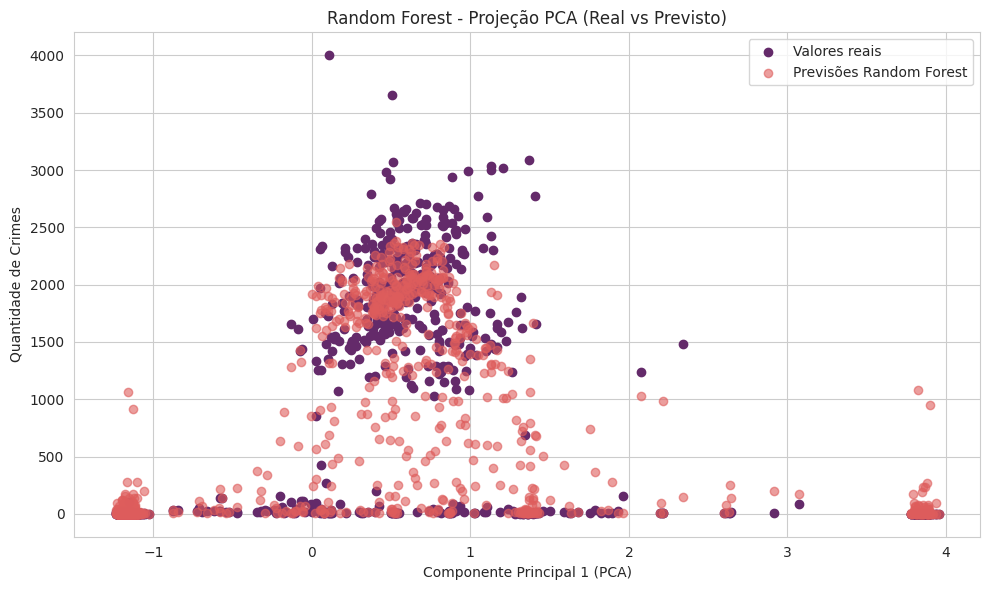

In [ ]:
# Visualização usando PCA para Random Forest
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(preprocessor.fit_transform(X))

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced, y, color=cores[0], label='Valores reais')
plt.scatter(X_reduced, y_pred_rf, color=cores[5], label='Previsões Random Forest', alpha=0.6)
plt.title('Random Forest - Projeção PCA (Real vs Previsto)')
plt.xlabel('Componente Principal 1 (PCA)')
plt.ylabel('Quantidade de Crimes')
plt.legend()
plt.tight_layout()
plt.show()

### Conclusão

O Random Forest teve um desempenho mais razoável porque, diferentemente da Regressão Linear, ele consegue capturar relações não-lineares e interações complexas entre as variáveis. Como a Random Forest é formada por múltiplas árvores de decisão, cada uma tentando aprender diferentes padrões nos dados, ela consegue se adaptar melhor a distribuições irregulares, dados categóricos com muitos níveis e efeitos de combinação entre variáveis.

## Pergunta 23: Existe algum padrão geográfico e temporal nos tipos de crime ocorridos?

Primeiramente, analisamos quais bairros seriam mais interessante analisar esses padrões, de acordo com sua relevância (bairros com mais dados).

In [ ]:
df['BAIRRO'].value_counts().head(20)  # Olhar os mais frequentes

,count
BAIRRO,
DESCONHECIDO,39087
CENTRO,37794
REPUBLICA,10240
BELA VISTA,7369
RURAL,7117
CONSOLACAO,7110
BRAS,6152
PINHEIROS,6104
SE,5985


In [ ]:
# passar la pro inicio no original as bibliotecas q n estao e sao necessarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Mantivemos apenas as colunas importantes para responder a pergunta.

Excluímos bairros que estavam como DESCONHECIDO.

Limitamos o número de bairros aos 15 mais relevantes, para haver maior consistência nos dados.

In [ ]:
# Seleção das colunas relevantes
df_cluster = df[['CATEGORIA_CRIME', 'PERIODO_OCORRENCIA', 'BAIRRO']].dropna().copy()

# Remoção de bairros genéricos e não informativos
bairros_remover = ['DESCONHECIDO', 'RURAL', 'AREA RURAL']
df_cluster = df_cluster[~df_cluster['BAIRRO'].isin(bairros_remover)]

# Seleciona os 15 bairros com mais ocorrências
top_bairros = df_cluster['BAIRRO'].value_counts().nlargest(15).index
df_cluster = df_cluster[df_cluster['BAIRRO'].isin(top_bairros)]

Usamos LabelEncoder para transformar textos em números, o que é necessário para o algoritmo K-Means funcionar.

In [ ]:
# Label Encoding para variáveis categóricas
le_crime = LabelEncoder()
le_periodo = LabelEncoder()
le_bairro = LabelEncoder()

df_cluster.loc[:, 'CATEGORIA_CRIME'] = le_crime.fit_transform(df_cluster['CATEGORIA_CRIME'].astype(str))
df_cluster.loc[:, 'PERIODO_OCORRENCIA'] = le_periodo.fit_transform(df_cluster['PERIODO_OCORRENCIA'].astype(str))
df_cluster.loc[:, 'BAIRRO'] = le_bairro.fit_transform(df_cluster['BAIRRO'].astype(str))

/tmp/ipython-input-189-599695475.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 4 0 ... 5 5 3]' has dtype incompatible with string, please explicitly cast to a compatible dtype first.
  df_cluster.loc[:, 'BAIRRO'] = le_bairro.fit_transform(df_cluster['BAIRRO'].astype(str))


O StandardScaler transforma todos os atributos para média 0 e desvio padrão 1, essencial para o K-Means funcionar corretamente.

In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

O bloco a seguir testa k de 2 a 5 para encontrar o número ideal de clusters, com base no Silhouette Score. Quanto maior o score (máximo = 1), melhor a separação entre os grupos.

In [ ]:
# Teste com diferentes k
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'k={k} => Silhouette Score: {score:.2f}')

k=2 => Silhouette Score: 0.36
k=3 => Silhouette Score: 0.33
k=4 => Silhouette Score: 0.43
k=5 => Silhouette Score: 0.45


Após escolher o k com melhor score, treinamos o K-Means definitivo.

In [ ]:
# Treinamento final com maior k (k escolhido)
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)

# Adiciona os rótulos ao DataFrame
df_cluster['Cluster'] = labels

O PCA (Análise de Componentes Principais) reduz os dados para duas dimensões, facilitando a visualização.

In [ ]:
# PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

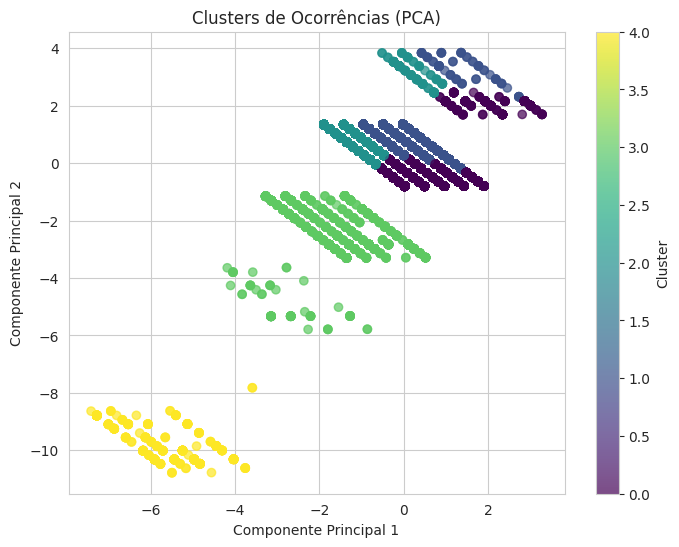

In [ ]:
# Visualização
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Clusters de Ocorrências (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

Esse gráfico mostra os agrupamentos formados, com cada cor representando um cluster. Ajuda a interpretar se há separação entre grupos.

In [ ]:
# Resumo das características de cada cluster
resumo_clusters = df_cluster.groupby('Cluster').agg({
    'CATEGORIA_CRIME': lambda x: x.mode()[0],
    'PERIODO_OCORRENCIA': lambda x: x.mode()[0],
    'BAIRRO': lambda x: x.mode()[0]
})

# Decodificando os labels para os nomes originais
resumo_clusters['CATEGORIA_CRIME'] = le_crime.inverse_transform(resumo_clusters['CATEGORIA_CRIME'].values.astype(int))
resumo_clusters['PERIODO_OCORRENCIA'] = le_periodo.inverse_transform(resumo_clusters['PERIODO_OCORRENCIA'].values.astype(int))
resumo_clusters['BAIRRO'] = le_bairro.inverse_transform(resumo_clusters['BAIRRO'].values.astype(int))

print("\nResumo de cada cluster:")
print(resumo_clusters)


Resumo de cada cluster:
               CATEGORIA_CRIME PERIODO_OCORRENCIA     BAIRRO
Cluster                                                     
0                  Patrimonial            A NOITE     CENTRO
1                  Patrimonial         PELA MANHA  REPUBLICA
2                  Patrimonial            A NOITE  REPUBLICA
3                       Outros            A NOITE     CENTRO
4        Administração Pública            A NOITE     CENTRO


Com base nos resultados dos clusters, é possível concluir que a análise de agrupamento revelou padrões geográficos e temporais distintos nos tipos de crime, especialmente em bairros como o Centro e a República.

Os crimes Patrimoniais são a categoria mais prevalente, aparecendo em três dos cinco clusters, e demonstram uma forte ocorrência à noite, tanto no bairro Centro (Cluster 0) quanto no bairro República (Cluster 2). Há também um cluster significativo de crimes Patrimoniais pela manhã na República (Cluster 1), indicando que este tipo de crime não se restringe a um único período ou local entre os bairros analisados.

Além dos crimes Patrimoniais, a análise conseguiu isolar categorias menos frequentes, mas com padrões claros:

*   Crimes de Administração Pública (Cluster 4) são notavelmente concentrados à noite no bairro Centro.
*   Crimes classificados como Outros (Cluster 3) também ocorrem predominantemente à noite no Centro.

Em suma, os agrupamentos destacam que o período noturno é um fator temporal crítico para a maioria dos tipos de crime identificados, e que os bairros Centro e República apresentam perfis de criminalidade distintos, mas com a categoria Patrimonial sendo uma preocupação constante em ambos. Essa segmentação permite uma compreensão mais granular dos fenômenos criminais, auxiliando na formulação de estratégias de segurança mais direcionadas.

# Aprendizado Supervisionado

Material utilizado como referência:

-  Material didático feito pela monitora Letícia


- Slides vistos em sala de aula

O aprendizado supervisionado é uma abordagem da inteligência artificial onde os dados utilizados para treinar o modelo possuem rótulos (labels). Ou seja, cada entrada de dados já vem acompanhada de uma resposta conhecida. O objetivo central desse tipo de aprendizagem é criar um modelo que aprenda a relação entre as variáveis de entrada (features) e as variáveis de saída (target), de forma que possa generalizar e fazer previsões sobre novos dados desconhecidos.

### Principais Etapas

1. **Definição do Problema:** Decidir se a tarefa é de regressão (prever um valor numérico, como quantidade de crimes por dia) ou classificação (prever uma categoria, como o tipo de crime).

2. **Preparação dos Dados:** Inclui limpeza de dados, tratamento de nulos, transformação de variáveis categóricas (usando técnicas como One-Hot Encoding) e padronização das variáveis numéricas (utilizando `StandardScaler` por exemplo).

3. **Divisão entre treino e teste:** Para validar a performance do modelo, os dados são divididos. Uma técnica comum é a validação cruzada (`cross_val_score` do scikit-learn ou `train_test_split`).

4. **Escolha do Algoritmo:** Alguns dos algoritmos mais comuns são:

   * Regressão Linear (`LinearRegression`)
   * Árvores de Decisão (`DecisionTreeClassifier` ou `DecisionTreeRegressor`)
   * KNN (`KNeighborsClassifier` ou `KNeighborsRegressor`)
   * Naive Bayes (`GaussianNB`, para classificação)
   * SVM (`SVC` ou `SVR`)

5. **Treinamento:** Utilizar o método `.fit()` para o modelo aprender os padrões nos dados.

6. **Avaliação:** Métricas como R² para regressão, ou acurácia, precisão, recall e F1-score para classificação. Uso de matriz de confusão para visualizar os acertos e erros nas classes.

7. **Ajuste de Parâmetros:** Pode-se usar `GridSearchCV` ou `RandomizedSearchCV` para buscar os melhores hiperparâmetros.

8. **Validação Final:** Testar o modelo com o conjunto de dados separado inicialmente (ou usar validação cruzada com K-fold).

### Exemplos de Funções e Bibliotecas Importantes:

* `train_test_split()`
* `cross_val_score()`
* `StandardScaler()`
* `OneHotEncoder()`
* `LinearRegression()`, `DecisionTreeClassifier()`, etc.
* `classification_report()`, `confusion_matrix()`
* `r2_score()`, `mean_squared_error()`


## Regressão Linear

Material utilizado como referência:
-  [Regressão Linear](https://medium.com/@lauradatatalks/regressão-linear-6a7f247c3e29)


- Slides vistos em sala de aula

1. Introdução à Regressão Linear

A **regressão linear** é uma técnica estatística e de aprendizado de máquina supervisionado utilizada para modelar a relação entre uma variável dependente (alvo) numérica e uma ou mais variáveis independentes (preditoras). Seu propósito principal é entender como as variáveis preditoras influenciam a variável alvo e fazer estimativas ou previsões sobre o valor da variável alvo.

2. Tipos de Regressão Linear

Existem dois tipos principais:
* **Regressão Linear Simples (Univariada):** Modela a relação entre a variável dependente e **uma única** variável independente. A relação é representada pela equação de uma reta: $Y = \beta_0 + \beta_1 X + \epsilon$.
* **Regressão Linear Múltipla (Multivariada):** Modela a relação entre a variável dependente e **duas ou mais** variáveis independentes. A equação é: $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$.

Onde:
* $Y$: Variável dependente (o que se quer estimar).
* $X, X_1, ..., X_n$: Variáveis independentes.
* $\beta_0$: Intercepto (valor de $Y$ quando todas as $X$ são zero).
* $\beta_1, ..., \beta_n$: Coeficientes angulares (indicam a mudança em $Y$ para uma unidade de mudança na $X$ correspondente, mantendo as outras $X$ constantes).
* $\epsilon$: Termo de erro aleatório.

 3. Objetivo Principal no Projeto

O objetivo desta etapa é aplicar a regressão linear para **fazer a estimativa de algum atributo numérico** do conjunto de dados. Isso envolve não apenas aplicar o algoritmo, mas também realizar análises detalhadas dos atributos e interpretar os resultados obtidos.

 4. Passos Fundamentais para Aplicação

A equipe deve seguir os seguintes passos:

1.  **Definição do Problema e Objetivo:**
    * Identificar claramente qual atributo numérico será a variável dependente (Y) a ser estimada.
    * Listar potenciais atributos que podem servir como variáveis independentes (X).

2.  **Preparação dos Dados:**
    * Codificar variáveis categóricas (ex: One-Hot Encoding com `pd.get_dummies()`) para que possam ser usadas como variáveis independentes.

3.  **Análise Exploratória e Seleção de Atributos:**
    * Analisar a distribuição da variável dependente (Y).
    * Investigar as relações entre as potenciais variáveis independentes (X) e a variável dependente (Y) usando gráficos de dispersão (para X numérico) e boxplots (para X categórico).
    * Calcular e analisar a matriz de correlação entre as variáveis numéricas para identificar relações lineares e possível multicolinearidade (alta correlação entre variáveis independentes).
    * Selecionar as variáveis independentes (X) mais promissoras.

4.  **Escolha do Modelo e Treinamento:**
    * Decidir entre as implementações de Regressão Linear (ex: `LinearRegression` do `scikit-learn` ou `OLS` do `statsmodels`). A biblioteca `statsmodels` é particularmente útil para análises detalhadas dos coeficientes e testes de significância.
    * No `statsmodels`, lembrar de adicionar a constante (intercepto) ao conjunto de variáveis independentes (ex: `sm.add_constant(X)`).
    * Ajustar (treinar) o modelo aos dados selecionados usando o método `fit()`.

5.  **Avaliação e Interpretação dos Resultados:**
    * Analisar os coeficientes ($\beta_i$) do modelo: qual o impacto de cada variável independente em Y?
    * Interpretar o intercepto ($\beta_0$).
    * Avaliar a qualidade do ajuste do modelo usando o **Coeficiente de Determinação (R²)**: qual a proporção da variância de Y que é explicada pelo modelo?
    * Utilizar o sumário do `statsmodels` para obter **p-valores** (P>|t|) para cada coeficiente, avaliando sua significância estatística. Um p-valor baixo (tipicamente < 0.05) sugere que a variável é um preditor significativo.
    * Verificar o **teste F geral** do modelo (Prob (F-statistic)) para avaliar se o modelo como um todo é significativo.
    * Realizar a **análise de resíduos** (diferença entre valores observados e previstos) para verificar as suposições do modelo (linearidade, independência, homocedasticidade, normalidade dos erros). Plotar resíduos vs. valores previstos e histograma/Q-Q plot dos resíduos.



## Árvores de decisão

Material utilizado como referência:

- [Árvore de decisão](https://blog.somostera.com/data-science/arvores-de-decisao)
- Slides vistos em sala de aula

Árvores de decisão são modelos preditivos que seguem uma estrutura de ramificação, onde cada nó interno representa uma condição de decisão baseada em uma variável, e cada folha representa um resultado ou valor final da previsão.

* Fácil interpretação.
* Não requer padronização de dados.
* Pode lidar com variáveis numéricas e categóricas.

**Desvantagens:**

* Alto risco de overfitting se a árvore for muito profunda.
* Pequenas variações nos dados podem gerar árvores muito diferentes (alta variância).

**Exemplo de uso no scikit-learn:**

```python
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(X_train, y_train)
```


## Random Forest

O Random Forest é um ensemble learning method que cria múltiplas árvores de decisão independentes e combina suas previsões (por média no caso de regressão ou por votação no caso de classificação). O objetivo é reduzir o risco de overfitting típico de árvores únicas e melhorar a precisão.

**Como funciona:**

* Cria várias árvores de decisão com diferentes amostras aleatórias dos dados (bagging).
* Em cada split da árvore, apenas um subconjunto aleatório de features é considerado (feature bagging).
* As previsões finais são a média (para regressão) ou a maioria (para classificação).

**Vantagens:**

* Alta precisão.
* Reduz overfitting comparado a uma árvore isolada.
* Funciona bem mesmo com dados com muitos atributos irrelevantes.

**Desvantagens:**

* Mais pesado computacionalmente.
* Tende a "memorizar" o treino se não for avaliado corretamente com teste ou validação cruzada.

**Exemplo de uso no scikit-learn:**

```python
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
```

**Principais parâmetros ajustáveis:**

* `n_estimators`: Número de árvores.
* `max_depth`: Profundidade máxima das árvores.
* `min_samples_split`: Número mínimo de amostras para dividir um nó.
* `random_state`: Controle de aleatoriedade.

# Aprendizado Não-Supervisionado

O aprendizado não-supervisionado trata de situações onde os dados não possuem rótulos ou categorias definidas previamente. O objetivo é explorar a estrutura oculta nos dados, agrupando os registros em clusters ou reduzindo a dimensionalidade para entender melhor as relações internas dos atributos.

### Principais Etapas

1. **Definição do Objetivo:** Descobrir padrões ou agrupamentos naturais nos dados (ex.: segmentar tipos de crimes ou perfis de bairros).

2. **Preparação dos Dados:** Limpeza de dados, normalização e transformação de variáveis categóricas com One-Hot Encoding (se necessário).

3. **Escolha do Algoritmo:** Alguns dos mais usados são:

   * **K-Means:** Agrupa os dados em um número K de clusters, minimizando a distância intra-cluster.
   * **DBSCAN:** Agrupa com base na densidade dos pontos, útil para detectar outliers.
   * **GMM (Gaussian Mixture Model):** Agrupamento baseado em distribuição de probabilidade.
   * **Hierarchical Clustering:** Cria dendrogramas, mostrando a relação de proximidade entre os pontos.

4. **Execução e Treinamento:** Rodar o algoritmo usando funções como `KMeans().fit_predict()`, `DBSCAN().fit_predict()`, etc.

5. **Avaliação de Qualidade dos Clusters:**

   * **Silhouette Score:** Mede o quão bem cada ponto está dentro do seu cluster.
   * **Inertia:** Soma das distâncias dentro dos clusters (usada no K-Means).
   * **Davies-Bouldin Index:** Avalia o quão distintos são os clusters.

6. **Visualização dos Clusters:**

   * Uso de PCA ou t-SNE para reduzir para 2D e plotar os clusters.
   * Funções como `plt.scatter()` para gráficos.

### Exemplos de Funções e Bibliotecas:

* `KMeans` (scikit-learn)
* `DBSCAN` (scikit-learn)
* `AgglomerativeClustering`
* `silhouette_score()`
* `PCA` (para reduzir a dimensionalidade antes da visualização)

